In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import *
from helpers2 import *

In [4]:
#data_folder = Path("../data/")
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Data analysis

In [99]:
print(y)
print(np.shape(y))
print(np.shape(tX))
print(tX.dtype)
print(y.dtype)

[ 1. -1. -1. ...  1. -1. -1.]
(250000,)
(250000, 30)
float64
float64


In [61]:
feature_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 
                 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 
                 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 
                 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 
                 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
                 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

for i, name in enumerate(feature_names):
    print(i, feature_names[i])


0 DER_mass_MMC
1 DER_mass_transverse_met_lep
2 DER_mass_vis
3 DER_pt_h
4 DER_deltaeta_jet_jet
5 DER_mass_jet_jet
6 DER_prodeta_jet_jet
7 DER_deltar_tau_lep
8 DER_pt_tot
9 DER_sum_pt
10 DER_pt_ratio_lep_tau
11 DER_met_phi_centrality
12 DER_lep_eta_centrality
13 PRI_tau_pt
14 PRI_tau_eta
15 PRI_tau_phi
16 PRI_lep_pt
17 PRI_lep_eta
18 PRI_lep_phi
19 PRI_met
20 PRI_met_phi
21 PRI_met_sumet
22 PRI_jet_num
23 PRI_jet_leading_pt
24 PRI_jet_leading_eta
25 PRI_jet_leading_phi
26 PRI_jet_subleading_pt
27 PRI_jet_subleading_eta
28 PRI_jet_subleading_phi
29 PRI_jet_all_pt


The training data set is composed of : 
* a y vector of length 250'000 and type float
* a tX float matrix of 250'000 rows and 30 columns

It means that our data set is composed of 250'000 different obsevations of 30 different features. In the rest of the notebook, we name the features by their index nummer. So, it means from the feature 0 from the feature  29.

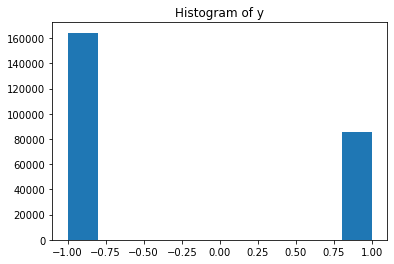

In [5]:
plt.hist(y)
plt.title('Histogram of y')
plt.show()

There is more y = -1 than y = 1 in the data, so there is more y = 'b' than y = 's'. So, we have to pay attention to normalize the data in order to compare them in the next plots.

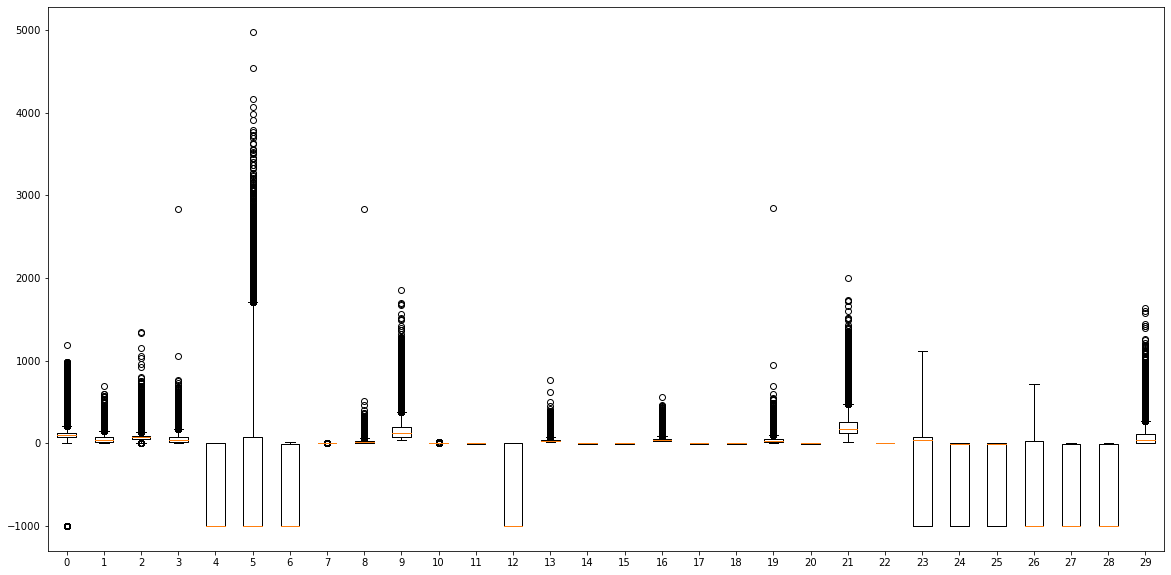

In [6]:
plt.figure(figsize=(20, 10))
ind = np.arange(30)
plt.boxplot(tX[:,], labels = ind)

plt.show()

There are many outliers depending on the feature. There are also feature that has a long interquantile range. Maybe we have to treat these feature in order to be more efficient in our futur predictions. Let's do more plots to be have a better idea :

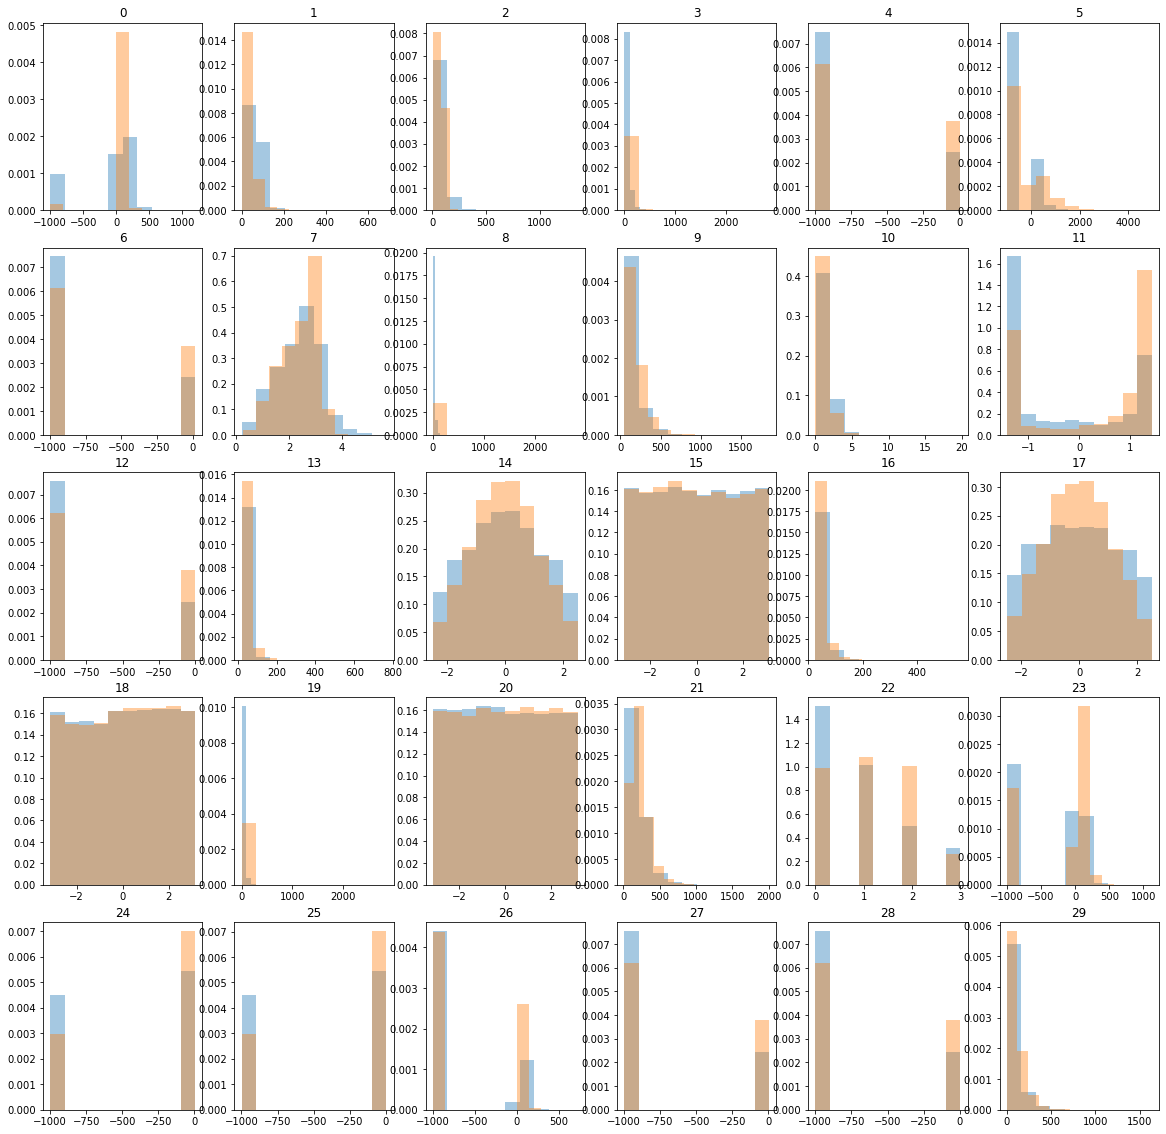

In [7]:
ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].hist(tX_2[:,n], alpha=0.4, density=True, label=['y=-1', 'y=1'])
        axs[i,j].hist(tX_1[:,n], alpha=0.4, density=True)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

By plotting the histograms of the features with a color for each y, we can see that there are useless features as they have almost the same distribution for y=1 than for y = -1. We can cut feature 15, 18, 20. 


There are also features that are very inequally distributed with value that are about -1000 and values around 0 ; it can be problematic for the prediction with such a large gap between values of a single distribution. Moreover, there is not a big difference in the distribution of y=1 and y=-1. Maybe it can be useful to put off these big negative values of these features. The features in question are : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.


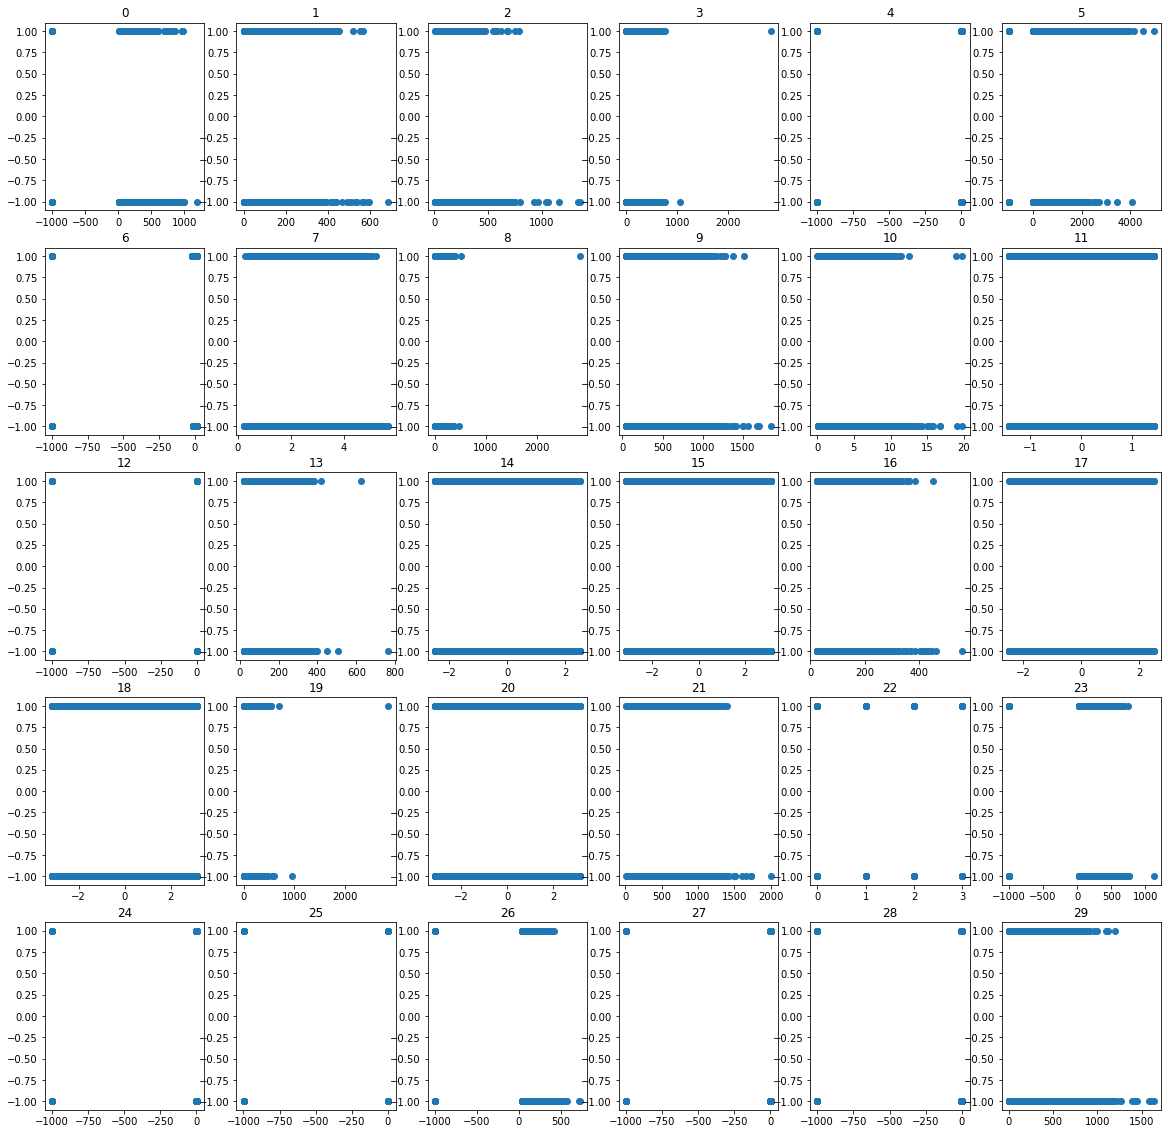

In [8]:
fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].scatter(tX[:,n], y)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

#meme constat comment faire pour se debarrasser de ces valeurs ??

These plots confirm the obsevations that we made in the previous plot ; no difference of the distribution of y for features 15, 18, 20 and very large gap in the distributions of features : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.

## Data filtering

### Outliers

In [38]:
def nb_outliers(tX, outlier) : 
    sum = 0
    nb_outliers = []
    for col in range(tX.shape[1]) :
        sum = np.where(tX[:,col] == outlier)[0].shape
        nb_outliers.append(sum)   
    print(nb_outliers)
    print(np.where(tX==outlier)[0].shape)

out = -999

print('number of -999 in the entire matrix :')
nb_outliers(tX, out)

ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

print('number of -999 in the rows where y = 1 :')
nb_outliers(tX_1, out)
print('number of -999 in the rows where y = -1 :')
nb_outliers(tX_2, out)

number of -999 in the entire matrix :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = 1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = -1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)


We have a problem with features  0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28. They are inequally distributed; they have a lot of -999 values and the rest is values around 0. So, here we can see how much of these -999 there are. We can see that the -999 appear only in the features that we identified with the histograms. It seems that there is a correlation between features as many features have the same number of -999. We can also see that there is more -999 in the obsevations where y=-1, so we have to take this into account when we filter the data. As there are many -999, we can't delete the rows where there is -999 because we will loose to much information.

### Mean and Standardization

In [5]:
# Changer par la valeur da la mean du feature en question sans les compter dedans
def filtering_with_mean(tX):
    index = [0,4,5,6,12,23,24,25,26,27,28]
    tX_filtered = np.copy(tX)
    arr = []
    for ind in index :
        arr = np.delete(tX_filtered[:,ind], np.where(tX_filtered[:,ind]==-999))
        mean = np.mean(arr)
        tX_filtered[np.where(tX_filtered[:,ind]==-999), ind] = mean
    return tX_filtered

In [7]:
def filtering_with_mean_bis(tX, y):
    #index = [0,4,5,6,12,23,24,25,26,27,28]
    index = np.arange(tX.shape[1])
    tX_filtered = np.copy(tX)
    
    ind_1 = np.where(y == 1)[0]
    ind_2 = np.where(y == -1)[0]
    tX_1 = tX[ind_1,:]
    tX_2 = tX[ind_2,:]
    
    ind_3 = np.where(tX[:,0]==-999)[0]
    new_ind_1 = np.intersect1d(ind_3, ind_1)
    new_ind_2 = np.intersect1d(ind_3, ind_2)
    
    arr_1 = []
    arr_2 = []
    for ind in index :
        arr_1 = np.delete(tX_1[:,ind], np.where(tX_1[:,ind]==-999))
        mean_1 = np.mean(arr_1)
        arr_2 = np.delete(tX_2[:,ind], np.where(tX_2[:,ind]==-999))
        mean_2 = np.mean(arr_2)
        tX_filtered[new_ind_1, ind] = mean_1
        tX_filtered[new_ind_2, ind] = mean_2
    return tX_filtered

In [60]:
def std(tX):
    mean = np.mean(tX, axis = 0)
    std = np.std(tX, axis = 0)
    tX[:, std>0] = (tX[:, std>0] - mean[std>0])/std[std>0]
    return tX

In order to filter the data, we want to get rif of these -999, but we can't just delete the rows. So, we have the idea to replace the -999 by the mean of the rest of values of the feature. As there is a significant difference of amount of -999 in between y=1 and y=-1 in certain features, we calculate the mean for the rows where y = 1 and y = -1 separatly.

Then, we can also standardize the data. It can be a good idea because the features are not all in the same range of values and it can create disproportionality between the importance of the features.

In [19]:
def log_distribution(tX, to_log):
    tX_log = np.copy(tX)
    index = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_log)):
            if index[i] == to_log[j]:
                tX_log[:, i] = np.log(1+tX[:, to_log[j]], where=np.all(tX[:, i]>0))  
    return tX_log

In [10]:
def separate_sets(tX, y, ids):
    index1 = np.where(tX[:, 22]==0)
    index2 = np.where(tX[:, 22]==1)
    index3 = np.where(tX[:, 22]>1)
    
    set1_x = tX[index1]
    set1_y = y[index1]
    set1_ids = ids[index1]
    
    set2_x = tX[index2]
    set2_y = y[index2]
    set2_ids = ids[index2]
    
    set3_x = tX[index3]
    set3_y = y[index3]
    set3_ids = ids[index3]
    
    return set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids

def concatenate_sets(set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids):
    tX = np.concatenate((set1_x, set2_x, set3_x), axis = 0)
    y = np.concatenate((set1_y, set2_y, set3_y), axis = 0)
    ids = np.concatenate((set1_ids, set2_ids, set3_ids), axis = 0)
    return tX, y, ids

In [11]:
def outliers(tX, outlier):
    outliers = []
    M = np.squeeze(tX.shape[0])
    for col in range(tX.shape[1]) :
        out_col = np.nonzero(tX[:,col] == outlier)[0].shape
        out_col = np.squeeze(out_col)
        outliers.append(out_col/M)
    print('outliers ratio for each feature', outliers)
    
    index_full = np.arange(tX.shape[1])
    index = index_full[~(outliers==np.ones(len(outliers)))]
    index = index.reshape(-1)
    X_without_outliers = tX[:, index]
    return X_without_outliers 

### Cutting features 

In [12]:
def cut(tX, to_cut):
    cut_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_cut)):
            if index_full[i] == to_cut[j]:
                cut_index[i] = to_cut[j]
    index = index_full[~(index_full == cut_index)]
    index = index.reshape(-1)
    tX_cut = tX[:, index]
    return tX_cut

def keep(tX, to_keep):
    keep_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_keep)):
            if index_full[i] == to_keep[j]:
                keep_index[i] = to_keep[j]
    index = index_full[index_full == keep_index]
    index = index.reshape(-1)
    tX_kept = tX[:, index]
    return tX_kept

As we see above in the histograms, some features seem to be useless as they have a similar distribution between the y = 1 and y = -1. So, it is useful to have function that cut or keep some parameters.

## Fonctions 

In [13]:
from implementations import *
from cross_validation import *

#### Feature engineering

In [14]:
tX_mean = filtering_with_mean_bis(tX, y)
tX_std = std(tX_mean)

to_cut = [15,18,20]
tX_mean_cut = cut(tX_std, to_cut)

to_cut1 = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
tX_cut = cut(tX_std, to_cut1)

to_keep = [13, 14, 17]
tX_kept = keep(tX_std, to_keep)

In [89]:
to_log = [1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29]

set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y, ids)

print('Set 1')
set1_x = outliers(set1_x, -999)
set1_x = log_distribution(set1_x, to_log)
set1_x = filtering_with_mean_bis(set1_x, set1_y)
set1_x = std(set1_x)
_ = outliers(set1_x, -999)

print('\nSet 2')
set2_x = outliers(set2_x, -999)
set2_x = log_distribution(set2_x, to_log)
set2_x = filtering_with_mean_bis(set2_x, set2_y)
set2_x = std(set2_x)
_ = outliers(set2_x, -999)

print('\nSet 3')
set3_x = outliers(set3_x, -999)
set3_x = log_distribution(set3_x, to_log)
set3_x = filtering_with_mean_bis(set3_x, set3_y)
set3_x = std(set3_x)
_ = outliers(set3_x, -999)

Set 1
outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Set 2
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Set 3
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

#### Choose x and generate test and train data 

In [94]:
x1 = tX_mean
x2 = tX_kept
x3 = tX_std
x4 = tX_mean_cut

### Least squares

Cross validation to get parameters

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, tX_log, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX_poly = build_poly(tX_log, degree_opt)
w_ls, loss_ls = least_squares(y, tX_poly)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls = degree_opt

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(set1_y, set1_x, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX_poly = build_poly(set1_x, degree_opt)
w_ls1, loss_ls1 = least_squares(set1_y, tX_poly)
print("Least square loss {loss}".format(loss=loss_ls1))
degree_ls1 = degree_opt

In [ ]:
#je commente sinon pas le bon w_ls pour la submission
""""w_ls, loss_ls = least_squares(y, x1)
print("Least square loss {loss}".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
print("Least square mse loss {loss} with degree 8".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
loss_ls = np.sqrt(2*loss_ls)
print("Least square rmse loss {loss} with degree 8".format(loss=loss_ls))"""

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, x4, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX2 = build_poly(x4, degree_opt)
w_ls2, loss_ls2 = least_squares(y, tX2)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls2 = degree_opt

### Ridge regression 

Cross validation to find the oprimal lambda and degree

In [ ]:
degrees = np.arange(1,11)
degree_opt, lambda_opt = best_degree_selection(y, x4, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
tX = build_poly(x1, degree_opt)
w_rr, loss_rr = ridge_regression(y, tX, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
degree_rr = degree_opt

In [ ]:
degrees = np.arange(1,11)
degree_opt, lambda_opt = best_degree_selection(set1_y, set1_x, degrees, k_fold=10, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
tX_poly = build_poly(x1, degree_opt)
w_rr1, loss_rr1 = ridge_regression(set1_y, tX_poly, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr1))
degree_rr1 = degree_opt

### Gradient descent

CV to find best gamma

In [ ]:
k_fold = 10
max_iters = 500
initial_w = np.zeros(set1_x.shape[1])
gammas = np.arange(0, 3, 0.01)
#set2_x = np.c_[np.ones(set2_x.shape[0]), set2_x]
gamma_opt = cross_validation(set2_y, set2_x, k_fold, gammas, fonction=2)
w_gd, loss_gd = least_squares_GD(set2_y, set2_x, gamma_opt, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Gradient descent regression loss {loss}".format(loss=loss_gd))

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

Gradient Descent(43/49): loss=0.42140943227002703
Gradient Descent(44/49): loss=0.42075742445529885
Gradient Descent(45/49): loss=0.4201202980138515
Gradient Descent(46/49): loss=0.419497529709125
Gradient Descent(47/49): loss=0.4188886288962927
Gradient Descent(48/49): loss=0.41829313440413457
Gradient Descent(49/49): loss=0.417710611780759
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4942006895458212
Gradient Descent(2/49): loss=0.48898703804521687
Gradient Descent(3/49): loss=0.48428481971309384
Gradient Descent(4/49): loss=0.4800297835864654
Gradient Descent(5/49): loss=0.47616628706228203
Gradient Descent(6/49): loss=0.47264611821008007
Gradient Descent(7/49): loss=0.4694274806670227
Gradient Descent(8/49): loss=0.46647411856583815
Gradient Descent(9/49): loss=0.46375456208173654
Gradient Descent(10/49): loss=0.4612414768832993
Gradient Descent(11/49): loss=0.4589111030954597
Gradient Descent(12/49): loss=0.4567427713824055
Gradient Descent(13/49): loss=0.454718

Gradient Descent(18/49): loss=0.4273885105847707
Gradient Descent(19/49): loss=0.42590409527085404
Gradient Descent(20/49): loss=0.4244926706264284
Gradient Descent(21/49): loss=0.4231482372599215
Gradient Descent(22/49): loss=0.42186566099072387
Gradient Descent(23/49): loss=0.42064049791008795
Gradient Descent(24/49): loss=0.41946886027130253
Gradient Descent(25/49): loss=0.4183473130511151
Gradient Descent(26/49): loss=0.41727279363591874
Gradient Descent(27/49): loss=0.41624254901400765
Gradient Descent(28/49): loss=0.4152540862801422
Gradient Descent(29/49): loss=0.41430513331349683
Gradient Descent(30/49): loss=0.4133936072722528
Gradient Descent(31/49): loss=0.4125175891292214
Gradient Descent(32/49): loss=0.41167530290557525
Gradient Descent(33/49): loss=0.4108650985827107
Gradient Descent(34/49): loss=0.41008543791396374
Gradient Descent(35/49): loss=0.4093348825393487
Gradient Descent(36/49): loss=0.4086120839431477
Gradient Descent(37/49): loss=0.40791577489751074
Gradient D

Gradient Descent(47/49): loss=0.3924197555435792
Gradient Descent(48/49): loss=0.3920788069202446
Gradient Descent(49/49): loss=0.3917516363739356
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4835414026434604
Gradient Descent(2/49): loss=0.4716624985851935
Gradient Descent(3/49): loss=0.46276226456544034
Gradient Descent(4/49): loss=0.45583477067212647
Gradient Descent(5/49): loss=0.4502434312868956
Gradient Descent(6/49): loss=0.44558166961130935
Gradient Descent(7/49): loss=0.44158676071040365
Gradient Descent(8/49): loss=0.4380864348379369
Gradient Descent(9/49): loss=0.43496568908684036
Gradient Descent(10/49): loss=0.43214608513078173
Gradient Descent(11/49): loss=0.4295727775584244
Gradient Descent(12/49): loss=0.4272063407316924
Gradient Descent(13/49): loss=0.42501758363839887
Gradient Descent(14/49): loss=0.4229842326585492
Gradient Descent(15/49): loss=0.4210887876989345
Gradient Descent(16/49): loss=0.4193171197804246
Gradient Descent(17/49): loss=0.417657

Gradient Descent(36/49): loss=0.39202322656095295
Gradient Descent(37/49): loss=0.39159261473964274
Gradient Descent(38/49): loss=0.39118457106034515
Gradient Descent(39/49): loss=0.39079743383965754
Gradient Descent(40/49): loss=0.3904296751320113
Gradient Descent(41/49): loss=0.3900798895056499
Gradient Descent(42/49): loss=0.38974678381386896
Gradient Descent(43/49): loss=0.3894291678634731
Gradient Descent(44/49): loss=0.389125945894073
Gradient Descent(45/49): loss=0.3888361087917227
Gradient Descent(46/49): loss=0.3885587269688267
Gradient Descent(47/49): loss=0.3882929438495089
Gradient Descent(48/49): loss=0.3880379699059173
Gradient Descent(49/49): loss=0.3877930771964355
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4786814261952782
Gradient Descent(2/49): loss=0.46492468255621927
Gradient Descent(3/49): loss=0.45535907000948744
Gradient Descent(4/49): loss=0.44821369049856224
Gradient Descent(5/49): loss=0.44254201305182606
Gradient Descent(6/49): loss=0.43

Gradient Descent(20/49): loss=0.3988093197153606
Gradient Descent(21/49): loss=0.3977703781272129
Gradient Descent(22/49): loss=0.3968144346735483
Gradient Descent(23/49): loss=0.3959333209342411
Gradient Descent(24/49): loss=0.3951197393668342
Gradient Descent(25/49): loss=0.39436716082478235
Gradient Descent(26/49): loss=0.3936697364900807
Gradient Descent(27/49): loss=0.39302222158741623
Gradient Descent(28/49): loss=0.39241990886931827
Gradient Descent(29/49): loss=0.3918585703087615
Gradient Descent(30/49): loss=0.391334405762001
Gradient Descent(31/49): loss=0.390843997606572
Gradient Descent(32/49): loss=0.3903842705420114
Gradient Descent(33/49): loss=0.3899524558808608
Gradient Descent(34/49): loss=0.3895460597665591
Gradient Descent(35/49): loss=0.38916283484111824
Gradient Descent(36/49): loss=0.3888007549547846
Gradient Descent(37/49): loss=0.38845799256634733
Gradient Descent(38/49): loss=0.3881328985293515
Gradient Descent(39/49): loss=0.38782398399839657
Gradient Descent

Gradient Descent(1/49): loss=0.46959867487331763
Gradient Descent(2/49): loss=0.4538369283798866
Gradient Descent(3/49): loss=0.443820950511342
Gradient Descent(4/49): loss=0.43643430768038316
Gradient Descent(5/49): loss=0.4305000980275004
Gradient Descent(6/49): loss=0.4255174794987491
Gradient Descent(7/49): loss=0.4212368260645323
Gradient Descent(8/49): loss=0.4175115728019179
Gradient Descent(9/49): loss=0.4142433832810241
Gradient Descent(10/49): loss=0.4113599784825293
Gradient Descent(11/49): loss=0.40880508467645116
Gradient Descent(12/49): loss=0.406533271067579
Gradient Descent(13/49): loss=0.40450697821339315
Gradient Descent(14/49): loss=0.4026946432910863
Gradient Descent(15/49): loss=0.40106943255584226
Gradient Descent(16/49): loss=0.3996083382404764
Gradient Descent(17/49): loss=0.3982915081986789
Gradient Descent(18/49): loss=0.397101731569196
Gradient Descent(19/49): loss=0.396024033295714
Gradient Descent(20/49): loss=0.39504534727652935
Gradient Descent(21/49): lo

Gradient Descent(46/49): loss=0.3847828304111626
Gradient Descent(47/49): loss=0.3845960494561041
Gradient Descent(48/49): loss=0.3844144234905145
Gradient Descent(49/49): loss=0.38423767539620135
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4656337505633766
Gradient Descent(2/49): loss=0.44962090565764096
Gradient Descent(3/49): loss=0.43960425686151605
Gradient Descent(4/49): loss=0.43213796275706645
Gradient Descent(5/49): loss=0.4261102555305721
Gradient Descent(6/49): loss=0.42107022193514937
Gradient Descent(7/49): loss=0.41678232989922065
Gradient Descent(8/49): loss=0.41309712452784814
Gradient Descent(9/49): loss=0.40990795388623347
Gradient Descent(10/49): loss=0.40713350908286977
Gradient Descent(11/49): loss=0.40470933647132357
Gradient Descent(12/49): loss=0.40258306039150754
Gradient Descent(13/49): loss=0.40071140433536884
Gradient Descent(14/49): loss=0.3990581940028588
Gradient Descent(15/49): loss=0.39759294321341715
Gradient Descent(16/49): loss=0.

Gradient Descent(24/49): loss=0.3879169721693087
Gradient Descent(25/49): loss=0.38744781718057447
Gradient Descent(26/49): loss=0.38701264061677926
Gradient Descent(27/49): loss=0.386607156653295
Gradient Descent(28/49): loss=0.38622772105035574
Gradient Descent(29/49): loss=0.385871230538463
Gradient Descent(30/49): loss=0.38553503832083014
Gradient Descent(31/49): loss=0.38521688306272966
Gradient Descent(32/49): loss=0.38491482917715697
Gradient Descent(33/49): loss=0.3846272165794296
Gradient Descent(34/49): loss=0.3843526183844374
Gradient Descent(35/49): loss=0.3840898052704631
Gradient Descent(36/49): loss=0.38383771544177453
Gradient Descent(37/49): loss=0.3835954292958295
Gradient Descent(38/49): loss=0.3833621480458428
Gradient Descent(39/49): loss=0.3831371756705216
Gradient Descent(40/49): loss=0.3829199036639695
Gradient Descent(41/49): loss=0.3827097981434241
Gradient Descent(42/49): loss=0.38250638894336736
Gradient Descent(43/49): loss=0.38230926038389823
Gradient Desc

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4586484418387851
Gradient Descent(2/49): loss=0.44278919808385625
Gradient Descent(3/49): loss=0.43266637237099376
Gradient Descent(4/49): loss=0.42497882051108443
Gradient Descent(5/49): loss=0.4188276943669743
Gradient Descent(6/49): loss=0.4137978952841824
Gradient Descent(7/49): loss=0.4096333608325927
Gradient Descent(8/49): loss=0.40615504745735215
Gradient Descent(9/49): loss=0.40322965475694633
Gradient Descent(10/49): loss=0.40075423580734604
Gradient Descent(11/49): loss=0.3986474615255549
Gradient Descent(12/49): loss=0.39684415228645603
Gradient Descent(13/49): loss=0.395291585331812
Gradient Descent(14/49): loss=0.39394685182593475
Gradient Descent(15/49): loss=0.39277488271283856
Gradient Descent(16/49): loss=0.39174692924952287
Gradient Descent(17/49): loss=0.39083936928240653
Gradient Descent(18/49): loss=0.3900327563896161
Gradient Descent(19/49): loss=0.3893110554116642
Gradient Descent(20/49): loss=0.388

Gradient Descent(25/49): loss=0.3870557099089474
Gradient Descent(26/49): loss=0.38668246384684785
Gradient Descent(27/49): loss=0.386330137799923
Gradient Descent(28/49): loss=0.38599629806556995
Gradient Descent(29/49): loss=0.3856789191985204
Gradient Descent(30/49): loss=0.38537630796001554
Gradient Descent(31/49): loss=0.3850870419022736
Gradient Descent(32/49): loss=0.38480991972190887
Gradient Descent(33/49): loss=0.3845439210856138
Gradient Descent(34/49): loss=0.3842881740862209
Gradient Descent(35/49): loss=0.3840419288507352
Gradient Descent(36/49): loss=0.3838045361126725
Gradient Descent(37/49): loss=0.38357542979380027
Gradient Descent(38/49): loss=0.3833541128268968
Gradient Descent(39/49): loss=0.3831401456007201
Gradient Descent(40/49): loss=0.38293313652842914
Gradient Descent(41/49): loss=0.38273273433714056
Gradient Descent(42/49): loss=0.3825386217538286
Gradient Descent(43/49): loss=0.3823505103251566
Gradient Descent(44/49): loss=0.3821681361590551
Gradient Desce

Gradient Descent(5/49): loss=0.4145601606094862
Gradient Descent(6/49): loss=0.4098150961325335
Gradient Descent(7/49): loss=0.4059933011207836
Gradient Descent(8/49): loss=0.40288518617988356
Gradient Descent(9/49): loss=0.40033497814112934
Gradient Descent(10/49): loss=0.39822407670962934
Gradient Descent(11/49): loss=0.3964609494952168
Gradient Descent(12/49): loss=0.3949743846525212
Gradient Descent(13/49): loss=0.3937086958665531
Gradient Descent(14/49): loss=0.3926201816726198
Gradient Descent(15/49): loss=0.3916744504669995
Gradient Descent(16/49): loss=0.39084437186115323
Gradient Descent(17/49): loss=0.3901084947795514
Gradient Descent(18/49): loss=0.3894498196769143
Gradient Descent(19/49): loss=0.38885484237260837
Gradient Descent(20/49): loss=0.3883128076271631
Gradient Descent(21/49): loss=0.3878151253794845
Gradient Descent(22/49): loss=0.38735491349969364
Gradient Descent(23/49): loss=0.38692663915301506
Gradient Descent(24/49): loss=0.38652583715296107
Gradient Descent(

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4510903205412574
Gradient Descent(2/49): loss=0.43597051280481636
Gradient Descent(3/49): loss=0.4257005865311936
Gradient Descent(4/49): loss=0.4180370339877004
Gradient Descent(5/49): loss=0.4121343838873269
Gradient Descent(6/49): loss=0.40750708363880095
Gradient Descent(7/49): loss=0.4038337901814712
Gradient Descent(8/49): loss=0.4008861338198135
Gradient Descent(9/49): loss=0.3984958204544568
Gradient Descent(10/49): loss=0.3965364638938803
Gradient Descent(11/49): loss=0.39491215960570386
Gradient Descent(12/49): loss=0.39354967912294203
Gradient Descent(13/49): loss=0.3923928739383794
Gradient Descent(14/49): loss=0.391398552886531
Gradient Descent(15/49): loss=0.3905333984099073
Gradient Descent(16/49): loss=0.389771639690114
Gradient Descent(17/49): loss=0.38909328763347084
Gradient Descent(18/49): loss=0.38848279146923076
Gradient Descent(19/49): loss=0.3879280137510585
Gradient Descent(20/49): loss=0.387419446

Gradient Descent(33/49): loss=0.38122866628753477
Gradient Descent(34/49): loss=0.3809945465457735
Gradient Descent(35/49): loss=0.3807694111746566
Gradient Descent(36/49): loss=0.3805527595920008
Gradient Descent(37/49): loss=0.38034414172279807
Gradient Descent(38/49): loss=0.3801431495279777
Gradient Descent(39/49): loss=0.37994941027495316
Gradient Descent(40/49): loss=0.3797625811692299
Gradient Descent(41/49): loss=0.379582345051558
Gradient Descent(42/49): loss=0.3794084069309774
Gradient Descent(43/49): loss=0.379240491175052
Gradient Descent(44/49): loss=0.37907833921805406
Gradient Descent(45/49): loss=0.37892170767846184
Gradient Descent(46/49): loss=0.3787703668008826
Gradient Descent(47/49): loss=0.3786240991559743
Gradient Descent(48/49): loss=0.37848269854629535
Gradient Descent(49/49): loss=0.37834596907720447
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4490332045734558
Gradient Descent(2/49): loss=0.4338254588711167
Gradient Descent(3/49): loss=0.42

Gradient Descent(5/49): loss=0.40827814983433697
Gradient Descent(6/49): loss=0.40370551225913603
Gradient Descent(7/49): loss=0.400132226136037
Gradient Descent(8/49): loss=0.39730572250354346
Gradient Descent(9/49): loss=0.3950422498807286
Gradient Descent(10/49): loss=0.39320608338233265
Gradient Descent(11/49): loss=0.3916961402252751
Gradient Descent(12/49): loss=0.39043675001125316
Gradient Descent(13/49): loss=0.3893710526188831
Gradient Descent(14/49): loss=0.38845618421375067
Gradient Descent(15/49): loss=0.38765973093822614
Gradient Descent(16/49): loss=0.3869571012702602
Gradient Descent(17/49): loss=0.3863295720226372
Gradient Descent(18/49): loss=0.38576283157398655
Gradient Descent(19/49): loss=0.38524589158770917
Gradient Descent(20/49): loss=0.38477027255016905
Gradient Descent(21/49): loss=0.38432939320396864
Gradient Descent(22/49): loss=0.3839181120766915
Gradient Descent(23/49): loss=0.383532382648177
Gradient Descent(24/49): loss=0.3831689935535428
Gradient Descent

Gradient Descent(34/49): loss=0.3815007290786865
Gradient Descent(35/49): loss=0.38128554504374895
Gradient Descent(36/49): loss=0.3810790052931709
Gradient Descent(37/49): loss=0.3808806766537216
Gradient Descent(38/49): loss=0.38069015679333396
Gradient Descent(39/49): loss=0.38050707032194986
Gradient Descent(40/49): loss=0.38033106565809527
Gradient Descent(41/49): loss=0.38016181248258785
Gradient Descent(42/49): loss=0.3799989996448145
Gradient Descent(43/49): loss=0.37984233341993645
Gradient Descent(44/49): loss=0.3796915360400281
Gradient Descent(45/49): loss=0.3795463444406497
Gradient Descent(46/49): loss=0.3794065091782536
Gradient Descent(47/49): loss=0.37927179348429013
Gradient Descent(48/49): loss=0.3791419724297871
Gradient Descent(49/49): loss=0.3790168321801433
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4464999182566875
Gradient Descent(2/49): loss=0.43061287554160144
Gradient Descent(3/49): loss=0.4198544646918903
Gradient Descent(4/49): loss=0.

Gradient Descent(15/49): loss=0.3878558060802728
Gradient Descent(16/49): loss=0.3872279825631922
Gradient Descent(17/49): loss=0.3866595145155764
Gradient Descent(18/49): loss=0.38613936238452296
Gradient Descent(19/49): loss=0.3856592501065639
Gradient Descent(20/49): loss=0.3852129126210401
Gradient Descent(21/49): loss=0.3847955541630845
Gradient Descent(22/49): loss=0.38440345732859216
Gradient Descent(23/49): loss=0.38403370021965605
Gradient Descent(24/49): loss=0.38368395123378085
Gradient Descent(25/49): loss=0.38335231975201767
Gradient Descent(26/49): loss=0.38303724715888776
Gradient Descent(27/49): loss=0.3827374270268706
Gradient Descent(28/49): loss=0.3824517464383045
Gradient Descent(29/49): loss=0.3821792426630238
Gradient Descent(30/49): loss=0.38191907101897354
Gradient Descent(31/49): loss=0.3816704808981328
Gradient Descent(32/49): loss=0.381432797770947
Gradient Descent(33/49): loss=0.3812054095812826
Gradient Descent(34/49): loss=0.3809877563763153
Gradient Desce

Gradient Descent(44/49): loss=0.37705355952133274
Gradient Descent(45/49): loss=0.37692265567377764
Gradient Descent(46/49): loss=0.37679701398501625
Gradient Descent(47/49): loss=0.3766763779846558
Gradient Descent(48/49): loss=0.3765605049072891
Gradient Descent(49/49): loss=0.3764491648836883
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.44478439297301287
Gradient Descent(2/49): loss=0.42800330964869876
Gradient Descent(3/49): loss=0.41733013104157274
Gradient Descent(4/49): loss=0.4098224846863665
Gradient Descent(5/49): loss=0.4043818609072079
Gradient Descent(6/49): loss=0.40035971669267967
Gradient Descent(7/49): loss=0.3973298889683652
Gradient Descent(8/49): loss=0.39500205986888537
Gradient Descent(9/49): loss=0.3931754136900322
Gradient Descent(10/49): loss=0.3917099244512562
Gradient Descent(11/49): loss=0.39050741040584186
Gradient Descent(12/49): loss=0.3894986916001193
Gradient Descent(13/49): loss=0.3886347781538481
Gradient Descent(14/49): loss=0.3878

Gradient Descent(17/49): loss=0.3837100669067433
Gradient Descent(18/49): loss=0.3832188321168064
Gradient Descent(19/49): loss=0.38276204101296624
Gradient Descent(20/49): loss=0.38233502805008335
Gradient Descent(21/49): loss=0.3819342167130038
Gradient Descent(22/49): loss=0.3815568056597006
Gradient Descent(23/49): loss=0.3812005509191019
Gradient Descent(24/49): loss=0.3808636140883056
Gradient Descent(25/49): loss=0.38054445600712417
Gradient Descent(26/49): loss=0.3802417618620186
Gradient Descent(27/49): loss=0.37995438807903237
Gradient Descent(28/49): loss=0.3796813243733128
Gradient Descent(29/49): loss=0.3794216663805747
Gradient Descent(30/49): loss=0.3791745957069414
Gradient Descent(31/49): loss=0.37893936520350635
Gradient Descent(32/49): loss=0.3787152879402032
Gradient Descent(33/49): loss=0.37850172881506156
Gradient Descent(34/49): loss=0.37829809805439724
Gradient Descent(35/49): loss=0.37810384608117603
Gradient Descent(36/49): loss=0.37791845938302326
Gradient De

Gradient Descent(21/49): loss=0.3814642970653287
Gradient Descent(22/49): loss=0.3810929886329139
Gradient Descent(23/49): loss=0.3807427476874045
Gradient Descent(24/49): loss=0.3804118565184077
Gradient Descent(25/49): loss=0.3800988490252373
Gradient Descent(26/49): loss=0.37980244972710986
Gradient Descent(27/49): loss=0.3795215309104162
Gradient Descent(28/49): loss=0.3792550821768606
Gradient Descent(29/49): loss=0.3790021885128171
Gradient Descent(30/49): loss=0.3787620142476163
Gradient Descent(31/49): loss=0.37853379110881213
Gradient Descent(32/49): loss=0.3783168091501362
Gradient Descent(33/49): loss=0.3781104097123754
Gradient Descent(34/49): loss=0.37791397983862524
Gradient Descent(35/49): loss=0.3777269477433454
Gradient Descent(36/49): loss=0.37754877905628387
Gradient Descent(37/49): loss=0.37737897364574813
Gradient Descent(38/49): loss=0.3772170628831128
Gradient Descent(39/49): loss=0.3770626072501196
Gradient Descent(40/49): loss=0.3769151942180628
Gradient Descen

Gradient Descent(49/49): loss=0.3773154481398839
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4426126961216446
Gradient Descent(2/49): loss=0.4222509012065325
Gradient Descent(3/49): loss=0.4109112368350171
Gradient Descent(4/49): loss=0.40356192533582436
Gradient Descent(5/49): loss=0.39853440711429483
Gradient Descent(6/49): loss=0.3949817934449296
Gradient Descent(7/49): loss=0.39239386961478584
Gradient Descent(8/49): loss=0.3904469784950635
Gradient Descent(9/49): loss=0.38893231040842546
Gradient Descent(10/49): loss=0.38771398234486976
Gradient Descent(11/49): loss=0.38670292174928217
Gradient Descent(12/49): loss=0.3858402799243281
Gradient Descent(13/49): loss=0.3850868170835751
Gradient Descent(14/49): loss=0.38441607695278057
Gradient Descent(15/49): loss=0.3838099804142054
Gradient Descent(16/49): loss=0.38325596980543186
Gradient Descent(17/49): loss=0.38274515091657946
Gradient Descent(18/49): loss=0.3822710792073789
Gradient Descent(19/49): loss=0.3818

Gradient Descent(27/49): loss=0.3805626368908596
Gradient Descent(28/49): loss=0.3803034388360064
Gradient Descent(29/49): loss=0.38005830703525706
Gradient Descent(30/49): loss=0.3798263338778274
Gradient Descent(31/49): loss=0.3796066798279599
Gradient Descent(32/49): loss=0.3793985663662717
Gradient Descent(33/49): loss=0.379201270184515
Gradient Descent(34/49): loss=0.3790141182963553
Gradient Descent(35/49): loss=0.37883648383407986
Gradient Descent(36/49): loss=0.3786677823724254
Gradient Descent(37/49): loss=0.37850746866831586
Gradient Descent(38/49): loss=0.3783550337373203
Gradient Descent(39/49): loss=0.37821000220933093
Gradient Descent(40/49): loss=0.3780719299208071
Gradient Descent(41/49): loss=0.37794040171118043
Gradient Descent(42/49): loss=0.37781502939820377
Gradient Descent(43/49): loss=0.3776954499121266
Gradient Descent(44/49): loss=0.3775813235722676
Gradient Descent(45/49): loss=0.37747233249227324
Gradient Descent(46/49): loss=0.3773681791023937
Gradient Desce

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4437567173749445
Gradient Descent(2/49): loss=0.4218117014495478
Gradient Descent(3/49): loss=0.4100648495602761
Gradient Descent(4/49): loss=0.4029390200981478
Gradient Descent(5/49): loss=0.39828979062972586
Gradient Descent(6/49): loss=0.3950927918624172
Gradient Descent(7/49): loss=0.3927901411376729
Gradient Descent(8/49): loss=0.3910560458145663
Gradient Descent(9/49): loss=0.38969322691227914
Gradient Descent(10/49): loss=0.3885796869155115
Gradient Descent(11/49): loss=0.387638817429845
Gradient Descent(12/49): loss=0.3868218190000945
Gradient Descent(13/49): loss=0.386097112899793
Gradient Descent(14/49): loss=0.3854438786897198
Gradient Descent(15/49): loss=0.38484807547132843
Gradient Descent(16/49): loss=0.3842999755532793
Gradient Descent(17/49): loss=0.3837926261612078
Gradient Descent(18/49): loss=0.383320884036376
Gradient Descent(19/49): loss=0.38288080556133186
Gradient Descent(20/49): loss=0.382469258636

Gradient Descent(37/49): loss=0.3766550101850491
Gradient Descent(38/49): loss=0.3765165839935813
Gradient Descent(39/49): loss=0.37638509787269253
Gradient Descent(40/49): loss=0.37626011182887703
Gradient Descent(41/49): loss=0.3761412163652671
Gradient Descent(42/49): loss=0.3760280302358192
Gradient Descent(43/49): loss=0.37592019837947627
Gradient Descent(44/49): loss=0.3758173900169735
Gradient Descent(45/49): loss=0.37571929689535694
Gradient Descent(46/49): loss=0.37562563166717255
Gradient Descent(47/49): loss=0.3755361263928048
Gradient Descent(48/49): loss=0.37545053115569216
Gradient Descent(49/49): loss=0.37536861278119266
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4444947115431185
Gradient Descent(2/49): loss=0.4216009478745001
Gradient Descent(3/49): loss=0.40929426826204973
Gradient Descent(4/49): loss=0.4020273829738747
Gradient Descent(5/49): loss=0.3974260807233959
Gradient Descent(6/49): loss=0.3943302741533414
Gradient Descent(7/49): loss=0.392

Gradient Descent(8/49): loss=0.388553883802974
Gradient Descent(9/49): loss=0.38725667184891266
Gradient Descent(10/49): loss=0.38619613072570563
Gradient Descent(11/49): loss=0.38529809087658096
Gradient Descent(12/49): loss=0.3845164386731498
Gradient Descent(13/49): loss=0.38382186374511684
Gradient Descent(14/49): loss=0.38319526421692623
Gradient Descent(15/49): loss=0.3826238223322597
Gradient Descent(16/49): loss=0.3820986417611084
Gradient Descent(17/49): loss=0.38161331122777503
Gradient Descent(18/49): loss=0.3811630234178201
Gradient Descent(19/49): loss=0.3807440295522259
Gradient Descent(20/49): loss=0.38035329834675696
Gradient Descent(21/49): loss=0.3799883002627051
Gradient Descent(22/49): loss=0.3796468690846401
Gradient Descent(23/49): loss=0.3793271115679212
Gradient Descent(24/49): loss=0.3790273472105909
Gradient Descent(25/49): loss=0.37874606708174885
Gradient Descent(26/49): loss=0.3784819048410104
Gradient Descent(27/49): loss=0.37823361566407343
Gradient Desce

Gradient Descent(32/49): loss=0.3785725405254484
Gradient Descent(33/49): loss=0.3784013338786369
Gradient Descent(34/49): loss=0.3782397091085722
Gradient Descent(35/49): loss=0.3780870080026658
Gradient Descent(36/49): loss=0.3779426217179058
Gradient Descent(37/49): loss=0.3778059867978725
Gradient Descent(38/49): loss=0.3776765815518746
Gradient Descent(39/49): loss=0.37755392275368377
Gradient Descent(40/49): loss=0.37743756262494604
Gradient Descent(41/49): loss=0.3773270860739523
Gradient Descent(42/49): loss=0.3772221081646999
Gradient Descent(43/49): loss=0.3771222717944899
Gradient Descent(44/49): loss=0.3770272455609578
Gradient Descent(45/49): loss=0.3769367218016083
Gradient Descent(46/49): loss=0.37685041479074666
Gradient Descent(47/49): loss=0.3767680590802403
Gradient Descent(48/49): loss=0.37668940797188777
Gradient Descent(49/49): loss=0.3766142321103304
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4447022178080113
Gradient Descent(2/49): loss=0.42

Gradient Descent(6/49): loss=0.3934082355562505
Gradient Descent(7/49): loss=0.3911334193214611
Gradient Descent(8/49): loss=0.3894719684855746
Gradient Descent(9/49): loss=0.38818742929776
Gradient Descent(10/49): loss=0.3871435073472957
Gradient Descent(11/49): loss=0.3862604947834553
Gradient Descent(12/49): loss=0.38549088789573865
Gradient Descent(13/49): loss=0.38480566698482693
Gradient Descent(14/49): loss=0.38418653053201535
Gradient Descent(15/49): loss=0.38362147172818656
Gradient Descent(16/49): loss=0.38310224114567804
Gradient Descent(17/49): loss=0.38262287964700753
Gradient Descent(18/49): loss=0.3821788620860537
Gradient Descent(19/49): loss=0.3817665917580765
Gradient Descent(20/49): loss=0.38138309763978245
Gradient Descent(21/49): loss=0.381025849773974
Gradient Descent(22/49): loss=0.3806926440956309
Gradient Descent(23/49): loss=0.380381528504501
Gradient Descent(24/49): loss=0.3800907537525516
Gradient Descent(25/49): loss=0.3798187394988325
Gradient Descent(26/4

Gradient Descent(11/49): loss=0.38610522075949477
Gradient Descent(12/49): loss=0.3852773680295455
Gradient Descent(13/49): loss=0.38455322031639483
Gradient Descent(14/49): loss=0.38390894280118865
Gradient Descent(15/49): loss=0.3833285072987808
Gradient Descent(16/49): loss=0.3828007856132509
Gradient Descent(17/49): loss=0.382317777213445
Gradient Descent(18/49): loss=0.3818735167666639
Gradient Descent(19/49): loss=0.3814633930937439
Gradient Descent(20/49): loss=0.38108371943760716
Gradient Descent(21/49): loss=0.3807314586594058
Gradient Descent(22/49): loss=0.380404044822209
Gradient Descent(23/49): loss=0.3800992653065357
Gradient Descent(24/49): loss=0.3798151813174331
Gradient Descent(25/49): loss=0.37955007300382754
Gradient Descent(26/49): loss=0.37930240054758135
Gradient Descent(27/49): loss=0.3790707757588344
Gradient Descent(28/49): loss=0.37885394069566525
Gradient Descent(29/49): loss=0.3786507510694644
Gradient Descent(30/49): loss=0.37846016298279905
Gradient Desce

Gradient Descent(13/49): loss=0.3850900340614641
Gradient Descent(14/49): loss=0.3842726693639519
Gradient Descent(15/49): loss=0.3835540285132833
Gradient Descent(16/49): loss=0.3829170852996555
Gradient Descent(17/49): loss=0.3823486134614633
Gradient Descent(18/49): loss=0.3818381607197715
Gradient Descent(19/49): loss=0.38137734599444784
Gradient Descent(20/49): loss=0.3809593642589449
Gradient Descent(21/49): loss=0.3805786289276094
Gradient Descent(22/49): loss=0.3802305080428782
Gradient Descent(23/49): loss=0.3799111261776935
Gradient Descent(24/49): loss=0.3796172134827582
Gradient Descent(25/49): loss=0.37934598924901475
Gradient Descent(26/49): loss=0.37909507117020796
Gradient Descent(27/49): loss=0.37886240400962745
Gradient Descent(28/49): loss=0.37864620308489155
Gradient Descent(29/49): loss=0.3784449091747121
Gradient Descent(30/49): loss=0.37825715229878587
Gradient Descent(31/49): loss=0.3780817224368556
Gradient Descent(32/49): loss=0.3779175457065595
Gradient Desce

Gradient Descent(16/49): loss=0.38788497176002384
Gradient Descent(17/49): loss=0.38691791915371876
Gradient Descent(18/49): loss=0.3860314658812488
Gradient Descent(19/49): loss=0.38521822983156745
Gradient Descent(20/49): loss=0.38447162651217087
Gradient Descent(21/49): loss=0.3837857398774751
Gradient Descent(22/49): loss=0.38315522911088573
Gradient Descent(23/49): loss=0.3825752575732655
Gradient Descent(24/49): loss=0.3820414360346799
Gradient Descent(25/49): loss=0.3815497755884445
Gradient Descent(26/49): loss=0.38109664749093136
Gradient Descent(27/49): loss=0.3806787482203896
Gradient Descent(28/49): loss=0.38029306865487383
Gradient Descent(29/49): loss=0.37993686662700143
Gradient Descent(30/49): loss=0.37960764232915684
Gradient Descent(31/49): loss=0.37930311617707446
Gradient Descent(32/49): loss=0.3790212088263696
Gradient Descent(33/49): loss=0.37876002309484696
Gradient Descent(34/49): loss=0.37851782758441094
Gradient Descent(35/49): loss=0.37829304182659473
Gradien

Gradient Descent(33/49): loss=0.5085017535609608
Gradient Descent(34/49): loss=0.5151789382292961
Gradient Descent(35/49): loss=0.5222128655559146
Gradient Descent(36/49): loss=0.5296207853281771
Gradient Descent(37/49): loss=0.5374209169799082
Gradient Descent(38/49): loss=0.5456324915147093
Gradient Descent(39/49): loss=0.5542757963135181
Gradient Descent(40/49): loss=0.5633722229004757
Gradient Descent(41/49): loss=0.5729443177529375
Gradient Descent(42/49): loss=0.5830158362529164
Gradient Descent(43/49): loss=0.5936117998883151
Gradient Descent(44/49): loss=0.6047585568233365
Gradient Descent(45/49): loss=0.6164838459683297
Gradient Descent(46/49): loss=0.6288168646903529
Gradient Descent(47/49): loss=0.6417883403167213
Gradient Descent(48/49): loss=0.6554306055950198
Gradient Descent(49/49): loss=0.6697776782845571
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4559753920385967
Gradient Descent(2/49): loss=0.43952667029757325
Gradient Descent(3/49): loss=0.431482

Gradient Descent(10/49): loss=0.5482070315856433
Gradient Descent(11/49): loss=0.5811295481756145
Gradient Descent(12/49): loss=0.6210402910816862
Gradient Descent(13/49): loss=0.6693386115550612
Gradient Descent(14/49): loss=0.7277180747212716
Gradient Descent(15/49): loss=0.7982237809016187
Gradient Descent(16/49): loss=0.8833227658757263
Gradient Descent(17/49): loss=0.9859895125287307
Gradient Descent(18/49): loss=1.1098093400413076
Gradient Descent(19/49): loss=1.2591031628955318
Gradient Descent(20/49): loss=1.4390779081523697
Gradient Descent(21/49): loss=1.6560077991717335
Gradient Descent(22/49): loss=1.9174528019765527
Gradient Descent(23/49): loss=2.232521831068039
Gradient Descent(24/49): loss=2.6121898731722957
Gradient Descent(25/49): loss=3.0696800661354597
Gradient Descent(26/49): loss=3.6209240322196767
Gradient Descent(27/49): loss=4.285116489558916
Gradient Descent(28/49): loss=5.085383447571559
Gradient Descent(29/49): loss=6.049587246064523
Gradient Descent(30/49):

Gradient Descent(21/49): loss=19.025733587497957
Gradient Descent(22/49): loss=25.902985921591533
Gradient Descent(23/49): loss=35.31674890708652
Gradient Descent(24/49): loss=48.202496168303306
Gradient Descent(25/49): loss=65.84071187700333
Gradient Descent(26/49): loss=89.98413309609529
Gradient Descent(27/49): loss=123.03192005188966
Gradient Descent(28/49): loss=168.26806170033822
Gradient Descent(29/49): loss=230.1877070374079
Gradient Descent(30/49): loss=314.943849817228
Gradient Descent(31/49): loss=430.95875390394673
Gradient Descent(32/49): loss=589.760876820564
Gradient Descent(33/49): loss=807.1304568967571
Gradient Descent(34/49): loss=1104.6676014330299
Gradient Descent(35/49): loss=1511.9386973800179
Gradient Descent(36/49): loss=2069.4144341527804
Gradient Descent(37/49): loss=2832.4913909893603
Gradient Descent(38/49): loss=3876.996815469932
Gradient Descent(39/49): loss=5306.723605064956
Gradient Descent(40/49): loss=7263.744245602953
Gradient Descent(41/49): loss=99

Gradient Descent(47/49): loss=4254021.723489262
Gradient Descent(48/49): loss=6363718.006428254
Gradient Descent(49/49): loss=9519675.707116116
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4649295566538723
Gradient Descent(2/49): loss=0.4677854334772806
Gradient Descent(3/49): loss=0.4916414443195261
Gradient Descent(4/49): loss=0.5376420143903546
Gradient Descent(5/49): loss=0.6133563719000039
Gradient Descent(6/49): loss=0.7328526409893122
Gradient Descent(7/49): loss=0.9189095730819478
Gradient Descent(8/49): loss=1.2071759954657233
Gradient Descent(9/49): loss=1.6529034097696758
Gradient Descent(10/49): loss=2.341475666113425
Gradient Descent(11/49): loss=3.404722866322372
Gradient Descent(12/49): loss=5.046127937939642
Gradient Descent(13/49): loss=7.57974157289294
Gradient Descent(14/49): loss=11.490245903255374
Gradient Descent(15/49): loss=17.5256534101952
Gradient Descent(16/49): loss=26.840369853258686
Gradient Descent(17/49): loss=41.21598273008562
Gradien

Gradient Descent(33/49): loss=650468.8639910988
Gradient Descent(34/49): loss=1090506.0233590798
Gradient Descent(35/49): loss=1828225.0928092296
Gradient Descent(36/49): loss=3065005.7005744
Gradient Descent(37/49): loss=5138459.315973172
Gradient Descent(38/49): loss=8614589.090444595
Gradient Descent(39/49): loss=14442295.15491527
Gradient Descent(40/49): loss=24212401.61731342
Gradient Descent(41/49): loss=40591913.42355871
Gradient Descent(42/49): loss=68052044.79910286
Gradient Descent(43/49): loss=114088753.59001741
Gradient Descent(44/49): loss=191268958.13142434
Gradient Descent(45/49): loss=320661004.8154224
Gradient Descent(46/49): loss=537585821.8012205
Gradient Descent(47/49): loss=901258686.017059
Gradient Descent(48/49): loss=1510953574.802435
Gradient Descent(49/49): loss=2533102582.847134
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.46883579813802145
Gradient Descent(2/49): loss=0.4823555524940659
Gradient Descent(3/49): loss=0.5289051887052467
Gradi

Gradient Descent(11/49): loss=25.011670802202353
Gradient Descent(12/49): loss=46.37192120045448
Gradient Descent(13/49): loss=86.25946975260314
Gradient Descent(14/49): loss=160.7437278453808
Gradient Descent(15/49): loss=299.8317719874658
Gradient Descent(16/49): loss=559.5570468125896
Gradient Descent(17/49): loss=1044.553093795814
Gradient Descent(18/49): loss=1950.2063955378137
Gradient Descent(19/49): loss=3641.370100524997
Gradient Descent(20/49): loss=6799.349370344105
Gradient Descent(21/49): loss=12696.373110606744
Gradient Descent(22/49): loss=23708.12622323344
Gradient Descent(23/49): loss=44270.821974986124
Gradient Descent(24/49): loss=82668.38224709629
Gradient Descent(25/49): loss=154369.71207127508
Gradient Descent(26/49): loss=288260.5284175137
Gradient Descent(27/49): loss=538280.3081350911
Gradient Descent(28/49): loss=1005152.4352323996
Gradient Descent(29/49): loss=1876961.7907394946
Gradient Descent(30/49): loss=3504926.940436604
Gradient Descent(31/49): loss=654

Gradient Descent(48/49): loss=622795279272.4424
Gradient Descent(49/49): loss=1183626761250.4385
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4775749294063277
Gradient Descent(2/49): loss=0.5157339620756412
Gradient Descent(3/49): loss=0.6241175947934511
Gradient Descent(4/49): loss=0.8615365159602862
Gradient Descent(5/49): loss=1.3592390355500794
Gradient Descent(6/49): loss=2.3924760703449848
Gradient Descent(7/49): loss=4.532140910853837
Gradient Descent(8/49): loss=8.959769099558647
Gradient Descent(9/49): loss=18.119628110391677
Gradient Descent(10/49): loss=37.06775815519196
Gradient Descent(11/49): loss=76.26251569522856
Gradient Descent(12/49): loss=157.33677798739473
Gradient Descent(13/49): loss=325.0376154957343
Gradient Descent(14/49): loss=671.9232033462364
Gradient Descent(15/49): loss=1389.447748449677
Gradient Descent(16/49): loss=2873.6293440285453
Gradient Descent(17/49): loss=5943.6211995431695
Gradient Descent(18/49): loss=12293.820587500095
Grad

Gradient Descent(23/49): loss=692994.4239332317
Gradient Descent(24/49): loss=1458361.535445891
Gradient Descent(25/49): loss=3069027.1281835632
Gradient Descent(26/49): loss=6458568.712052507
Gradient Descent(27/49): loss=13591639.785361135
Gradient Descent(28/49): loss=28602726.587821838
Gradient Descent(29/49): loss=60192588.04770762
Gradient Descent(30/49): loss=126671408.68099637
Gradient Descent(31/49): loss=266571787.7440262
Gradient Descent(32/49): loss=560983088.5992432
Gradient Descent(33/49): loss=1180552632.6687856
Gradient Descent(34/49): loss=2484396672.701966
Gradient Descent(35/49): loss=5228252139.779487
Gradient Descent(36/49): loss=11002518534.416227
Gradient Descent(37/49): loss=23154088759.7037
Gradient Descent(38/49): loss=48726282497.98387
Gradient Descent(39/49): loss=102541310553.14693
Gradient Descent(40/49): loss=215791557059.87448
Gradient Descent(41/49): loss=454119377323.8995
Gradient Descent(42/49): loss=955664863217.6329
Gradient Descent(43/49): loss=201

Gradient Descent(47/49): loss=7363491915974245.0
Gradient Descent(48/49): loss=1.7325909871424348e+16
Gradient Descent(49/49): loss=4.076695626181039e+16
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.48198640817282096
Gradient Descent(2/49): loss=0.5415646533570154
Gradient Descent(3/49): loss=0.7146795304450113
Gradient Descent(4/49): loss=1.1315132099932754
Gradient Descent(5/49): loss=2.1056516353473476
Gradient Descent(6/49): loss=4.3687404710048074
Gradient Descent(7/49): loss=9.619098092955115
Gradient Descent(8/49): loss=21.79546077048402
Gradient Descent(9/49): loss=50.03111710714546
Gradient Descent(10/49): loss=115.50406968029151
Gradient Descent(11/49): loss=267.3209780468964
Gradient Descent(12/49): loss=619.3481621227879
Gradient Descent(13/49): loss=1435.6136680563138
Gradient Descent(14/49): loss=3328.3336847637074
Gradient Descent(15/49): loss=7717.087155198663
Gradient Descent(16/49): loss=17893.52888902938
Gradient Descent(17/49): loss=41490.19768724

Gradient Descent(34/49): loss=2500776326120.0312
Gradient Descent(35/49): loss=6452744095523.615
Gradient Descent(36/49): loss=16649992215384.842
Gradient Descent(37/49): loss=42961914600750.586
Gradient Descent(38/49): loss=110854472619916.86
Gradient Descent(39/49): loss=286037394144096.56
Gradient Descent(40/49): loss=738061251973747.0
Gradient Descent(41/49): loss=1904416774929210.8
Gradient Descent(42/49): loss=4913959705827773.0
Gradient Descent(43/49): loss=1.267947242871586e+16
Gradient Descent(44/49): loss=3.2716796777942732e+16
Gradient Descent(45/49): loss=8.441903221344086e+16
Gradient Descent(46/49): loss=2.178261230224891e+17
Gradient Descent(47/49): loss=5.620559561858355e+17
Gradient Descent(48/49): loss=1.4502709477658066e+18
Gradient Descent(49/49): loss=3.742128873086973e+18
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4871404661629554
Gradient Descent(2/49): loss=0.568932229797019
Gradient Descent(3/49): loss=0.8163459140784357
Gradient Descent(4/

Gradient Descent(13/49): loss=17815.898105598626
Gradient Descent(14/49): loss=50206.79136716894
Gradient Descent(15/49): loss=141488.4826391744
Gradient Descent(16/49): loss=398731.9933483837
Gradient Descent(17/49): loss=1123677.1901173436
Gradient Descent(18/49): loss=3166665.7050096514
Gradient Descent(19/49): loss=8924069.284682008
Gradient Descent(20/49): loss=25149170.764672834
Gradient Descent(21/49): loss=70873587.0551578
Gradient Descent(22/49): loss=199730854.7688143
Gradient Descent(23/49): loss=562867156.7633319
Gradient Descent(24/49): loss=1586231815.7065651
Gradient Descent(25/49): loss=4470204636.439599
Gradient Descent(26/49): loss=12597609817.027918
Gradient Descent(27/49): loss=35501679680.16261
Gradient Descent(28/49): loss=100048285225.10493
Gradient Descent(29/49): loss=281948895565.11206
Gradient Descent(30/49): loss=794568138091.0173
Gradient Descent(31/49): loss=2239194889571.685
Gradient Descent(32/49): loss=6310338299659.555
Gradient Descent(33/49): loss=177

Gradient Descent(32/49): loss=87075834964161.14
Gradient Descent(33/49): loss=266248279802008.22
Gradient Descent(34/49): loss=814096660993319.9
Gradient Descent(35/49): loss=2489230630647921.0
Gradient Descent(36/49): loss=7611220423131894.0
Gradient Descent(37/49): loss=2.3272522688836024e+16
Gradient Descent(38/49): loss=7.115945698489226e+16
Gradient Descent(39/49): loss=2.1758141075156614e+17
Gradient Descent(40/49): loss=6.652899320844003e+17
Gradient Descent(41/49): loss=2.034230278239322e+18
Gradient Descent(42/49): loss=6.21998413825486e+18
Gradient Descent(43/49): loss=1.9018595433368433e+19
Gradient Descent(44/49): loss=5.815239463932588e+19
Gradient Descent(45/49): loss=1.7781023914913468e+20
Gradient Descent(46/49): loss=5.436832196225959e+20
Gradient Descent(47/49): loss=1.662398322580694e+21
Gradient Descent(48/49): loss=5.083048516445735e+21
Gradient Descent(49/49): loss=1.554223309154434e+22
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.49974347147980

Gradient Descent(40/49): loss=1.7031719102041162e+19
Gradient Descent(41/49): loss=5.647468759138199e+19
Gradient Descent(42/49): loss=1.8726179779244848e+20
Gradient Descent(43/49): loss=6.2093271176964e+20
Gradient Descent(44/49): loss=2.0589219856413457e+21
Gradient Descent(45/49): loss=6.827083937768135e+21
Gradient Descent(46/49): loss=2.263761105004335e+22
Gradient Descent(47/49): loss=7.506300475054271e+22
Gradient Descent(48/49): loss=2.4889793670031233e+23
Gradient Descent(49/49): loss=8.253091266403774e+23
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5058423917682494
Gradient Descent(2/49): loss=0.6821747546080951
Gradient Descent(3/49): loss=1.3219056073541147
Gradient Descent(4/49): loss=3.471791379948327
Gradient Descent(5/49): loss=10.631869031444593
Gradient Descent(6/49): loss=34.447393642788164
Gradient Descent(7/49): loss=113.64420968471912
Gradient Descent(8/49): loss=376.99609830092686
Gradient Descent(9/49): loss=1252.7073221285013
Gradient Desce

Gradient Descent(16/49): loss=19568882.815971985
Gradient Descent(17/49): loss=70340768.58966328
Gradient Descent(18/49): loss=252841402.46134767
Gradient Descent(19/49): loss=908843850.585674
Gradient Descent(20/49): loss=3266858739.71337
Gradient Descent(21/49): loss=11742793903.133266
Gradient Descent(22/49): loss=42209724890.60864
Gradient Descent(23/49): loss=151723762680.98773
Gradient Descent(24/49): loss=545374323614.83875
Gradient Descent(25/49): loss=1960359719552.355
Gradient Descent(26/49): loss=7046555115709.531
Gradient Descent(27/49): loss=25328993706356.816
Gradient Descent(28/49): loss=91045611882945.9
Gradient Descent(29/49): loss=327265407352513.5
Gradient Descent(30/49): loss=1176362535597047.2
Gradient Descent(31/49): loss=4228460399622123.5
Gradient Descent(32/49): loss=1.519929172353144e+16
Gradient Descent(33/49): loss=5.463418054421325e+16
Gradient Descent(34/49): loss=1.9638373537606816e+17
Gradient Descent(35/49): loss=7.059055546563478e+17
Gradient Descent(3

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5176346994822447
Gradient Descent(2/49): loss=0.7757620518005364
Gradient Descent(3/49): loss=1.8250192918119987
Gradient Descent(4/49): loss=5.861837893043521
Gradient Descent(5/49): loss=21.306917090747373
Gradient Descent(6/49): loss=80.35924052105948
Gradient Descent(7/49): loss=306.11412132264496
Gradient Descent(8/49): loss=1169.1501225634552
Gradient Descent(9/49): loss=4468.428806694827
Gradient Descent(10/49): loss=17081.148224241635
Gradient Descent(11/49): loss=65297.94886170476
Gradient Descent(12/49): loss=249624.5554753321
Gradient Descent(13/49): loss=954281.3794001102
Gradient Descent(14/49): loss=3648093.45350282
Gradient Descent(15/49): loss=13946189.265175944
Gradient Descent(16/49): loss=53314480.15461247
Gradient Descent(17/49): loss=203814374.10190076
Gradient Descent(18/49): loss=779156040.3587099
Gradient Descent(19/49): loss=2978612958.5585628
Gradient Descent(20/49): loss=11386852824.948195
Gradie

Gradient Descent(40/49): loss=1.527410930560837e+23
Gradient Descent(41/49): loss=6.36095135162568e+23
Gradient Descent(42/49): loss=2.649038401400709e+24
Gradient Descent(43/49): loss=1.103200459205242e+25
Gradient Descent(44/49): loss=4.5943133649822434e+25
Gradient Descent(45/49): loss=1.913316398622686e+26
Gradient Descent(46/49): loss=7.968066934965347e+26
Gradient Descent(47/49): loss=3.3183267924631823e+27
Gradient Descent(48/49): loss=1.3819277362316692e+28
Gradient Descent(49/49): loss=5.755081966320703e+28
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5246783348198258
Gradient Descent(2/49): loss=0.8340395029792509
Gradient Descent(3/49): loss=2.1724227065898396
Gradient Descent(4/49): loss=7.700204630401
Gradient Descent(5/49): loss=30.432728264985755
Gradient Descent(6/49): loss=123.87023342139304
Gradient Descent(7/49): loss=507.8974505251611
Gradient Descent(8/49): loss=2086.2250058143777
Gradient Descent(9/49): loss=8573.035467891992
Gradient Descent(10

Gradient Descent(29/49): loss=1.7655024683048634e+17
Gradient Descent(30/49): loss=7.883429949310977e+17
Gradient Descent(31/49): loss=3.52015751217636e+18
Gradient Descent(32/49): loss=1.5718423313464816e+19
Gradient Descent(33/49): loss=7.018686823150837e+19
Gradient Descent(34/49): loss=3.134027105585822e+20
Gradient Descent(35/49): loss=1.3994250129737662e+21
Gradient Descent(36/49): loss=6.248798433957902e+21
Gradient Descent(37/49): loss=2.7902518181563126e+22
Gradient Descent(38/49): loss=1.2459203622916944e+23
Gradient Descent(39/49): loss=5.563360048982175e+23
Gradient Descent(40/49): loss=2.484185664778845e+24
Gradient Descent(41/49): loss=1.1092538255225364e+25
Gradient Descent(42/49): loss=4.953108243404654e+25
Gradient Descent(43/49): loss=2.211692284164648e+26
Gradient Descent(44/49): loss=9.875784092437035e+26
Gradient Descent(45/49): loss=4.409795708866866e+27
Gradient Descent(46/49): loss=1.9690890375816123e+28
Gradient Descent(47/49): loss=8.79249719012582e+28
Gradien

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5397103941687115
Gradient Descent(2/49): loss=0.971145700538184
Gradient Descent(3/49): loss=3.080543718265175
Gradient Descent(4/49): loss=13.056010371435033
Gradient Descent(5/49): loss=60.107346462043914
Gradient Descent(6/49): loss=281.973712088217
Gradient Descent(7/49): loss=1328.1259651749078
Gradient Descent(8/49): loss=6260.9516379990055
Gradient Descent(9/49): loss=29520.228105560884
Gradient Descent(10/49): loss=139192.42813208353
Gradient Descent(11/49): loss=656319.04984087
Gradient Descent(12/49): loss=3094675.727319781
Gradient Descent(13/49): loss=14592020.923673997
Gradient Descent(14/49): loss=68804330.28676406
Gradient Descent(15/49): loss=324426340.07905275
Gradient Descent(16/49): loss=1529735847.4116502
Gradient Descent(17/49): loss=7213014097.375073
Gradient Descent(18/49): loss=34010821191.7367
Gradient Descent(19/49): loss=160367904811.77875
Gradient Descent(20/49): loss=756167125424.927
Gradient D

Gradient Descent(26/49): loss=4.540148877579847e+16
Gradient Descent(27/49): loss=2.2852509786125718e+17
Gradient Descent(28/49): loss=1.1502644904529015e+18
Gradient Descent(29/49): loss=5.789772809987712e+18
Gradient Descent(30/49): loss=2.9142401134259323e+19
Gradient Descent(31/49): loss=1.4668616053552506e+20
Gradient Descent(32/49): loss=7.383341404685798e+20
Gradient Descent(33/49): loss=3.716351297159025e+21
Gradient Descent(34/49): loss=1.870598446813032e+22
Gradient Descent(35/49): loss=9.415521487148569e+22
Gradient Descent(36/49): loss=4.739234389186739e+23
Gradient Descent(37/49): loss=2.3854592256314973e+24
Gradient Descent(38/49): loss=1.2007035841345864e+25
Gradient Descent(39/49): loss=6.04365432644107e+25
Gradient Descent(40/49): loss=3.0420295316962787e+26
Gradient Descent(41/49): loss=1.53118348136261e+27
Gradient Descent(42/49): loss=7.707100898163804e+27
Gradient Descent(43/49): loss=3.8793132878900474e+28
Gradient Descent(44/49): loss=1.9526241818354405e+29
Gradi

Gradient Descent(1/49): loss=0.5560021717492281
Gradient Descent(2/49): loss=1.138974347452272
Gradient Descent(3/49): loss=4.3463957319518505
Gradient Descent(4/49): loss=21.573745883998892
Gradient Descent(5/49): loss=113.96130140337118
Gradient Descent(6/49): loss=609.355899570045
Gradient Descent(7/49): loss=3265.689348689859
Gradient Descent(8/49): loss=17509.068651729507
Gradient Descent(9/49): loss=93882.68567372816
Gradient Descent(10/49): loss=503401.3109077438
Gradient Descent(11/49): loss=2699257.8090748354
Gradient Descent(12/49): loss=14473534.8702793
Gradient Descent(13/49): loss=77607715.27140003
Gradient Descent(14/49): loss=416135908.0509757
Gradient Descent(15/49): loss=2231338648.9121423
Gradient Descent(16/49): loss=11964533876.68231
Gradient Descent(17/49): loss=64154345631.2283
Gradient Descent(18/49): loss=343998362650.7968
Gradient Descent(19/49): loss=1844534027158.6692
Gradient Descent(20/49): loss=9890470847393.13
Gradient Descent(21/49): loss=53033130396532.

Gradient Descent(7/49): loss=5015.66761236582
Gradient Descent(8/49): loss=28592.71558078405
Gradient Descent(9/49): loss=163006.6270714607
Gradient Descent(10/49): loss=929306.9586672441
Gradient Descent(11/49): loss=5298022.91236984
Gradient Descent(12/49): loss=30204287.870999977
Gradient Descent(13/49): loss=172196131.89614326
Gradient Descent(14/49): loss=981698632.7276524
Gradient Descent(15/49): loss=5596712286.198393
Gradient Descent(16/49): loss=31907132575.052727
Gradient Descent(17/49): loss=181904135347.90048
Gradient Descent(18/49): loss=1037044440741.2942
Gradient Descent(19/49): loss=5912241467282.756
Gradient Descent(20/49): loss=33705979989132.367
Gradient Descent(21/49): loss=192159453113471.6
Gradient Descent(22/49): loss=1095510512756920.9
Gradient Descent(23/49): loss=6245559425339515.0
Gradient Descent(24/49): loss=3.560624209555398e+16
Gradient Descent(25/49): loss=2.0299294103638832e+17
Gradient Descent(26/49): loss=1.1572727613327122e+18
Gradient Descent(27/49)

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5735536675613757
Gradient Descent(2/49): loss=1.3417518515615192
Gradient Descent(3/49): loss=6.074720770527666
Gradient Descent(4/49): loss=34.735573244765234
Gradient Descent(5/49): loss=208.1525494570712
Gradient Descent(6/49): loss=1257.401105847921
Gradient Descent(7/49): loss=7605.8166034710475
Gradient Descent(8/49): loss=46016.55186893943
Gradient Descent(9/49): loss=278418.62119967944
Gradient Descent(10/49): loss=1684554.8023079399
Gradient Descent(11/49): loss=10192305.994340701
Gradient Descent(12/49): loss=61667996.2543316
Gradient Descent(13/49): loss=373118887.2458562
Gradient Descent(14/49): loss=2257535725.9450545
Gradient Descent(15/49): loss=13659098298.921272
Gradient Descent(16/49): loss=82643638468.80779
Gradient Descent(17/49): loss=500030882716.7377
Gradient Descent(18/49): loss=3025409920279.11
Gradient Descent(19/49): loss=18305079750273.66
Gradient Descent(20/49): loss=110753898973468.42
Gradient

Gradient Descent(34/49): loss=6.955400247005937e+25
Gradient Descent(35/49): loss=4.458574025677436e+26
Gradient Descent(36/49): loss=2.858050095823395e+27
Gradient Descent(37/49): loss=1.8320768710339055e+28
Gradient Descent(38/49): loss=1.1744040688028564e+29
Gradient Descent(39/49): loss=7.528204403575883e+29
Gradient Descent(40/49): loss=4.825754869854147e+30
Gradient Descent(41/49): loss=3.093421593714892e+31
Gradient Descent(42/49): loss=1.9829554990949627e+32
Gradient Descent(43/49): loss=1.271120793680403e+33
Gradient Descent(44/49): loss=8.148181201565677e+33
Gradient Descent(45/49): loss=5.2231744790606725e+34
Gradient Descent(46/49): loss=3.3481768463210536e+35
Gradient Descent(47/49): loss=2.1462595667025314e+36
Gradient Descent(48/49): loss=1.3758025155462249e+37
Gradient Descent(49/49): loss=8.819215490749938e+37
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.591249072163778
Gradient Descent(2/49): loss=1.5516741829869896
Gradient Descent(3/49): loss=8.05

Gradient Descent(35/49): loss=3.181069668347681e+27
Gradient Descent(36/49): loss=2.1568961812913635e+28
Gradient Descent(37/49): loss=1.4624643977966461e+29
Gradient Descent(38/49): loss=9.916110628663549e+29
Gradient Descent(39/49): loss=6.723531194881561e+30
Gradient Descent(40/49): loss=4.558830918835577e+31
Gradient Descent(41/49): loss=3.09107502354608e+32
Gradient Descent(42/49): loss=2.0958761075593468e+33
Gradient Descent(43/49): loss=1.4210902759645088e+34
Gradient Descent(44/49): loss=9.635577051320112e+34
Gradient Descent(45/49): loss=6.533317881505612e+35
Gradient Descent(46/49): loss=4.4298584623899895e+36
Gradient Descent(47/49): loss=3.003626389029451e+37
Gradient Descent(48/49): loss=2.0365823336049928e+38
Gradient Descent(49/49): loss=1.380886656443376e+39
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.6009935323256511
Gradient Descent(2/49): loss=1.685388442941017
Gradient Descent(3/49): loss=9.419495126189023
Gradient Descent(4/49): loss=64.03034129

Gradient Descent(6/49): loss=4366.581220629891
Gradient Descent(7/49): loss=32517.70857253796
Gradient Descent(8/49): loss=242177.4550210716
Gradient Descent(9/49): loss=1803652.2562122636
Gradient Descent(10/49): loss=13432991.820597231
Gradient Descent(11/49): loss=100044411.26931645
Gradient Descent(12/49): loss=745097216.1972154
Gradient Descent(13/49): loss=5549234192.039532
Gradient Descent(14/49): loss=41328835374.32396
Gradient Descent(15/49): loss=307803306738.62573
Gradient Descent(16/49): loss=2292415810662.9194
Gradient Descent(17/49): loss=17073144225670.055
Gradient Descent(18/49): loss=127155052934117.86
Gradient Descent(19/49): loss=947008194447555.1
Gradient Descent(20/49): loss=7052999465272297.0
Gradient Descent(21/49): loss=5.252837488502757e+16
Gradient Descent(22/49): loss=3.912137214312818e+17
Gradient Descent(23/49): loss=2.913628608749064e+18
Gradient Descent(24/49): loss=2.1699728830222602e+19
Gradient Descent(25/49): loss=1.616123036035666e+20
Gradient Descen

Gradient Descent(40/49): loss=1.5486744863334372e+34
Gradient Descent(41/49): loss=1.2148141948406483e+35
Gradient Descent(42/49): loss=9.529268681117803e+35
Gradient Descent(43/49): loss=7.47496711699553e+36
Gradient Descent(44/49): loss=5.863527965255159e+37
Gradient Descent(45/49): loss=4.599479791845342e+38
Gradient Descent(46/49): loss=3.607932712344975e+39
Gradient Descent(47/49): loss=2.8301414607555684e+40
Gradient Descent(48/49): loss=2.2200249634594305e+41
Gradient Descent(49/49): loss=1.7414362167844568e+42
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.6235964412425455
Gradient Descent(2/49): loss=2.057136248078351
Gradient Descent(3/49): loss=13.642464370432052
Gradient Descent(4/49): loss=106.63632903567084
Gradient Descent(5/49): loss=853.2151748026916
Gradient Descent(6/49): loss=6847.519250207818
Gradient Descent(7/49): loss=54977.09277557953
Gradient Descent(8/49): loss=441421.91757856257
Gradient Descent(9/49): loss=3544291.043001494
Gradient Descent

Gradient Descent(11/49): loss=397844759.0551815
Gradient Descent(12/49): loss=3359569002.699404
Gradient Descent(13/49): loss=28369618294.327694
Gradient Descent(14/49): loss=239565028294.30383
Gradient Descent(15/49): loss=2022988191145.7231
Gradient Descent(16/49): loss=17082965952413.83
Gradient Descent(17/49): loss=144255773223002.38
Gradient Descent(18/49): loss=1218156622578604.5
Gradient Descent(19/49): loss=1.0286628562442008e+16
Gradient Descent(20/49): loss=8.686463236366968e+16
Gradient Descent(21/49): loss=7.335216110772503e+17
Gradient Descent(22/49): loss=6.194166017588553e+18
Gradient Descent(23/49): loss=5.23061516852953e+19
Gradient Descent(24/49): loss=4.416952171375973e+20
Gradient Descent(25/49): loss=3.7298608013840283e+21
Gradient Descent(26/49): loss=3.1496518544748645e+22
Gradient Descent(27/49): loss=2.6596989358734007e+23
Gradient Descent(28/49): loss=2.245962016225911e+24
Gradient Descent(29/49): loss=1.8965851022808098e+25
Gradient Descent(30/49): loss=1.601

Gradient Descent(22/49): loss=1.827276247385541e+19
Gradient Descent(23/49): loss=1.6208008406451837e+20
Gradient Descent(24/49): loss=1.437656385450656e+21
Gradient Descent(25/49): loss=1.2752065712183956e+22
Gradient Descent(26/49): loss=1.1311129806367718e+23
Gradient Descent(27/49): loss=1.003301428836412e+24
Gradient Descent(28/49): loss=8.899321061088932e+24
Gradient Descent(29/49): loss=7.893730943869119e+25
Gradient Descent(30/49): loss=7.001768762635555e+26
Gradient Descent(31/49): loss=6.210594984048116e+27
Gradient Descent(32/49): loss=5.508820894188558e+28
Gradient Descent(33/49): loss=4.88634466137218e+29
Gradient Descent(34/49): loss=4.334205923250923e+30
Gradient Descent(35/49): loss=3.8444568050318615e+31
Gradient Descent(36/49): loss=3.4100475121564844e+32
Gradient Descent(37/49): loss=3.0247248505808923e+33
Gradient Descent(38/49): loss=2.682942213886021e+34
Gradient Descent(39/49): loss=2.379779741509117e+35
Gradient Descent(40/49): loss=2.110873498797532e+36
Gradien

Gradient Descent(29/49): loss=3.174902142991249e+26
Gradient Descent(30/49): loss=2.954600885718329e+27
Gradient Descent(31/49): loss=2.749585971699545e+28
Gradient Descent(32/49): loss=2.5587967066248635e+29
Gradient Descent(33/49): loss=2.3812459960243347e+30
Gradient Descent(34/49): loss=2.2160152382958558e+31
Gradient Descent(35/49): loss=2.0622495720972182e+32
Gradient Descent(36/49): loss=1.9191534535140218e+33
Gradient Descent(37/49): loss=1.7859865401204365e+34
Gradient Descent(38/49): loss=1.662059860638481e+35
Gradient Descent(39/49): loss=1.5467322503781806e+36
Gradient Descent(40/49): loss=1.4394070340167515e+37
Gradient Descent(41/49): loss=1.3395289385543776e+38
Gradient Descent(42/49): loss=1.2465812204748056e+39
Gradient Descent(43/49): loss=1.1600829922476285e+40
Gradient Descent(44/49): loss=1.0795867343401943e+41
Gradient Descent(45/49): loss=1.0046759798669128e+42
Gradient Descent(46/49): loss=9.349631598969511e+42
Gradient Descent(47/49): loss=8.700875982725256e+43

Gradient Descent(7/49): loss=215029.9837269577
Gradient Descent(8/49): loss=2102157.3368067527
Gradient Descent(9/49): loss=20551050.201390605
Gradient Descent(10/49): loss=200910825.88444883
Gradient Descent(11/49): loss=1964141480.8218386
Gradient Descent(12/49): loss=19201812323.67899
Gradient Descent(13/49): loss=187720489970.85342
Gradient Descent(14/49): loss=1835190442518.2341
Gradient Descent(15/49): loss=17941163284951.523
Gradient Descent(16/49): loss=175396151051928.5
Gradient Descent(17/49): loss=1714705413259075.5
Gradient Descent(18/49): loss=1.6763279220489784e+16
Gradient Descent(19/49): loss=1.6388093724536528e+17
Gradient Descent(20/49): loss=1.6021305401632415e+18
Gradient Descent(21/49): loss=1.5662726311363928e+19
Gradient Descent(22/49): loss=1.5312172719690062e+20
Gradient Descent(23/49): loss=1.4969465004793468e+21
Gradient Descent(24/49): loss=1.4634427565043308e+22
Gradient Descent(25/49): loss=1.4306888729017447e+23
Gradient Descent(26/49): loss=1.39866806675

Gradient Descent(13/49): loss=340398278437.1804
Gradient Descent(14/49): loss=3483690457481.989
Gradient Descent(15/49): loss=35652645684346.95
Gradient Descent(16/49): loss=364874881975949.2
Gradient Descent(17/49): loss=3734187938842386.5
Gradient Descent(18/49): loss=3.8216277007646824e+16
Gradient Descent(19/49): loss=3.911114952562027e+17
Gradient Descent(20/49): loss=4.0026976382605716e+18
Gradient Descent(21/49): loss=4.096424824548635e+19
Gradient Descent(22/49): loss=4.1923467270616134e+20
Gradient Descent(23/49): loss=4.290514737284574e+21
Gradient Descent(24/49): loss=4.3909814500859664e+22
Gradient Descent(25/49): loss=4.493800691895894e+23
Gradient Descent(26/49): loss=4.599027549544498e+24
Gradient Descent(27/49): loss=4.70671839977524e+25
Gradient Descent(28/49): loss=4.816930939449816e+26
Gradient Descent(29/49): loss=4.9297242164597927e+27
Gradient Descent(30/49): loss=5.045158661362423e+28
Gradient Descent(31/49): loss=5.163296119757289e+29
Gradient Descent(32/49): lo

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.6935741779569904
Gradient Descent(2/49): loss=3.319255624170057
Gradient Descent(3/49): loss=31.37151618822029
Gradient Descent(4/49): loss=331.1954674017836
Gradient Descent(5/49): loss=3538.9765641569384
Gradient Descent(6/49): loss=37867.773249479294
Gradient Descent(7/49): loss=405268.55209447653
Gradient Descent(8/49): loss=4337400.357228522
Gradient Descent(9/49): loss=46421455.82150786
Gradient Descent(10/49): loss=496830868.54742604
Gradient Descent(11/49): loss=5317390002.958591
Gradient Descent(12/49): loss=56909987212.828804
Gradient Descent(13/49): loss=609085791002.8773
Gradient Descent(14/49): loss=6518811905352.706
Gradient Descent(15/49): loss=69768346794268.266
Gradient Descent(16/49): loss=746703891148173.1
Gradient Descent(17/49): loss=7991685724277274.0
Gradient Descent(18/49): loss=8.553195111668365e+16
Gradient Descent(19/49): loss=9.154157100575036e+17
Gradient Descent(20/49): loss=9.797343697648124e

Gradient Descent(44/49): loss=3.1349297925329217e+44
Gradient Descent(45/49): loss=3.4970365289849674e+45
Gradient Descent(46/49): loss=3.9009691745518946e+46
Gradient Descent(47/49): loss=4.351558919866627e+47
Gradient Descent(48/49): loss=4.8541949925164985e+48
Gradient Descent(49/49): loss=5.41488911428877e+49
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7062484362874165
Gradient Descent(2/49): loss=3.587806794065097
Gradient Descent(3/49): loss=35.72331183078322
Gradient Descent(4/49): loss=394.51692074864195
Gradient Descent(5/49): loss=4404.877583710301
Gradient Descent(6/49): loss=49242.901046308725
Gradient Descent(7/49): loss=550591.0572078193
Gradient Descent(8/49): loss=6156415.510468191
Gradient Descent(9/49): loss=68838184.97210623
Gradient Descent(10/49): loss=769717753.0097011
Gradient Descent(11/49): loss=8606641940.713629
Gradient Descent(12/49): loss=96235653637.23715
Gradient Descent(13/49): loss=1076064423166.0344
Gradient Descent(14/49): loss=120

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7192358059531749
Gradient Descent(2/49): loss=3.8745034364035034
Gradient Descent(3/49): loss=40.573149151269895
Gradient Descent(4/49): loss=468.20092115204267
Gradient Descent(5/49): loss=5457.022090556896
Gradient Descent(6/49): loss=63675.772570413406
Gradient Descent(7/49): loss=743129.7473221049
Gradient Descent(8/49): loss=8672978.974050108
Gradient Descent(9/49): loss=101221964.43857859
Gradient Descent(10/49): loss=1181358945.641748
Gradient Descent(11/49): loss=13787614704.006796
Gradient Descent(12/49): loss=160914966333.7186
Gradient Descent(13/49): loss=1878035284338.0732
Gradient Descent(14/49): loss=21918511535485.93
Gradient Descent(15/49): loss=255810501792689.0
Gradient Descent(16/49): loss=2985559158021768.5
Gradient Descent(17/49): loss=3.4844400148364264e+16
Gradient Descent(18/49): loss=4.0666828471835584e+17
Gradient Descent(19/49): loss=4.746217271418181e+18
Gradient Descent(20/49): loss=5.539300514

Gradient Descent(36/49): loss=2.971029461215871e+37
Gradient Descent(37/49): loss=3.6160059154329986e+38
Gradient Descent(38/49): loss=4.400999367773131e+39
Gradient Descent(39/49): loss=5.356405904225466e+40
Gradient Descent(40/49): loss=6.519220252771573e+41
Gradient Descent(41/49): loss=7.934468272955278e+42
Gradient Descent(42/49): loss=9.656950422524646e+43
Gradient Descent(43/49): loss=1.1753363710705771e+45
Gradient Descent(44/49): loss=1.4304884303218844e+46
Gradient Descent(45/49): loss=1.7410310781251981e+47
Gradient Descent(46/49): loss=2.1189889765943293e+48
Gradient Descent(47/49): loss=2.578997204210376e+49
Gradient Descent(48/49): loss=3.1388679473051854e+50
Gradient Descent(49/49): loss=3.8202802137726354e+51
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7316862487320784
Gradient Descent(2/49): loss=4.152750465042015
Gradient Descent(3/49): loss=45.170542123772684
Gradient Descent(4/49): loss=537.9600977284192
Gradient Descent(5/49): loss=6465.30644841

Gradient Descent(35/49): loss=1.0280397529657904e+37
Gradient Descent(36/49): loss=1.3036853953410005e+38
Gradient Descent(37/49): loss=1.6532391915023405e+39
Gradient Descent(38/49): loss=2.0965179437362547e+40
Gradient Descent(39/49): loss=2.6586518823171103e+41
Gradient Descent(40/49): loss=3.3715093412229393e+42
Gradient Descent(41/49): loss=4.2755034284694423e+43
Gradient Descent(42/49): loss=5.421883114291919e+44
Gradient Descent(43/49): loss=6.875638622880763e+45
Gradient Descent(44/49): loss=8.719185839295538e+46
Gradient Descent(45/49): loss=1.1057038606883494e+48
Gradient Descent(46/49): loss=1.4021733795731298e+49
Gradient Descent(47/49): loss=1.7781345044409444e+50
Gradient Descent(48/49): loss=2.2549011141874653e+51
Gradient Descent(49/49): loss=2.859501922978816e+52
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7453434047857227
Gradient Descent(2/49): loss=4.476322611573765
Gradient Descent(3/49): loss=51.05666031167453
Gradient Descent(4/49): loss=634.1

Gradient Descent(7/49): loss=1655017.8167710367
Gradient Descent(8/49): loss=21604261.411204275
Gradient Descent(9/49): loss=282019602.5026445
Gradient Descent(10/49): loss=3681458655.113195
Gradient Descent(11/49): loss=48057452533.2859
Gradient Descent(12/49): loss=627338021712.1191
Gradient Descent(13/49): loss=8189219009908.34
Gradient Descent(14/49): loss=106901393042981.11
Gradient Descent(15/49): loss=1395482015950041.0
Gradient Descent(16/49): loss=1.8216507775879844e+16
Gradient Descent(17/49): loss=2.377967983741424e+17
Gradient Descent(18/49): loss=3.104179901773257e+18
Gradient Descent(19/49): loss=4.052170983173138e+19
Gradient Descent(20/49): loss=5.289670765381584e+20
Gradient Descent(21/49): loss=6.90509283106121e+21
Gradient Descent(22/49): loss=9.01385154585093e+22
Gradient Descent(23/49): loss=1.1766607876023927e+24
Gradient Descent(24/49): loss=1.5360033411226838e+25
Gradient Descent(25/49): loss=2.005086163147713e+26
Gradient Descent(26/49): loss=2.617423031585257e

Gradient Descent(38/49): loss=2.875727686653263e+41
Gradient Descent(39/49): loss=3.9052252902930895e+42
Gradient Descent(40/49): loss=5.303278414964692e+43
Gradient Descent(41/49): loss=7.201828282874756e+44
Gradient Descent(42/49): loss=9.78005048153969e+45
Gradient Descent(43/49): loss=1.3281264654547484e+47
Gradient Descent(44/49): loss=1.8035897785709922e+48
Gradient Descent(45/49): loss=2.4492668235866845e+49
Gradient Descent(46/49): loss=3.3260933524891835e+50
Gradient Descent(47/49): loss=4.516819842957055e+51
Gradient Descent(48/49): loss=6.133821072238518e+52
Gradient Descent(49/49): loss=8.329701483423794e+53
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7844285699000906
Gradient Descent(2/49): loss=5.438741364237755
Gradient Descent(3/49): loss=69.88891178730415
Gradient Descent(4/49): loss=966.1475724655072
Gradient Descent(5/49): loss=13448.947898821933
Gradient Descent(6/49): loss=187376.603659367
Gradient Descent(7/49): loss=2611035.8960072338
Gradient

Gradient Descent(47/49): loss=2.79005127388372e+52
Gradient Descent(48/49): loss=3.938543195916681e+53
Gradient Descent(49/49): loss=5.559798363314274e+54
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.7991421147481426
Gradient Descent(2/49): loss=5.839201430534703
Gradient Descent(3/49): loss=78.30153174985833
Gradient Descent(4/49): loss=1124.9745452314412
Gradient Descent(5/49): loss=16267.787190836454
Gradient Descent(6/49): loss=235441.0447246752
Gradient Descent(7/49): loss=3408054.336090112
Gradient Descent(8/49): loss=49334136.78253001
Gradient Descent(9/49): loss=714155512.9904234
Gradient Descent(10/49): loss=10338062425.716686
Gradient Descent(11/49): loss=149653126184.27368
Gradient Descent(12/49): loss=2166369393329.2449
Gradient Descent(13/49): loss=31360230678451.832
Gradient Descent(14/49): loss=453968784249058.06
Gradient Descent(15/49): loss=6571624418705290.0
Gradient Descent(16/49): loss=9.513043414744726e+16
Gradient Descent(17/49): loss=1.37710236

Gradient Descent(30/49): loss=2.485849654288862e+33
Gradient Descent(31/49): loss=3.645051362377806e+34
Gradient Descent(32/49): loss=5.344812149620229e+35
Gradient Descent(33/49): loss=7.837205590456385e+36
Gradient Descent(34/49): loss=1.1491852238706847e+38
Gradient Descent(35/49): loss=1.6850734149055458e+39
Gradient Descent(36/49): loss=2.4708570512745795e+40
Gradient Descent(37/49): loss=3.623067406932834e+41
Gradient Descent(38/49): loss=5.312576633442966e+42
Gradient Descent(39/49): loss=7.789938004520059e+43
Gradient Descent(40/49): loss=1.1422542826443639e+45
Gradient Descent(41/49): loss=1.6749104363376408e+46
Gradient Descent(42/49): loss=2.4559548713254136e+47
Gradient Descent(43/49): loss=3.601216040647519e+48
Gradient Descent(44/49): loss=5.280535535418066e+49
Gradient Descent(45/49): loss=7.742955497832161e+50
Gradient Descent(46/49): loss=1.1353651431618066e+52
Gradient Descent(47/49): loss=1.664808752507652e+53
Gradient Descent(48/49): loss=2.441142569083712e+54
Gradi

Gradient Descent(46/49): loss=1.0348685612688251e+53
Gradient Descent(47/49): loss=1.592710548784418e+54
Gradient Descent(48/49): loss=2.451255151764354e+55
Gradient Descent(49/49): loss=3.7725949788159366e+56
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.8183531284225597
Gradient Descent(2/49): loss=6.418897213922048
Gradient Descent(3/49): loss=91.06634372666163
Gradient Descent(4/49): loss=1376.711853867423
Gradient Descent(5/49): loss=20934.07238013592
Gradient Descent(6/49): loss=318563.47676369146
Gradient Descent(7/49): loss=4848442.961216293
Gradient Descent(8/49): loss=73794435.44152401
Gradient Descent(9/49): loss=1123178261.350474
Gradient Descent(10/49): loss=17095220922.68233
Gradient Descent(11/49): loss=260196223824.37277
Gradient Descent(12/49): loss=3960293049568.2417
Gradient Descent(13/49): loss=60277283748487.34
Gradient Descent(14/49): loss=917444978114438.2
Gradient Descent(15/49): loss=1.3963888840775848e+16
Gradient Descent(16/49): loss=2.12536

Gradient Descent(49/49): loss=2.2642164340127333e+57
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.8338998618236504
Gradient Descent(2/49): loss=6.87852880978577
Gradient Descent(3/49): loss=101.60293626673317
Gradient Descent(4/49): loss=1593.832701363159
Gradient Descent(5/49): loss=25139.772590965084
Gradient Descent(6/49): loss=396828.83269263303
Gradient Descent(7/49): loss=6264837.843915991
Gradient Descent(8/49): loss=98908120.21569952
Gradient Descent(9/49): loss=1561557496.4960172
Gradient Descent(10/49): loss=24653865128.74638
Gradient Descent(11/49): loss=389235381356.5188
Gradient Descent(12/49): loss=6145251648923.42
Gradient Descent(13/49): loss=97021291305000.33
Gradient Descent(14/49): loss=1531773082714586.8
Gradient Descent(15/49): loss=2.4183648264465664e+16
Gradient Descent(16/49): loss=3.8181167326578003e+17
Gradient Descent(17/49): loss=6.028046400327825e+18
Gradient Descent(18/49): loss=9.517085503261093e+19
Gradient Descent(19/49): loss=1.50255

Gradient Descent(27/49): loss=1.5312979909085251e+31
Gradient Descent(28/49): loss=2.506122270186421e+32
Gradient Descent(29/49): loss=4.10151967181645e+33
Gradient Descent(30/49): loss=6.712547036679845e+34
Gradient Descent(31/49): loss=1.0985754384955678e+36
Gradient Descent(32/49): loss=1.7979285470492105e+37
Gradient Descent(33/49): loss=2.942489834581843e+38
Gradient Descent(34/49): loss=4.815678821512398e+39
Gradient Descent(35/49): loss=7.881339890935818e+40
Gradient Descent(36/49): loss=1.2898600753641764e+42
Gradient Descent(37/49): loss=2.1109849810333767e+43
Gradient Descent(38/49): loss=3.4548379899969458e+44
Gradient Descent(39/49): loss=5.654187805392732e+45
Gradient Descent(40/49): loss=9.253643682053011e+46
Gradient Descent(41/49): loss=1.5144513118706342e+48
Gradient Descent(42/49): loss=2.478550995512115e+49
Gradient Descent(43/49): loss=4.05639652407581e+50
Gradient Descent(44/49): loss=6.638698493727976e+51
Gradient Descent(45/49): loss=1.0864893860608767e+53
Gradie

Gradient Descent(16/49): loss=1.194323313088935e+18
Gradient Descent(17/49): loss=2.0249012034639868e+19
Gradient Descent(18/49): loss=3.4330945725340516e+20
Gradient Descent(19/49): loss=5.82059920946784e+21
Gradient Descent(20/49): loss=9.86846544468424e+22
Gradient Descent(21/49): loss=1.673137193067909e+24
Gradient Descent(22/49): loss=2.836700480453933e+25
Gradient Descent(23/49): loss=4.809449965697779e+26
Gradient Descent(24/49): loss=8.154124530218037e+27
Gradient Descent(25/49): loss=1.3824813092666697e+29
Gradient Descent(26/49): loss=2.3439114320474794e+30
Gradient Descent(27/49): loss=3.973956656381203e+31
Gradient Descent(28/49): loss=6.737597372867136e+32
Gradient Descent(29/49): loss=1.1423179033916477e+34
Gradient Descent(30/49): loss=1.9367292525730157e+35
Gradient Descent(31/49): loss=3.2836044910398193e+36
Gradient Descent(32/49): loss=5.567148035406877e+37
Gradient Descent(33/49): loss=9.438754677278449e+38
Gradient Descent(34/49): loss=1.600282393987667e+40
Gradien

Gradient Descent(32/49): loss=1.6903423702805868e+38
Gradient Descent(33/49): loss=2.967083654329298e+39
Gradient Descent(34/49): loss=5.208167035608763e+40
Gradient Descent(35/49): loss=9.141974757342385e+41
Gradient Descent(36/49): loss=1.604704724185495e+43
Gradient Descent(37/49): loss=2.8167625925187272e+44
Gradient Descent(38/49): loss=4.944306191059536e+45
Gradient Descent(39/49): loss=8.678815806443229e+46
Gradient Descent(40/49): loss=1.5234057295716938e+48
Gradient Descent(41/49): loss=2.674057231597095e+49
Gradient Descent(42/49): loss=4.693813302032875e+50
Gradient Descent(43/49): loss=8.23912183105447e+51
Gradient Descent(44/49): loss=1.4462255777740161e+53
Gradient Descent(45/49): loss=2.5385817380735266e+54
Gradient Descent(46/49): loss=4.456011109137906e+55
Gradient Descent(47/49): loss=7.821704027473506e+56
Gradient Descent(48/49): loss=1.372955596271652e+58
Gradient Descent(49/49): loss=2.40996982590062e+59
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss

Gradient Descent(44/49): loss=6.488479275041721e+53
Gradient Descent(45/49): loss=1.1784579775467719e+55
Gradient Descent(46/49): loss=2.1403523783848473e+56
Gradient Descent(47/49): loss=3.887375189393063e+57
Gradient Descent(48/49): loss=7.060372869308709e+58
Gradient Descent(49/49): loss=1.2823270876885256e+60
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.9108328268853202
Gradient Descent(2/49): loss=9.349708714093188
Gradient Descent(3/49): loss=164.37536930194025
Gradient Descent(4/49): loss=3031.921970690988
Gradient Descent(5/49): loss=56179.161281727625
Gradient Descent(6/49): loss=1041743.2056390553
Gradient Descent(7/49): loss=19320752.092652116
Gradient Descent(8/49): loss=358350500.41351086
Gradient Descent(9/49): loss=6646570332.839723
Gradient Descent(10/49): loss=123278892247.5776
Gradient Descent(11/49): loss=2286547668056.0103
Gradient Descent(12/49): loss=42410355234522.18
Gradient Descent(13/49): loss=786617478188311.9
Gradient Descent(14/49): loss=

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.9280309140764617
Gradient Descent(2/49): loss=9.963610256458484
Gradient Descent(3/49): loss=181.47106293631285
Gradient Descent(4/49): loss=3460.186367169938
Gradient Descent(5/49): loss=66267.26664063512
Gradient Descent(6/49): loss=1270065.7097600002
Gradient Descent(7/49): loss=24346284.647514865
Gradient Descent(8/49): loss=466724314.46678364
Gradient Descent(9/49): loss=8947340364.75795
Gradient Descent(10/49): loss=171525653769.2416
Gradient Descent(11/49): loss=3288248613595.2085
Gradient Descent(12/49): loss=63037695541700.43
Gradient Descent(13/49): loss=1208470474329627.2
Gradient Descent(14/49): loss=2.3167105100289692e+16
Gradient Descent(15/49): loss=4.441273272429724e+17
Gradient Descent(16/49): loss=8.514187778839456e+18
Gradient Descent(17/49): loss=1.6322209672362698e+20
Gradient Descent(18/49): loss=3.1290656905939937e+21
Gradient Descent(19/49): loss=5.998606985764185e+22
Gradient Descent(20/49): loss=1

Gradient Descent(5/49): loss=77957.4677862094
Gradient Descent(6/49): loss=1543453.2757390044
Gradient Descent(7/49): loss=30563994.082206555
Gradient Descent(8/49): loss=605269158.0597218
Gradient Descent(9/49): loss=11986516349.24289
Gradient Descent(10/49): loss=237377239941.58536
Gradient Descent(11/49): loss=4700949949273.941
Gradient Descent(12/49): loss=93096275225530.77
Gradient Descent(13/49): loss=1843652294120969.0
Gradient Descent(14/49): loss=3.651116920635718e+16
Gradient Descent(15/49): loss=7.23056885109748e+17
Gradient Descent(16/49): loss=1.4319214403633529e+19
Gradient Descent(17/49): loss=2.835736792720281e+20
Gradient Descent(18/49): loss=5.615813083007595e+21
Gradient Descent(19/49): loss=1.1121397678857696e+23
Gradient Descent(20/49): loss=2.2024501974037877e+24
Gradient Descent(21/49): loss=4.361670189421293e+25
Gradient Descent(22/49): loss=8.637728500615457e+26
Gradient Descent(23/49): loss=1.7105913654663371e+28
Gradient Descent(24/49): loss=3.38760684524836e

Gradient Descent(46/49): loss=2.03239467870592e+58
Gradient Descent(47/49): loss=4.075386978576126e+59
Gradient Descent(48/49): loss=8.172024459207462e+60
Gradient Descent(49/49): loss=1.6386660730122335e+62
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.9633587918374032
Gradient Descent(2/49): loss=11.285644381756233
Gradient Descent(3/49): loss=220.1416243976744
Gradient Descent(4/49): loss=4478.143648934178
Gradient Descent(5/49): loss=91472.06673020858
Gradient Descent(6/49): loss=1869852.1555510822
Gradient Descent(7/49): loss=38230362.83993449
Gradient Descent(8/49): loss=781685359.9545833
Gradient Descent(9/49): loss=15983126423.651138
Gradient Descent(10/49): loss=326808400549.6348
Gradient Descent(11/49): loss=6682287642468.102
Gradient Descent(12/49): loss=136633518942103.78
Gradient Descent(13/49): loss=2793761819749157.0
Gradient Descent(14/49): loss=5.712438170447326e+16
Gradient Descent(15/49): loss=1.168029065128641e+18
Gradient Descent(16/49): loss=2.38

Gradient Descent(42/49): loss=4.807203692015976e+53
Gradient Descent(43/49): loss=9.952290307270227e+54
Gradient Descent(44/49): loss=2.060409516756875e+56
Gradient Descent(45/49): loss=4.2656386074681714e+57
Gradient Descent(46/49): loss=8.83109526603395e+58
Gradient Descent(47/49): loss=1.8282899883086125e+60
Gradient Descent(48/49): loss=3.785084613689921e+61
Gradient Descent(49/49): loss=7.836210680148338e+62
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.9814885824072036
Gradient Descent(2/49): loss=11.995855975750851
Gradient Descent(3/49): loss=241.91766943005487
Gradient Descent(4/49): loss=5078.939300341315
Gradient Descent(5/49): loss=107059.90300268018
Gradient Descent(6/49): loss=2258448.1932511353
Gradient Descent(7/49): loss=47651582.608126186
Gradient Descent(8/49): loss=1005466305.7023726
Gradient Descent(9/49): loss=21216029477.33314
Gradient Descent(10/49): loss=447674629927.4683
Gradient Descent(11/49): loss=9446291748462.965
Gradient Descent(12/49):

Gradient Descent(4/49): loss=5749.122829864116
Gradient Descent(5/49): loss=124999.02423320942
Gradient Descent(6/49): loss=2719835.8371334937
Gradient Descent(7/49): loss=59192164.28542584
Gradient Descent(8/49): loss=1288277225.723124
Gradient Descent(9/49): loss=28038903942.58265
Gradient Descent(10/49): loss=610259550748.826
Gradient Descent(11/49): loss=13282158419093.887
Gradient Descent(12/49): loss=289083212505105.8
Gradient Descent(13/49): loss=6291832168734208.0
Gradient Descent(14/49): loss=1.3694033887757213e+17
Gradient Descent(15/49): loss=2.980476282246257e+18
Gradient Descent(16/49): loss=6.4869409264690225e+19
Gradient Descent(17/49): loss=1.4118683936087828e+21
Gradient Descent(18/49): loss=3.0729004376531757e+22
Gradient Descent(19/49): loss=6.688100068609724e+23
Gradient Descent(20/49): loss=1.455650237808409e+25
Gradient Descent(21/49): loss=3.1681906566924356e+26
Gradient Descent(22/49): loss=6.895497130049257e+27
Gradient Descent(23/49): loss=1.5007897510868517e+

Gradient Descent(18/49): loss=5.3216659995316846e+22
Gradient Descent(19/49): loss=1.1941306297633532e+24
Gradient Descent(20/49): loss=2.6795141992835515e+25
Gradient Descent(21/49): loss=6.012571962594513e+26
Gradient Descent(22/49): loss=1.3491632779958297e+28
Gradient Descent(23/49): loss=3.027392540192682e+29
Gradient Descent(24/49): loss=6.793177476657865e+30
Gradient Descent(25/49): loss=1.5243236421014475e+32
Gradient Descent(26/49): loss=3.420435538234432e+33
Gradient Descent(27/49): loss=7.675128134264342e+34
Gradient Descent(28/49): loss=1.722224880980614e+36
Gradient Descent(29/49): loss=3.864506870481034e+37
Gradient Descent(30/49): loss=8.671581462399702e+38
Gradient Descent(31/49): loss=1.9458194170495662e+40
Gradient Descent(32/49): loss=4.366231488667047e+41
Gradient Descent(33/49): loss=9.797403215111385e+42
Gradient Descent(34/49): loss=2.1984429824351635e+44
Gradient Descent(35/49): loss=4.933094454624304e+45
Gradient Descent(36/49): loss=1.106938915072033e+47
Gradi

Gradient Descent(28/49): loss=3.994974416258666e+36
Gradient Descent(29/49): loss=9.237811354228465e+37
Gradient Descent(30/49): loss=2.1361127688079478e+39
Gradient Descent(31/49): loss=4.939457611867926e+40
Gradient Descent(32/49): loss=1.1421794699095138e+42
Gradient Descent(33/49): loss=2.6411279213092e+43
Gradient Descent(34/49): loss=6.107233478178125e+44
Gradient Descent(35/49): loss=1.4122110654334025e+46
Gradient Descent(36/49): loss=3.2655376619520805e+47
Gradient Descent(37/49): loss=7.55109238458967e+48
Gradient Descent(38/49): loss=1.746082945695477e+50
Gradient Descent(39/49): loss=4.037569000573544e+51
Gradient Descent(40/49): loss=9.336305285256164e+52
Gradient Descent(41/49): loss=2.1588880924913207e+54
Gradient Descent(42/49): loss=4.992122315517141e+55
Gradient Descent(43/49): loss=1.1543574351890363e+57
Gradient Descent(44/49): loss=2.669287737670667e+58
Gradient Descent(45/49): loss=6.172349056955811e+59
Gradient Descent(46/49): loss=1.4272681188783823e+61
Gradient

Gradient Descent(24/49): loss=2.843660054023324e+31
Gradient Descent(25/49): loss=6.77314591408783e+32
Gradient Descent(26/49): loss=1.6132556178302237e+34
Gradient Descent(27/49): loss=3.842518264736495e+35
Gradient Descent(28/49): loss=9.152267285882422e+36
Gradient Descent(29/49): loss=2.17992448444426e+38
Gradient Descent(30/49): loss=5.192233366271694e+39
Gradient Descent(31/49): loss=1.2367073961600102e+41
Gradient Descent(32/49): loss=2.945640297394986e+42
Gradient Descent(33/49): loss=7.016046632031743e+43
Gradient Descent(34/49): loss=1.671110705077484e+45
Gradient Descent(35/49): loss=3.9803198796811196e+46
Gradient Descent(36/49): loss=9.480488812888154e+47
Gradient Descent(37/49): loss=2.258101631231162e+49
Gradient Descent(38/49): loss=5.378438894455538e+50
Gradient Descent(39/49): loss=1.2810585910440222e+52
Gradient Descent(40/49): loss=3.0512777887640735e+53
Gradient Descent(41/49): loss=7.267658332955255e+54
Gradient Descent(42/49): loss=1.7310406099068475e+56
Gradient

Gradient Descent(35/49): loss=1.105024238094676e+47
Gradient Descent(36/49): loss=2.7099087541883633e+48
Gradient Descent(37/49): loss=6.645651020912273e+49
Gradient Descent(38/49): loss=1.629747770049191e+51
Gradient Descent(39/49): loss=3.996715725249891e+52
Gradient Descent(40/49): loss=9.801355082067454e+53
Gradient Descent(41/49): loss=2.4036375876786383e+55
Gradient Descent(42/49): loss=5.894566215106349e+56
Gradient Descent(43/49): loss=1.4455553134293394e+58
Gradient Descent(44/49): loss=3.5450109268915876e+59
Gradient Descent(45/49): loss=8.693615771759958e+60
Gradient Descent(46/49): loss=2.131980880895747e+62
Gradient Descent(47/49): loss=5.228368259924605e+63
Gradient Descent(48/49): loss=1.282180103317909e+65
Gradient Descent(49/49): loss=3.1443573513087633e+66
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.0855407475481682
Gradient Descent(2/49): loss=16.688851759113867
Gradient Descent(3/49): loss=403.1299342605943
Gradient Descent(4/49): loss=10050.6454

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.105819013884025
Gradient Descent(2/49): loss=17.65516450161599
Gradient Descent(3/49): loss=439.37704537687875
Gradient Descent(4/49): loss=11273.7232930223
Gradient Descent(5/49): loss=290204.1356828675
Gradient Descent(6/49): loss=7475274.725624038
Gradient Descent(7/49): loss=192585837.3810801
Gradient Descent(8/49): loss=4961823144.530452
Gradient Descent(9/49): loss=127839056794.21254
Gradient Descent(10/49): loss=3293724600145.05
Gradient Descent(11/49): loss=84861636414726.72
Gradient Descent(12/49): loss=2186430250559041.5
Gradient Descent(13/49): loss=5.633261107041928e+16
Gradient Descent(14/49): loss=1.4513900576271089e+18
Gradient Descent(15/49): loss=3.739455831497124e+19
Gradient Descent(16/49): loss=9.634577459613145e+20
Gradient Descent(17/49): loss=2.482315263010568e+22
Gradient Descent(18/49): loss=6.395598656410727e+23
Gradient Descent(19/49): loss=1.6478036768529359e+25
Gradient Descent(20/49): loss=4.2

Gradient Descent(2/49): loss=18.66385493509046
Gradient Descent(3/49): loss=478.3032351103277
Gradient Descent(4/49): loss=12625.11368656025
Gradient Descent(5/49): loss=334315.9973551567
Gradient Descent(6/49): loss=8858677.936234983
Gradient Descent(7/49): loss=234777016.7950935
Gradient Descent(8/49): loss=6222464643.514979
Gradient Descent(9/49): loss=164920552899.7724
Gradient Descent(10/49): loss=4371078646164.2324
Gradient Descent(11/49): loss=115851821372503.06
Gradient Descent(12/49): loss=3070557413535889.0
Gradient Descent(13/49): loss=8.138260904346474e+16
Gradient Descent(14/49): loss=2.156979430207915e+18
Gradient Descent(15/49): loss=5.716897431841386e+19
Gradient Descent(16/49): loss=1.515216873859692e+21
Gradient Descent(17/49): loss=4.015958311447465e+22
Gradient Descent(18/49): loss=1.0643968820045412e+24
Gradient Descent(19/49): loss=2.8210968207110246e+25
Gradient Descent(20/49): loss=7.477086232063641e+26
Gradient Descent(21/49): loss=1.981740509981617e+28
Gradien

Gradient Descent(25/49): loss=1.17757242756544e+34
Gradient Descent(26/49): loss=3.1441862962501702e+35
Gradient Descent(27/49): loss=8.395158747021578e+36
Gradient Descent(28/49): loss=2.2415558032215582e+38
Gradient Descent(29/49): loss=5.985083272831335e+39
Gradient Descent(30/49): loss=1.5980517518789043e+41
Gradient Descent(31/49): loss=4.266890342655387e+42
Gradient Descent(32/49): loss=1.139284330112577e+44
Gradient Descent(33/49): loss=3.041954867844827e+45
Gradient Descent(34/49): loss=8.122194937141314e+46
Gradient Descent(35/49): loss=2.1686728917074025e+48
Gradient Descent(36/49): loss=5.79048169568048e+49
Gradient Descent(37/49): loss=1.5460920084454318e+51
Gradient Descent(38/49): loss=4.128154830990991e+52
Gradient Descent(39/49): loss=1.1022411483627902e+54
Gradient Descent(40/49): loss=2.9430474361652516e+55
Gradient Descent(41/49): loss=7.858106390225208e+56
Gradient Descent(42/49): loss=2.0981597265913416e+58
Gradient Descent(43/49): loss=5.602207478083891e+59
Gradie

Gradient Descent(28/49): loss=4.850134586878302e+38
Gradient Descent(29/49): loss=1.331208285830391e+40
Gradient Descent(30/49): loss=3.653745001340397e+41
Gradient Descent(31/49): loss=1.0028372477033164e+43
Gradient Descent(32/49): loss=2.752470533691384e+44
Gradient Descent(33/49): loss=7.554659598244862e+45
Gradient Descent(34/49): loss=2.0735147187502044e+47
Gradient Descent(35/49): loss=5.6911409878383094e+48
Gradient Descent(36/49): loss=1.562037898770034e+50
Gradient Descent(37/49): loss=4.287299159180891e+51
Gradient Descent(38/49): loss=1.1767277922505293e+53
Gradient Descent(39/49): loss=3.229744987796361e+54
Gradient Descent(40/49): loss=8.864626768307807e+55
Gradient Descent(41/49): loss=2.4330592055509236e+57
Gradient Descent(42/49): loss=6.677976695962034e+58
Gradient Descent(43/49): loss=1.8328930364731575e+60
Gradient Descent(44/49): loss=5.0307107019154407e+61
Gradient Descent(45/49): loss=1.3807707085332262e+63
Gradient Descent(46/49): loss=3.7897781496706436e+64
Gra

Gradient Descent(41/49): loss=7.418468347714851e+57
Gradient Descent(42/49): loss=2.0922582495552617e+59
Gradient Descent(43/49): loss=5.9008738430224565e+60
Gradient Descent(44/49): loss=1.664245420882834e+62
Gradient Descent(45/49): loss=4.6937333259624414e+63
Gradient Descent(46/49): loss=1.3237910862668133e+65
Gradient Descent(47/49): loss=3.733537289786552e+66
Gradient Descent(48/49): loss=1.0529834230517857e+68
Gradient Descent(49/49): loss=2.9697683541423824e+69
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.1900805455450874
Gradient Descent(2/49): loss=21.956497767141265
Gradient Descent(3/49): loss=612.7515929212414
Gradient Descent(4/49): loss=17567.046438699253
Gradient Descent(5/49): loss=505204.1147522646
Gradient Descent(6/49): loss=14538952.421150645
Gradient Descent(7/49): loss=418483241.4707845
Gradient Descent(8/49): loss=12046046345.560165
Gradient Descent(9/49): loss=346750346095.01666
Gradient Descent(10/49): loss=9981387277715.045
Gradient Descent

Gradient Descent(11/49): loss=385758048346297.5
Gradient Descent(12/49): loss=1.1405684532765112e+16
Gradient Descent(13/49): loss=3.3723120193399194e+17
Gradient Descent(14/49): loss=9.9708952852074e+18
Gradient Descent(15/49): loss=2.948088813888552e+20
Gradient Descent(16/49): loss=8.716597076839685e+21
Gradient Descent(17/49): loss=2.57723119732739e+23
Gradient Descent(18/49): loss=7.620084520149347e+24
Gradient Descent(19/49): loss=2.253025966648645e+26
Gradient Descent(20/49): loss=6.661508796946149e+27
Gradient Descent(21/49): loss=1.969604439043573e+29
Gradient Descent(22/49): loss=5.8235180115375e+30
Gradient Descent(23/49): loss=1.7218361899700683e+32
Gradient Descent(24/49): loss=5.0909430677764424e+33
Gradient Descent(25/49): loss=1.5052361816017026e+35
Gradient Descent(26/49): loss=4.450523080377874e+36
Gradient Descent(27/49): loss=1.3158835756857545e+38
Gradient Descent(28/49): loss=3.890665329641419e+39
Gradient Descent(29/49): loss=1.150350759518012e+41
Gradient Descen

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.2341003911662005
Gradient Descent(2/49): loss=24.38634595918731
Gradient Descent(3/49): loss=718.825098556031
Gradient Descent(4/49): loss=21734.683512806176
Gradient Descent(5/49): loss=659206.9794955377
Gradient Descent(6/49): loss=20007560.361554224
Gradient Descent(7/49): loss=607362088.7610286
Gradient Descent(8/49): loss=18438414923.748432
Gradient Descent(9/49): loss=559764927328.1028
Gradient Descent(10/49): loss=16993760916028.57
Gradient Descent(11/49): loss=515909828691308.0
Gradient Descent(12/49): loss=1.5662397158527506e+16
Gradient Descent(13/49): loss=4.754914365609846e+17
Gradient Descent(14/49): loss=1.4435345323453327e+19
Gradient Descent(15/49): loss=4.38239639982212e+20
Gradient Descent(16/49): loss=1.3304425914178738e+22
Gradient Descent(17/49): loss=4.039062942882353e+23
Gradient Descent(18/49): loss=1.226210703422577e+25
Gradient Descent(19/49): loss=3.722627526506972e+26
Gradient Descent(20/49): lo

Gradient Descent(36/49): loss=1.50489818909884e+52
Gradient Descent(37/49): loss=4.689429077373866e+53
Gradient Descent(38/49): loss=1.4612779277040672e+55
Gradient Descent(39/49): loss=4.5535035219914415e+56
Gradient Descent(40/49): loss=1.418922022408554e+58
Gradient Descent(41/49): loss=4.421517839949915e+59
Gradient Descent(42/49): loss=1.3777938251892367e+61
Gradient Descent(43/49): loss=4.293357831959103e+62
Gradient Descent(44/49): loss=1.337857750285171e+64
Gradient Descent(45/49): loss=4.168912608855076e+65
Gradient Descent(46/49): loss=1.2990792434073122e+67
Gradient Descent(47/49): loss=4.0480744956541306e+68
Gradient Descent(48/49): loss=1.2614247518407586e+70
Gradient Descent(49/49): loss=3.9307389383885157e+71
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.2544536668554387
Gradient Descent(2/49): loss=25.4956231820644
Gradient Descent(3/49): loss=772.0609266261663
Gradient Descent(4/49): loss=23998.978149106384
Gradient Descent(5/49): loss=748583.10813391

Gradient Descent(37/49): loss=1.2158313340611213e+54
Gradient Descent(38/49): loss=3.8874848304275796e+55
Gradient Descent(39/49): loss=1.242979834737906e+57
Gradient Descent(40/49): loss=3.9742891276957984e+58
Gradient Descent(41/49): loss=1.2707345388150636e+60
Gradient Descent(42/49): loss=4.0630316925979306e+61
Gradient Descent(43/49): loss=1.299108982309457e+63
Gradient Descent(44/49): loss=4.15375580503533e+64
Gradient Descent(45/49): loss=1.3281170034859164e+66
Gradient Descent(46/49): loss=4.246505711313501e+67
Gradient Descent(47/49): loss=1.3577727496061883e+69
Gradient Descent(48/49): loss=4.3413266457209864e+70
Gradient Descent(49/49): loss=1.3880906838285994e+72
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.2771474879164981
Gradient Descent(2/49): loss=26.826674927640067
Gradient Descent(3/49): loss=834.0740246038715
Gradient Descent(4/49): loss=26602.626369669277
Gradient Descent(5/49): loss=851425.934435985
Gradient Descent(6/49): loss=27273069.30436854

Gradient Descent(44/49): loss=1.2712115614971276e+65
Gradient Descent(45/49): loss=4.169208295239538e+66
Gradient Descent(46/49): loss=1.3673804058722346e+68
Gradient Descent(47/49): loss=4.484614444661357e+69
Gradient Descent(48/49): loss=1.4708245511559902e+71
Gradient Descent(49/49): loss=4.823881488538049e+72
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.3001544203128894
Gradient Descent(2/49): loss=28.21000254660162
Gradient Descent(3/49): loss=900.1860896494171
Gradient Descent(4/49): loss=29450.173115916547
Gradient Descent(5/49): loss=966814.6585285965
Gradient Descent(6/49): loss=31766313.8863069
Gradient Descent(7/49): loss=1043981584.6200049
Gradient Descent(8/49): loss=34312154345.485157
Gradient Descent(9/49): loss=1127746445448.3599
Gradient Descent(10/49): loss=37066137571694.99
Gradient Descent(11/49): loss=1218270936203368.0
Gradient Descent(12/49): loss=4.004152687928351e+16
Gradient Descent(13/49): loss=1.3160652812288617e+18
Gradient Descent(14/49)

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.3234744640446132
Gradient Descent(2/49): loss=29.646957951219303
Gradient Descent(3/49): loss=970.6110944603729
Gradient Descent(4/49): loss=32560.946462270284
Gradient Descent(5/49): loss=1096091.7525712037
Gradient Descent(6/49): loss=36929077.319341816
Gradient Descent(7/49): loss=1244496889.4378338
Gradient Descent(8/49): loss=41941967586.86429
Gradient Descent(9/49): loss=1413553610280.7068
Gradient Descent(10/49): loss=47640708339147.31
Gradient Descent(11/49): loss=1605627649190738.0
Gradient Descent(12/49): loss=5.411425304543861e+16
Gradient Descent(13/49): loss=1.823805647362962e+18
Gradient Descent(14/49): loss=6.146748740014474e+19
Gradient Descent(15/49): loss=2.0716308530604307e+21
Gradient Descent(16/49): loss=6.9819909459787475e+22
Gradient Descent(17/49): loss=2.3531314733169534e+24
Gradient Descent(18/49): loss=7.930728892394558e+25
Gradient Descent(19/49): loss=2.672883410154768e+27
Gradient Descent(20/4

Gradient Descent(23/49): loss=6.098773359870025e+33
Gradient Descent(24/49): loss=2.1070478522553254e+35
Gradient Descent(25/49): loss=7.279579662538215e+36
Gradient Descent(26/49): loss=2.515001261434064e+38
Gradient Descent(27/49): loss=8.689006286400759e+39
Gradient Descent(28/49): loss=3.0019400547760346e+41
Gradient Descent(29/49): loss=1.0371317266248192e+43
Gradient Descent(30/49): loss=3.583156887694874e+44
Gradient Descent(31/49): loss=1.2379346762072052e+46
Gradient Descent(32/49): loss=4.27690528377093e+47
Gradient Descent(33/49): loss=1.477615835303242e+49
Gradient Descent(34/49): loss=5.104972899502382e+50
Gradient Descent(35/49): loss=1.7637025593533577e+52
Gradient Descent(36/49): loss=6.093365780987385e+53
Gradient Descent(37/49): loss=2.1051796032161448e+55
Gradient Descent(38/49): loss=7.273125102099402e+56
Gradient Descent(39/49): loss=2.5127712937164127e+58
Gradient Descent(40/49): loss=8.68130203439327e+59
Gradient Descent(41/49): loss=2.9992783346746796e+61
Gradie

Gradient Descent(11/49): loss=2760737033383570.0
Gradient Descent(12/49): loss=9.774399037756797e+16
Gradient Descent(13/49): loss=3.460629860649078e+18
Gradient Descent(14/49): loss=1.2252374268262577e+20
Gradient Descent(15/49): loss=4.3379582054190725e+21
Gradient Descent(16/49): loss=1.53585591207591e+23
Gradient Descent(17/49): loss=5.437704268488561e+24
Gradient Descent(18/49): loss=1.925221466909222e+26
Gradient Descent(19/49): loss=6.816254643410634e+27
Gradient Descent(20/49): loss=2.4132978030590122e+29
Gradient Descent(21/49): loss=8.544290950045967e+30
Gradient Descent(22/49): loss=3.0251097791017154e+32
Gradient Descent(23/49): loss=1.0710413806277255e+34
Gradient Descent(24/49): loss=3.792026480962224e+35
Gradient Descent(25/49): loss=1.342568559199058e+37
Gradient Descent(26/49): loss=4.753369590637671e+38
Gradient Descent(27/49): loss=1.6829324886528215e+40
Gradient Descent(28/49): loss=5.958429504286107e+41
Gradient Descent(29/49): loss=2.109584454333457e+43
Gradient D

Gradient Descent(7/49): loss=2081203652.1565418
Gradient Descent(8/49): loss=75486906790.75195
Gradient Descent(9/49): loss=2738026675825.6133
Gradient Descent(10/49): loss=99313051996884.67
Gradient Descent(11/49): loss=3602265664228207.5
Gradient Descent(12/49): loss=1.3066081663921344e+17
Gradient Descent(13/49): loss=4.739309396187394e+18
Gradient Descent(14/49): loss=1.7190352155375436e+20
Gradient Descent(15/49): loss=6.235258899031791e+21
Gradient Descent(16/49): loss=2.2616438177660698e+23
Gradient Descent(17/49): loss=8.203400767463497e+24
Gradient Descent(18/49): loss=2.97552530788986e+26
Gradient Descent(19/49): loss=1.079278107901962e+28
Gradient Descent(20/49): loss=3.914741478210301e+29
Gradient Descent(21/49): loss=1.419949198369689e+31
Gradient Descent(22/49): loss=5.150418583647648e+32
Gradient Descent(23/49): loss=1.8681521576445097e+34
Gradient Descent(24/49): loss=6.77613368201379e+35
Gradient Descent(25/49): loss=2.4578291167898507e+37
Gradient Descent(26/49): loss

Gradient Descent(48/49): loss=5.256422227662449e+73
Gradient Descent(49/49): loss=1.948570832689986e+75
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.4198857523248312
Gradient Descent(2/49): loss=35.958700932465796
Gradient Descent(3/49): loss=1300.0139102945666
Gradient Descent(4/49): loss=48068.34615365473
Gradient Descent(5/49): loss=1783483.3563934967
Gradient Descent(6/49): loss=66231438.30171747
Gradient Descent(7/49): loss=2460189328.68967
Gradient Descent(8/49): loss=91391208455.57957
Gradient Descent(9/49): loss=3395075739304.657
Gradient Descent(10/49): loss=126123837812797.48
Gradient Descent(11/49): loss=4685389094864749.0
Gradient Descent(12/49): loss=1.7405815387368806e+17
Gradient Descent(13/49): loss=6.466110902465158e+18
Gradient Descent(14/49): loss=2.4021047627870044e+20
Gradient Descent(15/49): loss=8.923613362530421e+21
Gradient Descent(16/49): loss=3.3150459119990496e+23
Gradient Descent(17/49): loss=1.231511156313336e+25
Gradient Descent(18/49):

Gradient Descent(38/49): loss=2.6317015444203674e+58
Gradient Descent(39/49): loss=9.988968432702198e+59
Gradient Descent(40/49): loss=3.791444001736049e+61
Gradient Descent(41/49): loss=1.4390923061923836e+63
Gradient Descent(42/49): loss=5.462263625135553e+64
Gradient Descent(43/49): loss=2.0732738117001804e+66
Gradient Descent(44/49): loss=7.869382719833686e+67
Gradient Descent(45/49): loss=2.986927440154851e+69
Gradient Descent(46/49): loss=1.1337274917718786e+71
Gradient Descent(47/49): loss=4.303211414913782e+72
Gradient Descent(48/49): loss=1.633340341117033e+74
Gradient Descent(49/49): loss=6.1995575227245794e+75
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.4447713527332164
Gradient Descent(2/49): loss=37.68467921022836
Gradient Descent(3/49): loss=1395.5101337111487
Gradient Descent(4/49): loss=52831.59568039504
Gradient Descent(5/49): loss=2007034.193172535
Gradient Descent(6/49): loss=76314032.0344895
Gradient Descent(7/49): loss=2902448731.253727
Gradient

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.4699700644769342
Gradient Descent(2/49): loss=39.47275990375607
Gradient Descent(3/49): loss=1496.784297226066
Gradient Descent(4/49): loss=58002.85819388104
Gradient Descent(5/49): loss=2255495.435333617
Gradient Descent(6/49): loss=87786231.79158469
Gradient Descent(7/49): loss=3417611439.2167478
Gradient Descent(8/49): loss=133061200427.33278
Gradient Descent(9/49): loss=5180714609221.134
Gradient Descent(10/49): loss=201711506233523.5
Gradient Descent(11/49): loss=7853667069993910.0
Gradient Descent(12/49): loss=3.057838459802223e+17
Gradient Descent(13/49): loss=1.1905747287897532e+19
Gradient Descent(14/49): loss=4.635523654465478e+20
Gradient Descent(15/49): loss=1.8048493157090693e+22
Gradient Descent(16/49): loss=7.027212691155476e+23
Gradient Descent(17/49): loss=2.736057677220017e+25
Gradient Descent(18/49): loss=1.0652888911515332e+27
Gradient Descent(19/49): loss=4.147721121427775e+28
Gradient Descent(20/49): 

Gradient Descent(19/49): loss=6.429650671075301e+28
Gradient Descent(20/49): loss=2.561824730212672e+30
Gradient Descent(21/49): loss=1.0207313404930283e+32
Gradient Descent(22/49): loss=4.0669935658750654e+33
Gradient Descent(23/49): loss=1.6204495746052836e+35
Gradient Descent(24/49): loss=6.456505970090104e+36
Gradient Descent(25/49): loss=2.5725249335182915e+38
Gradient Descent(26/49): loss=1.0249947207097645e+40
Gradient Descent(27/49): loss=4.083980542983625e+41
Gradient Descent(28/49): loss=1.627217851807021e+43
Gradient Descent(29/49): loss=6.4834734381595696e+44
Gradient Descent(30/49): loss=2.5832698293372286e+46
Gradient Descent(31/49): loss=1.0292759081709669e+48
Gradient Descent(32/49): loss=4.101038471126241e+49
Gradient Descent(33/49): loss=1.6340143986799632e+51
Gradient Descent(34/49): loss=6.510553543673995e+52
Gradient Descent(35/49): loss=2.5940596043271388e+54
Gradient Descent(36/49): loss=1.0335749772521673e+56
Gradient Descent(37/49): loss=4.118167646648636e+57
G

Gradient Descent(30/49): loss=4.874898569914828e+46
Gradient Descent(31/49): loss=1.9829706624381304e+48
Gradient Descent(32/49): loss=8.066163001539147e+49
Gradient Descent(33/49): loss=3.2810866443884575e+51
Gradient Descent(34/49): loss=1.3346531139936259e+53
Gradient Descent(35/49): loss=5.42899084283366e+54
Gradient Descent(36/49): loss=2.208359705045617e+56
Gradient Descent(37/49): loss=8.982981788054907e+57
Gradient Descent(38/49): loss=3.6540225589227024e+59
Gradient Descent(39/49): loss=1.486352881052327e+61
Gradient Descent(40/49): loss=6.046062528042823e+62
Gradient Descent(41/49): loss=2.4593669887545696e+64
Gradient Descent(42/49): loss=1.0004008323304064e+66
Gradient Descent(43/49): loss=4.069347234079042e+67
Gradient Descent(44/49): loss=1.6552951953200237e+69
Gradient Descent(45/49): loss=6.733272011548238e+70
Gradient Descent(46/49): loss=2.738904342239312e+72
Gradient Descent(47/49): loss=1.1141087101592431e+74
Gradient Descent(48/49): loss=4.531878674659606e+75
Gradi

Gradient Descent(15/49): loss=4.950336556588784e+22
Gradient Descent(16/49): loss=2.059589860537929e+24
Gradient Descent(17/49): loss=8.568933342040884e+25
Gradient Descent(18/49): loss=3.5651087649103524e+27
Gradient Descent(19/49): loss=1.4832651859046182e+29
Gradient Descent(20/49): loss=6.17113181347588e+30
Gradient Descent(21/49): loss=2.567502306494509e+32
Gradient Descent(22/49): loss=1.0682105476132198e+34
Gradient Descent(23/49): loss=4.444295030023459e+35
Gradient Descent(24/49): loss=1.8490510469145913e+37
Gradient Descent(25/49): loss=7.692985616389244e+38
Gradient Descent(26/49): loss=3.2006703001913584e+40
Gradient Descent(27/49): loss=1.3316403905269928e+42
Gradient Descent(28/49): loss=5.5402961360214605e+43
Gradient Descent(29/49): loss=2.3050428248625704e+45
Gradient Descent(30/49): loss=9.59014156284048e+46
Gradient Descent(31/49): loss=3.98998292800935e+48
Gradient Descent(32/49): loss=1.660034282235433e+50
Gradient Descent(33/49): loss=6.906580473946407e+51
Gradien

Gradient Descent(25/49): loss=1.343528672401123e+39
Gradient Descent(26/49): loss=5.715826524290189e+40
Gradient Descent(27/49): loss=2.4317064106559972e+42
Gradient Descent(28/49): loss=1.0345303592571506e+44
Gradient Descent(29/49): loss=4.401242927743098e+45
Gradient Descent(30/49): loss=1.872437974939466e+47
Gradient Descent(31/49): loss=7.965986035206766e+48
Gradient Descent(32/49): loss=3.389000563031235e+50
Gradient Descent(33/49): loss=1.4417957507664594e+52
Gradient Descent(34/49): loss=6.133887995193748e+53
Gradient Descent(35/49): loss=2.609563935639351e+55
Gradient Descent(36/49): loss=1.1101969810217302e+57
Gradient Descent(37/49): loss=4.7231543931027985e+58
Gradient Descent(38/49): loss=2.009390027394573e+60
Gradient Descent(39/49): loss=8.548626502849288e+61
Gradient Descent(40/49): loss=3.636875573627345e+63
Gradient Descent(41/49): loss=1.547250185002082e+65
Gradient Descent(42/49): loss=6.582526914995001e+66
Gradient Descent(43/49): loss=2.800430144177042e+68
Gradien

Gradient Descent(42/49): loss=1.6623459694036848e+67
Gradient Descent(43/49): loss=7.229908007996866e+68
Gradient Descent(44/49): loss=3.144445907541616e+70
Gradient Descent(45/49): loss=1.367588640757085e+72
Gradient Descent(46/49): loss=5.947943597446214e+73
Gradient Descent(47/49): loss=2.586891407551947e+75
Gradient Descent(48/49): loss=1.1250959335490879e+77
Gradient Descent(49/49): loss=4.893289513403278e+78
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.6006602932255063
Gradient Descent(2/49): loss=49.396858623823846
Gradient Descent(3/49): loss=2099.8456298369215
Gradient Descent(4/49): loss=91078.99445675632
Gradient Descent(5/49): loss=3964305.572981221
Gradient Descent(6/49): loss=172712590.26115003
Gradient Descent(7/49): loss=7526601474.51006
Gradient Descent(8/49): loss=328026218885.1657
Gradient Descent(9/49): loss=14296458074793.412
Gradient Descent(10/49): loss=623090874108454.8
Gradient Descent(11/49): loss=2.7156589437706e+16
Gradient Descent(12/49):

Gradient Descent(21/49): loss=1.0618419244673338e+33
Gradient Descent(22/49): loss=4.72996081958557e+34
Gradient Descent(23/49): loss=2.106954796125613e+36
Gradient Descent(24/49): loss=9.38540229453108e+37
Gradient Descent(25/49): loss=4.1807150486652205e+39
Gradient Descent(26/49): loss=1.8622939933348434e+41
Gradient Descent(27/49): loss=8.295563981856042e+42
Gradient Descent(28/49): loss=3.695248012578094e+44
Gradient Descent(29/49): loss=1.646043343686837e+46
Gradient Descent(30/49): loss=7.332278320895189e+47
Gradient Descent(31/49): loss=3.266153687949177e+49
Gradient Descent(32/49): loss=1.4549038438575765e+51
Gradient Descent(33/49): loss=6.480849944941371e+52
Gradient Descent(34/49): loss=2.886886043099808e+54
Gradient Descent(35/49): loss=1.2859595726868588e+56
Gradient Descent(36/49): loss=5.728289921722373e+57
Gradient Descent(37/49): loss=2.551659175315013e+59
Gradient Descent(38/49): loss=1.1366332074567176e+61
Gradient Descent(39/49): loss=5.063117601251952e+62
Gradient

Gradient Descent(42/49): loss=1.1076523920807422e+68
Gradient Descent(43/49): loss=5.041646754612187e+69
Gradient Descent(44/49): loss=2.294781483795934e+71
Gradient Descent(45/49): loss=1.0445043682513463e+73
Gradient Descent(46/49): loss=4.754219009521889e+74
Gradient Descent(47/49): loss=2.1639544148905104e+76
Gradient Descent(48/49): loss=9.849564566431383e+77
Gradient Descent(49/49): loss=4.4831777176419395e+79
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.658038533474747
Gradient Descent(2/49): loss=53.60520003333573
Gradient Descent(3/49): loss=2358.649964239178
Gradient Descent(4/49): loss=105782.86803660596
Gradient Descent(5/49): loss=4760107.119543201
Gradient Descent(6/49): loss=214392323.4687147
Gradient Descent(7/49): loss=9658634865.901304
Gradient Descent(8/49): loss=435167185006.6892
Gradient Descent(9/49): loss=19606797321507.04
Gradient Descent(10/49): loss=883405741675804.9
Gradient Descent(11/49): loss=3.9802897419793624e+16
Gradient Descent(12/49

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.68586751963424
Gradient Descent(2/49): loss=55.9351128682118
Gradient Descent(3/49): loss=2514.844925889848
Gradient Descent(4/49): loss=115221.03257221117
Gradient Descent(5/49): loss=5296705.539929765
Gradient Descent(6/49): loss=243710306.02010402
Gradient Descent(7/49): loss=11216492685.425459
Gradient Descent(8/49): loss=516267201254.6306
Gradient Descent(9/49): loss=23763054587442.55
Gradient Descent(10/49): loss=1093787821347024.0
Gradient Descent(11/49): loss=5.034598358668476e+16
Gradient Descent(12/49): loss=2.3173778723568655e+18
Gradient Descent(13/49): loss=1.0666672613547423e+20
Gradient Descent(14/49): loss=4.909769469781447e+21
Gradient Descent(15/49): loss=2.2599209277971998e+23
Gradient Descent(16/49): loss=1.0402204539948195e+25
Gradient Descent(17/49): loss=4.788037410157692e+26
Gradient Descent(18/49): loss=2.2038888164519895e+28
Gradient Descent(19/49): loss=1.0144293997530936e+30
Gradient Descent(20/

Gradient Descent(26/49): loss=7.693202161041374e+41
Gradient Descent(27/49): loss=3.61675035866235e+43
Gradient Descent(28/49): loss=1.7003170959326037e+45
Gradient Descent(29/49): loss=7.993579705594997e+46
Gradient Descent(30/49): loss=3.7579647150846976e+48
Gradient Descent(31/49): loss=1.7667051959132817e+50
Gradient Descent(32/49): loss=8.305685353399219e+51
Gradient Descent(33/49): loss=3.904692721187657e+53
Gradient Descent(34/49): loss=1.835685388762777e+55
Gradient Descent(35/49): loss=8.62997702285821e+56
Gradient Descent(36/49): loss=4.057149654890327e+58
Gradient Descent(37/49): loss=1.9073588815564468e+60
Gradient Descent(38/49): loss=8.966930511589895e+61
Gradient Descent(39/49): loss=4.215559199539254e+63
Gradient Descent(40/49): loss=1.9818308329534648e+65
Gradient Descent(41/49): loss=9.317040194511608e+66
Gradient Descent(42/49): loss=4.380153772094583e+68
Gradient Descent(43/49): loss=2.0592105074845734e+70
Gradient Descent(44/49): loss=9.680819749182352e+71
Gradient

Gradient Descent(8/49): loss=775881751518.7119
Gradient Descent(9/49): loss=37585212948585.5
Gradient Descent(10/49): loss=1820716378681786.8
Gradient Descent(11/49): loss=8.820003622436592e+16
Gradient Descent(12/49): loss=4.2726330379438525e+18
Gradient Descent(13/49): loss=2.069772149488402e+20
Gradient Descent(14/49): loss=1.0026503705861823e+22
Gradient Descent(15/49): loss=4.8570940102586825e+23
Gradient Descent(16/49): loss=2.3529001834749408e+25
Gradient Descent(17/49): loss=1.1398048452741243e+27
Gradient Descent(18/49): loss=5.521505312525303e+28
Gradient Descent(19/49): loss=2.6747579684175764e+30
Gradient Descent(20/49): loss=1.2957209646984532e+32
Gradient Descent(21/49): loss=6.27680275456917e+33
Gradient Descent(22/49): loss=3.0406433092800864e+35
Gradient Descent(23/49): loss=1.472965153725699e+37
Gradient Descent(24/49): loss=7.135418802560288e+38
Gradient Descent(25/49): loss=3.4565788171675424e+40
Gradient Descent(26/49): loss=1.6744549198716982e+42
Gradient Descent(

Gradient Descent(42/49): loss=3.642986828775542e+69
Gradient Descent(43/49): loss=1.8013090077883622e+71
Gradient Descent(44/49): loss=8.90674134726441e+72
Gradient Descent(45/49): loss=4.404021802148801e+74
Gradient Descent(46/49): loss=2.1776098886894366e+76
Gradient Descent(47/49): loss=1.0767396348956087e+78
Gradient Descent(48/49): loss=5.324040120211266e+79
Gradient Descent(49/49): loss=2.6325215755958627e+81
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.8014382037840369
Gradient Descent(2/49): loss=66.79530711947721
Gradient Descent(3/49): loss=3296.31524196073
Gradient Descent(4/49): loss=165506.9194734372
Gradient Descent(5/49): loss=8336111.275411438
Gradient Descent(6/49): loss=420219828.95116925
Gradient Descent(7/49): loss=21188231215.107574
Gradient Descent(8/49): loss=1068423924330.5468
Gradient Descent(9/49): loss=53876769540353.52
Gradient Descent(10/49): loss=2716828076899400.0
Gradient Descent(11/49): loss=1.3700094185586755e+17
Gradient Descent(12/

Gradient Descent(15/49): loss=1.2006307932817484e+24
Gradient Descent(16/49): loss=6.178368580380726e+25
Gradient Descent(17/49): loss=3.179348603735129e+27
Gradient Descent(18/49): loss=1.63607227640445e+29
Gradient Descent(19/49): loss=8.419122366022465e+30
Gradient Descent(20/49): loss=4.332426044899682e+32
Gradient Descent(21/49): loss=2.2294384876093296e+34
Gradient Descent(22/49): loss=1.1472546602149223e+36
Gradient Descent(23/49): loss=5.903698454570643e+37
Gradient Descent(24/49): loss=3.038005130960122e+39
Gradient Descent(25/49): loss=1.5633378375881021e+41
Gradient Descent(26/49): loss=8.044835637464135e+42
Gradient Descent(27/49): loss=4.13982050953631e+44
Gradient Descent(28/49): loss=2.1303249219122239e+46
Gradient Descent(29/49): loss=1.0962514588413014e+48
Gradient Descent(30/49): loss=5.641239271298369e+49
Gradient Descent(31/49): loss=2.9029453287729516e+51
Gradient Descent(32/49): loss=1.4938369348593775e+53
Gradient Descent(33/49): loss=7.687188476585337e+54
Gradie

Gradient Descent(41/49): loss=8.605346275779736e+68
Gradient Descent(42/49): loss=4.5180078690967494e+70
Gradient Descent(43/49): loss=2.372059699988159e+72
Gradient Descent(44/49): loss=1.24538676853451e+74
Gradient Descent(45/49): loss=6.538571534470972e+75
Gradient Descent(46/49): loss=3.4329028372208415e+77
Gradient Descent(47/49): loss=1.8023542034632405e+79
Gradient Descent(48/49): loss=9.462780710017071e+80
Gradient Descent(49/49): loss=4.968180982062838e+82
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.8556287190988698
Gradient Descent(2/49): loss=71.88297691308773
Gradient Descent(3/49): loss=3694.9423194800966
Gradient Descent(4/49): loss=193424.58390921153
Gradient Descent(5/49): loss=10161886.616230583
Gradient Descent(6/49): loss=534406467.59965765
Gradient Descent(7/49): loss=28112363702.033024
Gradient Descent(8/49): loss=1478977150417.6577
Gradient Descent(9/49): loss=77810310697373.14
Gradient Descent(10/49): loss=4093703009607642.5
Gradient Descent(1

Gradient Descent(3/49): loss=3921.9689319195086
Gradient Descent(4/49): loss=209423.47612195002
Gradient Descent(5/49): loss=11223032.77908521
Gradient Descent(6/49): loss=602050015.4811981
Gradient Descent(7/49): loss=32306080920.805042
Gradient Descent(8/49): loss=1733703466675.0186
Gradient Descent(9/49): loss=93041581256191.39
Gradient Descent(10/49): loss=4993245217946326.0
Gradient Descent(11/49): loss=2.679722241128695e+17
Gradient Descent(12/49): loss=1.4381261794746266e+19
Gradient Descent(13/49): loss=7.717991609905257e+20
Gradient Descent(14/49): loss=4.142014757504415e+22
Gradient Descent(15/49): loss=2.222895213653586e+24
Gradient Descent(16/49): loss=1.1929612643478397e+26
Gradient Descent(17/49): loss=6.402265712811315e+27
Gradient Descent(18/49): loss=3.43590420796965e+29
Gradient Descent(19/49): loss=1.843946855375171e+31
Gradient Descent(20/49): loss=9.895910362524105e+32
Gradient Descent(21/49): loss=5.310838629607013e+34
Gradient Descent(22/49): loss=2.8501679902716

Gradient Descent(5/49): loss=12382886.955427613
Gradient Descent(6/49): loss=677461176.1867558
Gradient Descent(7/49): loss=37074673362.73985
Gradient Descent(8/49): loss=2029128166461.118
Gradient Descent(9/49): loss=111058930934703.92
Gradient Descent(10/49): loss=6078565400389828.0
Gradient Descent(11/49): loss=3.326976932660111e+17
Gradient Descent(12/49): loss=1.8209533366863178e+19
Gradient Descent(13/49): loss=9.966621015672415e+20
Gradient Descent(14/49): loss=5.455029486184315e+22
Gradient Descent(15/49): loss=2.9857006986281843e+24
Gradient Descent(16/49): loss=1.6341632510043666e+26
Gradient Descent(17/49): loss=8.944264029562386e+27
Gradient Descent(18/49): loss=4.895463108049147e+29
Gradient Descent(19/49): loss=2.6794333180904e+31
Gradient Descent(20/49): loss=1.4665339617579547e+33
Gradient Descent(21/49): loss=8.026778821120803e+34
Gradient Descent(22/49): loss=4.39329602474989e+36
Gradient Descent(23/49): loss=2.4045822603615528e+38
Gradient Descent(24/49): loss=1.3160

Gradient Descent(18/49): loss=6.951030673702175e+29
Gradient Descent(19/49): loss=3.8793325540995963e+31
Gradient Descent(20/49): loss=2.165034477992777e+33
Gradient Descent(21/49): loss=1.20829401078925e+35
Gradient Descent(22/49): loss=6.743423402062306e+36
Gradient Descent(23/49): loss=3.7634680610434514e+38
Gradient Descent(24/49): loss=2.1003711322900801e+40
Gradient Descent(25/49): loss=1.1722057479438331e+42
Gradient Descent(26/49): loss=6.54201676260156e+43
Gradient Descent(27/49): loss=3.6510641068969956e+45
Gradient Descent(28/49): loss=2.0376390945489595e+47
Gradient Descent(29/49): loss=1.1371953375979081e+49
Gradient Descent(30/49): loss=6.346625559521226e+50
Gradient Descent(31/49): loss=3.5420173351968607e+52
Gradient Descent(32/49): loss=1.976780682139597e+54
Gradient Descent(33/49): loss=1.1032305873972003e+56
Gradient Descent(34/49): loss=6.1570701290514624e+57
Gradient Descent(35/49): loss=3.436227476569163e+59
Gradient Descent(36/49): loss=1.9177399352681838e+61
Gra

Gradient Descent(44/49): loss=4.2173785704066816e+75
Gradient Descent(45/49): loss=2.399536983848696e+77
Gradient Descent(46/49): loss=1.3652503897231287e+79
Gradient Descent(47/49): loss=7.767784531703953e+80
Gradient Descent(48/49): loss=4.4195905004074474e+82
Gradient Descent(49/49): loss=2.514588311708366e+84
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=1.9814785069141003
Gradient Descent(2/49): loss=83.6723268240291
Gradient Descent(3/49): loss=4610.6834100798515
Gradient Descent(4/49): loss=258461.59502267418
Gradient Descent(5/49): loss=14538710.858272009
Gradient Descent(6/49): loss=818609433.9752898
Gradient Descent(7/49): loss=46105529660.06125
Gradient Descent(8/49): loss=2596972473324.951
Gradient Descent(9/49): loss=146282815334363.12
Gradient Descent(10/49): loss=8239917051055062.0
Gradient Descent(11/49): loss=4.641447728765293e+17
Gradient Descent(12/49): loss=2.614474581901098e+19
Gradient Descent(13/49): loss=1.4727040705865974e+21
Gradient Descent(14

Gradient Descent(17/49): loss=2.05197496112886e+28
Gradient Descent(18/49): loss=1.1781621256239765e+30
Gradient Descent(19/49): loss=6.7645367065111745e+31
Gradient Descent(20/49): loss=3.8839269962436645e+33
Gradient Descent(21/49): loss=2.229995869181047e+35
Gradient Descent(22/49): loss=1.280374626352094e+37
Gradient Descent(23/49): loss=7.351400092105669e+38
Gradient Descent(24/49): loss=4.22088052995987e+40
Gradient Descent(25/49): loss=2.4234611400526165e+42
Gradient Descent(26/49): loss=1.3914546634659957e+44
Gradient Descent(27/49): loss=7.989177331885169e+45
Gradient Descent(28/49): loss=4.587066766611042e+47
Gradient Descent(29/49): loss=2.633710662219403e+49
Gradient Descent(30/49): loss=1.5121715477912755e+51
Gradient Descent(31/49): loss=8.682285502168714e+52
Gradient Descent(32/49): loss=4.9850218152348166e+54
Gradient Descent(33/49): loss=2.862200568290421e+56
Gradient Descent(34/49): loss=1.6433613325594165e+58
Gradient Descent(35/49): loss=9.435524886938739e+59
Gradie

Gradient Descent(48/49): loss=1.7254927970023997e+83
Gradient Descent(49/49): loss=1.0096467332929427e+85
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.054866708978934
Gradient Descent(2/49): loss=91.51685227623182
Gradient Descent(3/49): loss=5276.645843889754
Gradient Descent(4/49): loss=309417.77102470177
Gradient Descent(5/49): loss=18209250.243659373
Gradient Descent(6/49): loss=1072737006.29
Gradient Descent(7/49): loss=63217046388.63073
Gradient Descent(8/49): loss=3725794029530.059
Gradient Descent(9/49): loss=219592367985569.0
Gradient Descent(10/49): loss=1.2942553953118204e+16
Gradient Descent(11/49): loss=7.628235607572197e+17
Gradient Descent(12/49): loss=4.496024263014168e+19
Gradient Descent(13/49): loss=2.649923468017166e+21
Gradient Descent(14/49): loss=1.5618454609163983e+23
Gradient Descent(15/49): loss=9.205402911530942e+24
Gradient Descent(16/49): loss=5.425597200866483e+26
Gradient Descent(17/49): loss=3.197807348776512e+28
Gradient Descent(18/49

Gradient Descent(16/49): loss=7.305673386320675e+26
Gradient Descent(17/49): loss=4.386728883581411e+28
Gradient Descent(18/49): loss=2.634033757075164e+30
Gradient Descent(19/49): loss=1.5816190194993574e+32
Gradient Descent(20/49): loss=9.496912165151993e+33
Gradient Descent(21/49): loss=5.702469404047291e+35
Gradient Descent(22/49): loss=3.424076872454638e+37
Gradient Descent(23/49): loss=2.0560044426009052e+39
Gradient Descent(24/49): loss=1.2345383662396281e+41
Gradient Descent(25/49): loss=7.412848659947872e+42
Gradient Descent(26/49): loss=4.451082830473215e+44
Gradient Descent(27/49): loss=2.672675414349222e+46
Gradient Descent(28/49): loss=1.604821600164962e+48
Gradient Descent(29/49): loss=9.636233246015533e+49
Gradient Descent(30/49): loss=5.786125458560028e+51
Gradient Descent(31/49): loss=3.474308577580332e+53
Gradient Descent(32/49): loss=2.086166326447462e+55
Gradient Descent(33/49): loss=1.2526492234130423e+57
Gradient Descent(34/49): loss=7.521596226650766e+58
Gradient

Gradient Descent(6/49): loss=1339548038.1768248
Gradient Descent(7/49): loss=81917226973.25566
Gradient Descent(8/49): loss=5009987463940.76
Gradient Descent(9/49): loss=306416447278688.0
Gradient Descent(10/49): loss=1.8740965081897196e+16
Gradient Descent(11/49): loss=1.146233875003645e+18
Gradient Descent(12/49): loss=7.01059653192522e+19
Gradient Descent(13/49): loss=4.287823004185299e+21
Gradient Descent(14/49): loss=2.6225197720262487e+23
Gradient Descent(15/49): loss=1.6039864924070755e+25
Gradient Descent(16/49): loss=9.810308094039512e+26
Gradient Descent(17/49): loss=6.000184270481805e+28
Gradient Descent(18/49): loss=3.6698349299914564e+30
Gradient Descent(19/49): loss=2.244545802388052e+32
Gradient Descent(20/49): loss=1.3728099371382738e+34
Gradient Descent(21/49): loss=8.39638523555e+35
Gradient Descent(22/49): loss=5.13540025587747e+37
Gradient Descent(23/49): loss=3.1409154116101954e+39
Gradient Descent(24/49): loss=1.921047850478659e+41
Gradient Descent(25/49): loss=1.

Gradient Descent(4/49): loss=385999.6527098894
Gradient Descent(5/49): loss=24006414.325546205
Gradient Descent(6/49): loss=1494615198.6685188
Gradient Descent(7/49): loss=93083804483.20941
Gradient Descent(8/49): loss=5797805865230.515
Gradient Descent(9/49): loss=361133176148334.0
Gradient Descent(10/49): loss=2.249446151349226e+16
Gradient Descent(11/49): loss=1.4011519716448696e+18
Gradient Descent(12/49): loss=8.727610109671136e+19
Gradient Descent(13/49): loss=5.436327038835924e+21
Gradient Descent(14/49): loss=3.386225371675141e+23
Gradient Descent(15/49): loss=2.1092407741070784e+25
Gradient Descent(16/49): loss=1.313821793344912e+27
Gradient Descent(17/49): loss=8.18364471089532e+28
Gradient Descent(18/49): loss=5.097498090329763e+30
Gradient Descent(19/49): loss=3.175172885400072e+32
Gradient Descent(20/49): loss=1.9777786425067173e+34
Gradient Descent(21/49): loss=1.231935551250339e+36
Gradient Descent(22/49): loss=7.673584747216917e+37
Gradient Descent(23/49): loss=4.779787

Gradient Descent(32/49): loss=9.753640378402016e+55
Gradient Descent(33/49): loss=6.145526619673748e+57
Gradient Descent(34/49): loss=3.872143729714382e+59
Gradient Descent(35/49): loss=2.4397416188171187e+61
Gradient Descent(36/49): loss=1.5372206152655967e+63
Gradient Descent(37/49): loss=9.68564540511972e+64
Gradient Descent(38/49): loss=6.102684675322828e+66
Gradient Descent(39/49): loss=3.8451500843437945e+68
Gradient Descent(40/49): loss=2.422733593120953e+70
Gradient Descent(41/49): loss=1.526504280583487e+72
Gradient Descent(42/49): loss=9.618124441152162e+73
Gradient Descent(43/49): loss=6.060141392471505e+75
Gradient Descent(44/49): loss=3.818344618168302e+77
Gradient Descent(45/49): loss=2.4058441344631257e+79
Gradient Descent(46/49): loss=1.5158626520482225e+81
Gradient Descent(47/49): loss=9.551074182066421e+82
Gradient Descent(48/49): loss=6.0178946890785594e+84
Gradient Descent(49/49): loss=3.7917260193454504e+86
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): l

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.2071445067055144
Gradient Descent(2/49): loss=108.50625266934394
Gradient Descent(3/49): loss=6814.104053458629
Gradient Descent(4/49): loss=435001.60854036553
Gradient Descent(5/49): loss=27868039.106729954
Gradient Descent(6/49): loss=1787145337.4884872
Gradient Descent(7/49): loss=114642392373.49065
Gradient Descent(8/49): loss=7354803629558.7295
Gradient Descent(9/49): loss=471855950228131.7
Gradient Descent(10/49): loss=3.0272735818928196e+16
Gradient Descent(11/49): loss=1.94220519308442e+18
Gradient Descent(12/49): loss=1.2460599156638704e+20
Gradient Descent(13/49): loss=7.994344443847033e+21
Gradient Descent(14/49): loss=5.12893060799573e+23
Gradient Descent(15/49): loss=3.290567481449137e+25
Gradient Descent(16/49): loss=2.111129056841899e+27
Gradient Descent(17/49): loss=1.3544368656502118e+29
Gradient Descent(18/49): loss=8.689659301085692e+30
Gradient Descent(19/49): loss=5.57502388647198e+32
Gradient Descent(

Gradient Descent(14/49): loss=6.591203551716221e+23
Gradient Descent(15/49): loss=4.305166781293161e+25
Gradient Descent(16/49): loss=2.8119995113953195e+27
Gradient Descent(17/49): loss=1.8367096268274137e+29
Gradient Descent(18/49): loss=1.1996809538173725e+31
Gradient Descent(19/49): loss=7.835938627896675e+32
Gradient Descent(20/49): loss=5.118188630861992e+34
Gradient Descent(21/49): loss=3.343039820201515e+36
Gradient Descent(22/49): loss=2.1835684546964945e+38
Gradient Descent(23/49): loss=1.4262382301115776e+40
Gradient Descent(24/49): loss=9.31573949357135e+41
Gradient Descent(25/49): loss=6.08474800912574e+43
Gradient Descent(26/49): loss=3.974366002839816e+45
Gradient Descent(27/49): loss=2.59593085873721e+47
Gradient Descent(28/49): loss=1.695580381507148e+49
Gradient Descent(29/49): loss=1.107499770448613e+51
Gradient Descent(30/49): loss=7.23384013474773e+52
Gradient Descent(31/49): loss=4.724916834419782e+54
Gradient Descent(32/49): loss=3.086167053228914e+56
Gradient De

Gradient Descent(35/49): loss=1.6011123460107348e+62
Gradient Descent(36/49): loss=1.064533312833687e+64
Gradient Descent(37/49): loss=7.077774254606024e+65
Gradient Descent(38/49): loss=4.7058074928454515e+67
Gradient Descent(39/49): loss=3.1287553633558228e+69
Gradient Descent(40/49): loss=2.080218992938172e+71
Gradient Descent(41/49): loss=1.3830774720396669e+73
Gradient Descent(42/49): loss=9.195682282285915e+74
Gradient Descent(43/49): loss=6.11394331454502e+76
Gradient Descent(44/49): loss=4.0649841638697326e+78
Gradient Descent(45/49): loss=2.702690457270191e+80
Gradient Descent(46/49): loss=1.796940753851714e+82
Gradient Descent(47/49): loss=1.1947339600682763e+84
Gradient Descent(48/49): loss=7.943440718793016e+85
Gradient Descent(49/49): loss=5.281364099617032e+87
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.283952046827088
Gradient Descent(2/49): loss=117.87175994238946
Gradient Descent(3/49): loss=7718.029360213849
Gradient Descent(4/49): loss=513626.8789

Gradient Descent(8/49): loss=11803061844296.645
Gradient Descent(9/49): loss=803506355601817.0
Gradient Descent(10/49): loss=5.470017203186732e+16
Gradient Descent(11/49): loss=3.723827759537269e+18
Gradient Descent(12/49): loss=2.535075881819853e+20
Gradient Descent(13/49): loss=1.725808077431997e+22
Gradient Descent(14/49): loss=1.1748815420849277e+24
Gradient Descent(15/49): loss=7.998262996948454e+25
Gradient Descent(16/49): loss=5.44499248885474e+27
Gradient Descent(17/49): loss=3.706797754267237e+29
Gradient Descent(18/49): loss=2.5234836660841017e+31
Gradient Descent(19/49): loss=1.717916713453224e+33
Gradient Descent(20/49): loss=1.1695093867223671e+35
Gradient Descent(21/49): loss=7.961691011995469e+36
Gradient Descent(22/49): loss=5.420095340058929e+38
Gradient Descent(23/49): loss=3.689848482085762e+40
Gradient Descent(24/49): loss=2.511945079663531e+42
Gradient Descent(25/49): loss=1.7100615686207485e+44
Gradient Descent(26/49): loss=1.1641618250928228e+46
Gradient Descent(

Gradient Descent(25/49): loss=2.2782205332181333e+44
Gradient Descent(26/49): loss=1.568755098313049e+46
Gradient Descent(27/49): loss=1.0802257826229632e+48
Gradient Descent(28/49): loss=7.43830405841039e+49
Gradient Descent(29/49): loss=5.121926189450737e+51
Gradient Descent(30/49): loss=3.5268964113558803e+53
Gradient Descent(31/49): loss=2.428578202094106e+55
Gradient Descent(32/49): loss=1.6722895701434046e+57
Gradient Descent(33/49): loss=1.1515183674130888e+59
Gradient Descent(34/49): loss=7.929216172627266e+60
Gradient Descent(35/49): loss=5.459962332472251e+62
Gradient Descent(36/49): loss=3.7596640100351997e+64
Gradient Descent(37/49): loss=2.588859154629668e+66
Gradient Descent(38/49): loss=1.7826570950543675e+68
Gradient Descent(39/49): loss=1.2275161098913823e+70
Gradient Descent(40/49): loss=8.452527433476529e+71
Gradient Descent(41/49): loss=5.820308135914839e+73
Gradient Descent(42/49): loss=4.007793770988475e+75
Gradient Descent(43/49): loss=2.759718306262728e+77
Gradi

Gradient Descent(43/49): loss=5.806100280650987e+77
Gradient Descent(44/49): loss=4.0677664390441265e+79
Gradient Descent(45/49): loss=2.8498859824650605e+81
Gradient Descent(46/49): loss=1.9966362953128112e+83
Gradient Descent(47/49): loss=1.3988477154135985e+85
Gradient Descent(48/49): loss=9.80035740866499e+86
Gradient Descent(49/49): loss=6.866151638899246e+88
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.3867899942267328
Gradient Descent(2/49): loss=130.76387523657434
Gradient Descent(3/49): loss=9019.925834055366
Gradient Descent(4/49): loss=632223.2373993349
Gradient Descent(5/49): loss=44477948.425474636
Gradient Descent(6/49): loss=3132541107.915911
Gradient Descent(7/49): loss=220697692747.71643
Gradient Descent(8/49): loss=15550561320112.025
Gradient Descent(9/49): loss=1095744872956226.1
Gradient Descent(10/49): loss=7.721073070851715e+16
Gradient Descent(11/49): loss=5.440607926765148e+18
Gradient Descent(12/49): loss=3.833696209361218e+20
Gradient Descen

Gradient Descent(4/49): loss=662561.1766062392
Gradient Descent(5/49): loss=47151462.651794665
Gradient Descent(6/49): loss=3359043544.9020624
Gradient Descent(7/49): loss=239371883333.1318
Gradient Descent(8/49): loss=17059764833246.893
Gradient Descent(9/49): loss=1215867266002893.5
Gradient Descent(10/49): loss=8.665695607121117e+16
Gradient Descent(11/49): loss=6.176209080991599e+18
Gradient Descent(12/49): loss=4.4019079408157576e+20
Gradient Descent(13/49): loss=3.137328893944925e+22
Gradient Descent(14/49): loss=2.2360380150623817e+24
Gradient Descent(15/49): loss=1.593669748407813e+26
Gradient Descent(16/49): loss=1.1358408367242088e+28
Gradient Descent(17/49): loss=8.095368637831512e+29
Gradient Descent(18/49): loss=5.769733867795004e+31
Gradient Descent(19/49): loss=4.1122066707256875e+33
Gradient Descent(20/49): loss=2.9308533273310024e+35
Gradient Descent(21/49): loss=2.0888787734608654e+37
Gradient Descent(22/49): loss=1.4887863850309174e+39
Gradient Descent(23/49): loss=1

Gradient Descent(29/49): loss=2.2772611578813475e+52
Gradient Descent(30/49): loss=1.6508832023331043e+54
Gradient Descent(31/49): loss=1.1967952548232087e+56
Gradient Descent(32/49): loss=8.676076417417817e+57
Gradient Descent(33/49): loss=6.289655786778118e+59
Gradient Descent(34/49): loss=4.559638252693666e+61
Gradient Descent(35/49): loss=3.3054751643375774e+63
Gradient Descent(36/49): loss=2.396279146837539e+65
Gradient Descent(37/49): loss=1.7371643906207236e+67
Gradient Descent(38/49): loss=1.2593441477898274e+69
Gradient Descent(39/49): loss=9.129519872358176e+70
Gradient Descent(40/49): loss=6.6183761798600276e+72
Gradient Descent(41/49): loss=4.797941608163025e+74
Gradient Descent(42/49): loss=3.478231374244577e+76
Gradient Descent(43/49): loss=2.5215174507743197e+78
Gradient Descent(44/49): loss=1.8279549490695724e+80
Gradient Descent(45/49): loss=1.3251620744491969e+82
Gradient Descent(46/49): loss=9.606661939082939e+83
Gradient Descent(47/49): loss=6.96427670179018e+85
Gra

Gradient Descent(42/49): loss=1.0513366473712286e+77
Gradient Descent(43/49): loss=7.828109234026465e+78
Gradient Descent(44/49): loss=5.828703330476844e+80
Gradient Descent(45/49): loss=4.339972974193771e+82
Gradient Descent(46/49): loss=3.2314846628489354e+84
Gradient Descent(47/49): loss=2.4061193902175772e+86
Gradient Descent(48/49): loss=1.7915636693373508e+88
Gradient Descent(49/49): loss=1.3339738644470501e+90
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.483944279941596
Gradient Descent(2/49): loss=143.27104825605593
Gradient Descent(3/49): loss=10343.462367553522
Gradient Descent(4/49): loss=758687.3039595829
Gradient Descent(5/49): loss=55851087.15920056
Gradient Descent(6/49): loss=4115816090.6357846
Gradient Descent(7/49): loss=303402362787.2799
Gradient Descent(8/49): loss=22367887632470.438
Gradient Descent(9/49): loss=1649090298680975.5
Gradient Descent(10/49): loss=1.2158167475344072e+17
Gradient Descent(11/49): loss=8.963820099658711e+18
Gradient Desc

Gradient Descent(12/49): loss=8.076986470727628e+20
Gradient Descent(13/49): loss=6.055302063002831e+22
Gradient Descent(14/49): loss=4.5396493778783454e+24
Gradient Descent(15/49): loss=3.403367310985317e+26
Gradient Descent(16/49): loss=2.5514986290802535e+28
Gradient Descent(17/49): loss=1.9128541467667934e+30
Gradient Descent(18/49): loss=1.4340634749192354e+32
Gradient Descent(19/49): loss=1.0751149292732411e+34
Gradient Descent(20/49): loss=8.060118198881986e+35
Gradient Descent(21/49): loss=6.042656800030393e+37
Gradient Descent(22/49): loss=4.5301694469392023e+39
Gradient Descent(23/49): loss=3.3962602704721807e+41
Gradient Descent(24/49): loss=2.546170504194218e+43
Gradient Descent(25/49): loss=1.908859663317036e+45
Gradient Descent(26/49): loss=1.431068818147459e+47
Gradient Descent(27/49): loss=1.0728698403712288e+49
Gradient Descent(28/49): loss=8.043286806208605e+50
Gradient Descent(29/49): loss=6.03003833387133e+52
Gradient Descent(30/49): loss=4.520709404504935e+54
Gradi

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.5643979290838637
Gradient Descent(2/49): loss=154.57372527164793
Gradient Descent(3/49): loss=11594.847455269666
Gradient Descent(4/49): loss=883534.0707340004
Gradient Descent(5/49): loss=67578919.28688204
Gradient Descent(6/49): loss=5174727931.898131
Gradient Descent(7/49): loss=396384803726.1272
Gradient Descent(8/49): loss=30366544425903.133
Gradient Descent(9/49): loss=2326427246679598.5
Gradient Descent(10/49): loss=1.7823321803673907e+17
Gradient Descent(11/49): loss=1.3654929395501255e+19
Gradient Descent(12/49): loss=1.0461423858250501e+21
Gradient Descent(13/49): loss=8.014792977499675e+22
Gradient Descent(14/49): loss=6.140360577630022e+24
Gradient Descent(15/49): loss=4.7043048622143415e+26
Gradient Descent(16/49): loss=3.604101787016391e+28
Gradient Descent(17/49): loss=2.7612049234524164e+30
Gradient Descent(18/49): loss=2.1154376569906743e+32
Gradient Descent(19/49): loss=1.620696980732121e+34
Gradient Desc

Gradient Descent(24/49): loss=5.624714011142328e+43
Gradient Descent(25/49): loss=4.35842091975965e+45
Gradient Descent(26/49): loss=3.3772086680621277e+47
Gradient Descent(27/49): loss=2.6168969444702843e+49
Gradient Descent(28/49): loss=2.0277543649405303e+51
Gradient Descent(29/49): loss=1.57124558275934e+53
Gradient Descent(30/49): loss=1.2175107222186454e+55
Gradient Descent(31/49): loss=9.434122679372506e+56
Gradient Descent(32/49): loss=7.31021658415152e+58
Gradient Descent(33/49): loss=5.664465931108536e+60
Gradient Descent(34/49): loss=4.389223481319547e+62
Gradient Descent(35/49): loss=3.4010766422239893e+64
Gradient Descent(36/49): loss=2.6353915164064634e+66
Gradient Descent(37/49): loss=2.0420852498653543e+68
Gradient Descent(38/49): loss=1.582350152437261e+70
Gradient Descent(39/49): loss=1.2261153177044422e+72
Gradient Descent(40/49): loss=9.500797089657282e+73
Gradient Descent(41/49): loss=7.361880569915427e+75
Gradient Descent(42/49): loss=5.704498792495878e+77
Gradien

Gradient Descent(36/49): loss=6.644137669754974e+66
Gradient Descent(37/49): loss=5.2847635996127e+68
Gradient Descent(38/49): loss=4.203514088957976e+70
Gradient Descent(39/49): loss=3.3434855434901797e+72
Gradient Descent(40/49): loss=2.6594167030136047e+74
Gradient Descent(41/49): loss=2.1153066487869095e+76
Gradient Descent(42/49): loss=1.6825201606546575e+78
Gradient Descent(43/49): loss=1.3382807134052266e+80
Gradient Descent(44/49): loss=1.064471802332248e+82
Gradient Descent(45/49): loss=8.466835146098118e+83
Gradient Descent(46/49): loss=6.734541697970397e+85
Gradient Descent(47/49): loss=5.356671188124335e+87
Gradient Descent(48/49): loss=4.2607095634033566e+89
Gradient Descent(49/49): loss=3.3889789658777694e+91
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.629902475949423
Gradient Descent(2/49): loss=163.5053327185432
Gradient Descent(3/49): loss=12611.826740136234
Gradient Descent(4/49): loss=988165.0546904007
Gradient Descent(5/49): loss=77709028.8802475

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.659536610219425
Gradient Descent(2/49): loss=169.57102738508004
Gradient Descent(3/49): loss=13413.92796754822
Gradient Descent(4/49): loss=1078388.956858687
Gradient Descent(5/49): loss=87030931.29397038
Gradient Descent(6/49): loss=7031765655.369477
Gradient Descent(7/49): loss=568336755192.7003
Gradient Descent(8/49): loss=45940304598667.44
Gradient Descent(9/49): loss=3713612794388838.5
Gradient Descent(10/49): loss=3.0019534392939725e+17
Gradient Descent(11/49): loss=2.4266811859219382e+19
Gradient Descent(12/49): loss=1.961651911326243e+21
Gradient Descent(13/49): loss=1.5857375497682494e+23
Gradient Descent(14/49): loss=1.2818603647819861e+25
Gradient Descent(15/49): loss=1.0362156385609216e+27
Gradient Descent(16/49): loss=8.376441693338118e+28
Gradient Descent(17/49): loss=6.771252339160505e+30
Gradient Descent(18/49): loss=5.473667693860907e+32
Gradient Descent(19/49): loss=4.424741027435979e+34
Gradient Descent(

Gradient Descent(26/49): loss=1.4572161643596482e+48
Gradient Descent(27/49): loss=1.1945912992724906e+50
Gradient Descent(28/49): loss=9.792976548023967e+51
Gradient Descent(29/49): loss=8.02805024015764e+53
Gradient Descent(30/49): loss=6.581205452952929e+55
Gradient Descent(31/49): loss=5.395116363039416e+57
Gradient Descent(32/49): loss=4.422788618105786e+59
Gradient Descent(33/49): loss=3.625697361127169e+61
Gradient Descent(34/49): loss=2.972260826725792e+63
Gradient Descent(35/49): loss=2.4365890316179673e+65
Gradient Descent(36/49): loss=1.9974579806783168e+67
Gradient Descent(37/49): loss=1.6374687453657884e+69
Gradient Descent(38/49): loss=1.342358096133398e+71
Gradient Descent(39/49): loss=1.100433375204581e+73
Gradient Descent(40/49): loss=9.021092186594917e+74
Gradient Descent(41/49): loss=7.395277721735271e+76
Gradient Descent(42/49): loss=6.062473528744336e+78
Gradient Descent(43/49): loss=4.96987221706417e+80
Gradient Descent(44/49): loss=4.074183538589754e+82
Gradient 

Gradient Descent(10/49): loss=4.10689107125264e+17
Gradient Descent(11/49): loss=3.42073535261401e+19
Gradient Descent(12/49): loss=2.8492208910344745e+21
Gradient Descent(13/49): loss=2.3731919842285622e+23
Gradient Descent(14/49): loss=1.9766949791647364e+25
Gradient Descent(15/49): loss=1.646442074663369e+27
Gradient Descent(16/49): loss=1.3713656147381038e+29
Gradient Descent(17/49): loss=1.1422470808544048e+31
Gradient Descent(18/49): loss=9.514081296913406e+32
Gradient Descent(19/49): loss=7.924532656831578e+34
Gradient Descent(20/49): loss=6.600555100763644e+36
Gradient Descent(21/49): loss=5.497778799809101e+38
Gradient Descent(22/49): loss=4.579246937629247e+40
Gradient Descent(23/49): loss=3.8141771939890955e+42
Gradient Descent(24/49): loss=3.1769301514643914e+44
Gradient Descent(25/49): loss=2.6461500538546866e+46
Gradient Descent(26/49): loss=2.2040491209062058e+48
Gradient Descent(27/49): loss=1.835811434915056e+50
Gradient Descent(28/49): loss=1.5290964219432788e+52
Grad

Gradient Descent(5/49): loss=110925040.26475409
Gradient Descent(6/49): loss=9382279643.863333
Gradient Descent(7/49): loss=793807887849.5697
Gradient Descent(8/49): loss=67167878773679.72
Gradient Descent(9/49): loss=5683553040624476.0
Gradient Descent(10/49): loss=4.809300625419462e+17
Gradient Descent(11/49): loss=4.0695377778158805e+19
Gradient Descent(12/49): loss=3.4435674937758135e+21
Gradient Descent(13/49): loss=2.9138837722661483e+23
Gradient Descent(14/49): loss=2.4656752974308326e+25
Gradient Descent(15/49): loss=2.0864095122116736e+27
Gradient Descent(16/49): loss=1.7654817282209905e+29
Gradient Descent(17/49): loss=1.4939184861272174e+31
Gradient Descent(18/49): loss=1.264126617184532e+33
Gradient Descent(19/49): loss=1.069680922667007e+35
Gradient Descent(20/49): loss=9.051445170459908e+36
Gradient Descent(21/49): loss=7.659168069606807e+38
Gradient Descent(22/49): loss=6.481048541322632e+40
Gradient Descent(23/49): loss=5.484145250937413e+42
Gradient Descent(24/49): los

Gradient Descent(42/49): loss=4.432530950887959e+79
Gradient Descent(43/49): loss=3.809944228475601e+81
Gradient Descent(44/49): loss=3.2748051135856525e+83
Gradient Descent(45/49): loss=2.8148308449800242e+85
Gradient Descent(46/49): loss=2.4194638798446116e+87
Gradient Descent(47/49): loss=2.079629572168587e+89
Gradient Descent(48/49): loss=1.787527887259007e+91
Gradient Descent(49/49): loss=1.536454371725785e+93
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=2.8110554935181247
Gradient Descent(2/49): loss=192.50613600625775
Gradient Descent(3/49): loss=16226.14454059782
Gradient Descent(4/49): loss=1389756.9772275456
Gradient Descent(5/49): loss=119497710.67278641
Gradient Descent(6/49): loss=10286814616.714832
Gradient Descent(7/49): loss=885841397535.2975
Gradient Descent(8/49): loss=76291999211105.61
Gradient Descent(9/49): loss=6570782398793607.0
Gradient Descent(10/49): loss=5.6592635610072576e+17
Gradient Descent(11/49): loss=4.87421017332175e+19
Gradient Descen

Gradient Descent(10/49): loss=6.570774555012918e+17
Gradient Descent(11/49): loss=5.736317432823014e+19
Gradient Descent(12/49): loss=5.007836593819008e+21
Gradient Descent(13/49): loss=4.371869960373634e+23
Gradient Descent(14/49): loss=3.816667763170296e+25
Gradient Descent(15/49): loss=3.331973116896852e+27
Gradient Descent(16/49): loss=2.9088318991032412e+29
Gradient Descent(17/49): loss=2.5394271624449157e+31
Gradient Descent(18/49): loss=2.2169346809486627e+33
Gradient Descent(19/49): loss=1.9353968695828673e+35
Gradient Descent(20/49): loss=1.689612723031138e+37
Gradient Descent(21/49): loss=1.4750417336923243e+39
Gradient Descent(22/49): loss=1.2877200121018426e+41
Gradient Descent(23/49): loss=1.124187059724912e+43
Gradient Descent(24/49): loss=9.814218412207369e+44
Gradient Descent(25/49): loss=8.567869751685199e+46
Gradient Descent(26/49): loss=7.479800122497618e+48
Gradient Descent(27/49): loss=6.5299090081886714e+50
Gradient Descent(28/49): loss=5.700648540991494e+52
Gradi

Gradient Descent(26/49): loss=6.815933385520005e+48
Gradient Descent(27/49): loss=5.9288397617478605e+50
Gradient Descent(28/49): loss=5.157201359267904e+52
Gradient Descent(29/49): loss=4.485991682830386e+54
Gradient Descent(30/49): loss=3.90213993530788e+56
Gradient Descent(31/49): loss=3.3942764836152293e+58
Gradient Descent(32/49): loss=2.9525114522358424e+60
Gradient Descent(33/49): loss=2.5682421327973293e+62
Gradient Descent(34/49): loss=2.2339854592877214e+64
Gradient Descent(35/49): loss=1.943232286619784e+66
Gradient Descent(36/49): loss=1.6903206348377485e+68
Gradient Descent(37/49): loss=1.4703254305888084e+70
Gradient Descent(38/49): loss=1.2789625987401338e+72
Gradient Descent(39/49): loss=1.1125056364705983e+74
Gradient Descent(40/49): loss=9.677130452431118e+75
Gradient Descent(41/49): loss=8.417652075045879e+77
Gradient Descent(42/49): loss=7.322094788824801e+79
Gradient Descent(43/49): loss=6.369124266310707e+81
Gradient Descent(44/49): loss=5.540182842432042e+83
Grad

Gradient Descent(31/49): loss=5.457480003737267e+58
Gradient Descent(32/49): loss=4.820472295830384e+60
Gradient Descent(33/49): loss=4.257817369730272e+62
Gradient Descent(34/49): loss=3.7608366237595093e+64
Gradient Descent(35/49): loss=3.3218644395512853e+66
Gradient Descent(36/49): loss=2.9341299446622773e+68
Gradient Descent(37/49): loss=2.591652576083684e+70
Gradient Descent(38/49): loss=2.2891498337829392e+72
Gradient Descent(39/49): loss=2.0219558014319407e+74
Gradient Descent(40/49): loss=1.785949177554779e+76
Gradient Descent(41/49): loss=1.5774897070201525e+78
Gradient Descent(42/49): loss=1.393362032374067e+80
Gradient Descent(43/49): loss=1.2307260989543836e+82
Gradient Descent(44/49): loss=1.0870733488170942e+84
Gradient Descent(45/49): loss=9.601880277930278e+85
Gradient Descent(46/49): loss=8.481130088602563e+87
Gradient Descent(47/49): loss=7.491196046791853e+89
Gradient Descent(48/49): loss=6.616809036673635e+91
Gradient Descent(49/49): loss=5.844482183396556e+93
Grad

Gradient Descent(7/49): loss=1362017684093.3955
Gradient Descent(8/49): loss=124486844547904.11
Gradient Descent(9/49): loss=1.1378281590727392e+16
Gradient Descent(10/49): loss=1.0400010553729656e+18
Gradient Descent(11/49): loss=9.505874802646016e+19
Gradient Descent(12/49): loss=8.688619445845964e+21
Gradient Descent(13/49): loss=7.941628704817667e+23
Gradient Descent(14/49): loss=7.258859956068641e+25
Gradient Descent(15/49): loss=6.634791324817532e+27
Gradient Descent(16/49): loss=6.064376024265903e+29
Gradient Descent(17/49): loss=5.543001257478559e+31
Gradient Descent(18/49): loss=5.066450833790177e+33
Gradient Descent(19/49): loss=4.630871050743583e+35
Gradient Descent(20/49): loss=4.232739523933141e+37
Gradient Descent(21/49): loss=3.868836700821868e+39
Gradient Descent(22/49): loss=3.536219824797564e+41
Gradient Descent(23/49): loss=3.2321991379640347e+43
Gradient Descent(24/49): loss=2.954316129954113e+45
Gradient Descent(25/49): loss=2.7003236567926137e+47
Gradient Descent(

Gradient Descent(20/49): loss=5.722122273663547e+37
Gradient Descent(21/49): loss=5.309611788623254e+39
Gradient Descent(22/49): loss=4.9268393784339205e+41
Gradient Descent(23/49): loss=4.571661211268707e+43
Gradient Descent(24/49): loss=4.2420880051660546e+45
Gradient Descent(25/49): loss=3.936273886442222e+47
Gradient Descent(26/49): loss=3.6525060513169365e+49
Gradient Descent(27/49): loss=3.389195172840231e+51
Gradient Descent(28/49): loss=3.14486649938939e+53
Gradient Descent(29/49): loss=2.918151594879533e+55
Gradient Descent(30/49): loss=2.7077806744264955e+57
Gradient Descent(31/49): loss=2.5125754925354745e+59
Gradient Descent(32/49): loss=2.3314427439833195e+61
Gradient Descent(33/49): loss=2.1633679404344237e+63
Gradient Descent(34/49): loss=2.0074097284942618e+65
Gradient Descent(35/49): loss=1.8626946173771205e+67
Gradient Descent(36/49): loss=1.7284120866586635e+69
Gradient Descent(37/49): loss=1.603810046713056e+71
Gradient Descent(38/49): loss=1.4881906264091757e+73
Gr

Gradient Descent(39/49): loss=1.1815831827560016e+75
Gradient Descent(40/49): loss=1.0919946859773682e+77
Gradient Descent(41/49): loss=1.009198854219858e+79
Gradient Descent(42/49): loss=9.326806626784114e+80
Gradient Descent(43/49): loss=8.61964136103479e+82
Gradient Descent(44/49): loss=7.966093880353146e+84
Gradient Descent(45/49): loss=7.36209884525653e+86
Gradient Descent(46/49): loss=6.803899153260394e+88
Gradient Descent(47/49): loss=6.288022568124626e+90
Gradient Descent(48/49): loss=5.811260121087744e+92
Gradient Descent(49/49): loss=5.370646149734905e+94
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.0585090534471555
Gradient Descent(2/49): loss=232.80049367997236
Gradient Descent(3/49): loss=21503.695175540804
Gradient Descent(4/49): loss=2015428.7703752173
Gradient Descent(5/49): loss=189556946.09590027
Gradient Descent(6/49): loss=17846419199.416847
Gradient Descent(7/49): loss=1680719524395.1184
Gradient Descent(8/49): loss=158299765673939.66
Gradient De

Gradient Descent(12/49): loss=1.4889511131844677e+22
Gradient Descent(13/49): loss=1.4234210293558477e+24
Gradient Descent(14/49): loss=1.3607751020163289e+26
Gradient Descent(15/49): loss=1.3008863086480585e+28
Gradient Descent(16/49): loss=1.243633279198482e+30
Gradient Descent(17/49): loss=1.1889000037450736e+32
Gradient Descent(18/49): loss=1.136575583587059e+34
Gradient Descent(19/49): loss=1.0865540024143634e+36
Gradient Descent(20/49): loss=1.0387339102709126e+38
Gradient Descent(21/49): loss=9.930184178387299e+39
Gradient Descent(22/49): loss=9.493149000185258e+41
Gradient Descent(23/49): loss=9.075348082272498e+43
Gradient Descent(24/49): loss=8.675934909782047e+45
Gradient Descent(25/49): loss=8.294100223640593e+47
Gradient Descent(26/49): loss=7.92907038090357e+49
Gradient Descent(27/49): loss=7.58010578725894e+51
Gradient Descent(28/49): loss=7.2464993985195684e+53
Gradient Descent(29/49): loss=6.927575288066501e+55
Gradient Descent(30/49): loss=6.622687277340288e+57
Gradie

Gradient Descent(9/49): loss=1.9459970876683384e+16
Gradient Descent(10/49): loss=1.88797125333038e+18
Gradient Descent(11/49): loss=1.831680914286511e+20
Gradient Descent(12/49): loss=1.7770704860505704e+22
Gradient Descent(13/49): loss=1.7240887190178544e+24
Gradient Descent(14/49): loss=1.672686703128944e+26
Gradient Descent(15/49): loss=1.6228172326066455e+28
Gradient Descent(16/49): loss=1.5744345836895724e+30
Gradient Descent(17/49): loss=1.5274944184548476e+32
Gradient Descent(18/49): loss=1.481953727733133e+34
Gradient Descent(19/49): loss=1.4377707867112348e+36
Gradient Descent(20/49): loss=1.3949051151900653e+38
Gradient Descent(21/49): loss=1.3533174400379118e+40
Gradient Descent(22/49): loss=1.3129696590695454e+42
Gradient Descent(23/49): loss=1.2738248060951795e+44
Gradient Descent(24/49): loss=1.2358470170396676e+46
Gradient Descent(25/49): loss=1.1990014970803691e+48
Gradient Descent(26/49): loss=1.163254488767298e+50
Gradient Descent(27/49): loss=1.1285732410946268e+52


Gradient Descent(27/49): loss=1.6754038400469931e+52
Gradient Descent(28/49): loss=1.649414068198117e+54
Gradient Descent(29/49): loss=1.623827463767521e+56
Gradient Descent(30/49): loss=1.5986377726038257e+58
Gradient Descent(31/49): loss=1.5738388375734527e+60
Gradient Descent(32/49): loss=1.5494245970556148e+62
Gradient Descent(33/49): loss=1.5253890834606508e+64
Gradient Descent(34/49): loss=1.5017264217714018e+66
Gradient Descent(35/49): loss=1.478430828107145e+68
Gradient Descent(36/49): loss=1.455496608309864e+70
Gradient Descent(37/49): loss=1.4329181565523928e+72
Gradient Descent(38/49): loss=1.4106899539681947e+74
Gradient Descent(39/49): loss=1.3888065673023828e+76
Gradient Descent(40/49): loss=1.3672626475836666e+78
Gradient Descent(41/49): loss=1.3460529288168836e+80
Gradient Descent(42/49): loss=1.3251722266958536e+82
Gradient Descent(43/49): loss=1.3046154373361518e+84
Gradient Descent(44/49): loss=1.2843775360275727e+86
Gradient Descent(45/49): loss=1.2644535760059525e+

Gradient Descent(44/49): loss=2.4338250857217126e+86
Gradient Descent(45/49): loss=2.4311321470738573e+88
Gradient Descent(46/49): loss=2.4284421880643533e+90
Gradient Descent(47/49): loss=2.42575520539633e+92
Gradient Descent(48/49): loss=2.4230711957765858e+94
Gradient Descent(49/49): loss=2.4203901559155413e+96
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.2117704952381363
Gradient Descent(2/49): loss=260.0344757535616
Gradient Descent(3/49): loss=25472.764094220067
Gradient Descent(4/49): loss=2534967.3192090522
Gradient Descent(5/49): loss=253284788.3701831
Gradient Descent(6/49): loss=25337569629.56515
Gradient Descent(7/49): loss=2535606031767.7783
Gradient Descent(8/49): loss=253775293041817.4
Gradient Descent(9/49): loss=2.5399958493756748e+16
Gradient Descent(10/49): loss=2.542270771498503e+18
Gradient Descent(11/49): loss=2.5445573102795627e+20
Gradient Descent(12/49): loss=2.5468489637406876e+22
Gradient Descent(13/49): loss=2.549143657616894e+24
Gradient 

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.2535641077544653
Gradient Descent(2/49): loss=267.65073627784443
Gradient Descent(3/49): loss=26599.682416578064
Gradient Descent(4/49): loss=2685522.299347229
Gradient Descent(5/49): loss=272223506.07189286
Gradient Descent(6/49): loss=27627610215.492367
Gradient Descent(7/49): loss=2804934164884.839
Gradient Descent(8/49): loss=284808553249776.94
Gradient Descent(9/49): loss=2.8920086621262656e+16
Gradient Descent(10/49): loss=2.936644099114572e+18
Gradient Descent(11/49): loss=2.9819797594580596e+20
Gradient Descent(12/49): loss=3.028018977061251e+22
Gradient Descent(13/49): loss=3.0747701906837394e+24
Gradient Descent(14/49): loss=3.122243607329235e+26
Gradient Descent(15/49): loss=3.170450122700597e+28
Gradient Descent(16/49): loss=3.219400972964773e+30
Gradient Descent(17/49): loss=3.269107623632184e+32
Gradient Descent(18/49): loss=3.3195817353546095e+34
Gradient Descent(19/49): loss=3.370835154696968e+36
Gradient D

Gradient Descent(14/49): loss=3.815227012205794e+26
Gradient Descent(15/49): loss=3.9300007983907515e+28
Gradient Descent(16/49): loss=4.0482273854771987e+30
Gradient Descent(17/49): loss=4.170010611234818e+32
Gradient Descent(18/49): loss=4.2954574594541325e+34
Gradient Descent(19/49): loss=4.4246781396603146e+36
Gradient Descent(20/49): loss=4.55778617923703e+38
Gradient Descent(21/49): loss=4.694898521618851e+40
Gradient Descent(22/49): loss=4.8361356285233733e+42
Gradient Descent(23/49): loss=4.981621585616427e+44
Gradient Descent(24/49): loss=5.131484211473924e+46
Gradient Descent(25/49): loss=5.285855169860214e+48
Gradient Descent(26/49): loss=5.44487008539711e+50
Gradient Descent(27/49): loss=5.608668662716655e+52
Gradient Descent(28/49): loss=5.777394809199769e+54
Gradient Descent(29/49): loss=5.951196761407774e+56
Gradient Descent(30/49): loss=6.130227215317474e+58
Gradient Descent(31/49): loss=6.314643460474236e+60
Gradient Descent(32/49): loss=6.504607518180701e+62
Gradient 

Gradient Descent(42/49): loss=1.5894548071910157e+83
Gradient Descent(43/49): loss=1.6607121476625693e+85
Gradient Descent(44/49): loss=1.7351640480222628e+87
Gradient Descent(45/49): loss=1.8129537245733196e+89
Gradient Descent(46/49): loss=1.8942308141933608e+91
Gradient Descent(47/49): loss=1.9791516621772197e+93
Gradient Descent(48/49): loss=2.0678796229840107e+95
Gradient Descent(49/49): loss=2.160585374467163e+97
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.349070410450382
Gradient Descent(2/49): loss=282.2935867938457
Gradient Descent(3/49): loss=28611.064785995535
Gradient Descent(4/49): loss=2944227.856845575
Gradient Descent(5/49): loss=304141273.2505634
Gradient Descent(6/49): loss=31453949080.80934
Gradient Descent(7/49): loss=3254088301687.966
Gradient Descent(8/49): loss=336691762788671.4
Gradient Descent(9/49): loss=3.483785025925462e+16
Gradient Descent(10/49): loss=3.6047508571552425e+18
Gradient Descent(11/49): loss=3.729930897590847e+20
Gradient De

Gradient Descent(16/49): loss=6.36990581157058e+30
Gradient Descent(17/49): loss=6.750089470590029e+32
Gradient Descent(18/49): loss=7.152964152069134e+34
Gradient Descent(19/49): loss=7.579884149053642e+36
Gradient Descent(20/49): loss=8.032284588533939e+38
Gradient Descent(21/49): loss=8.511686253424568e+40
Gradient Descent(22/49): loss=9.01970069401962e+42
Gradient Descent(23/49): loss=9.558035645091436e+44
Gradient Descent(24/49): loss=1.0128500766499214e+47
Gradient Descent(25/49): loss=1.0733013726487456e+49
Gradient Descent(26/49): loss=1.1373606648084511e+51
Gradient Descent(27/49): loss=1.205243294025798e+53
Gradient Descent(28/49): loss=1.2771774536785353e+55
Gradient Descent(29/49): loss=1.3534049567173042e+57
Gradient Descent(30/49): loss=1.4341820485409223e+59
Gradient Descent(31/49): loss=1.5197802683876775e+61
Gradient Descent(32/49): loss=1.6104873621381175e+63
Gradient Descent(33/49): loss=1.7066082495979582e+65
Gradient Descent(34/49): loss=1.8084660495125388e+67
Grad

Gradient Descent(11/49): loss=5.561756137777169e+20
Gradient Descent(12/49): loss=5.9768943960872725e+22
Gradient Descent(13/49): loss=6.423021813795996e+24
Gradient Descent(14/49): loss=6.902449969635009e+26
Gradient Descent(15/49): loss=7.417663980488873e+28
Gradient Descent(16/49): loss=7.971334801303444e+30
Gradient Descent(17/49): loss=8.56633287135131e+32
Gradient Descent(18/49): loss=9.205742926624988e+34
Gradient Descent(19/49): loss=9.892879968694467e+36
Gradient Descent(20/49): loss=1.0631306443031231e+39
Gradient Descent(21/49): loss=1.1424850705596275e+41
Gradient Descent(22/49): loss=1.2277626869894748e+43
Gradient Descent(23/49): loss=1.3194056136175208e+45
Gradient Descent(24/49): loss=1.417888971293458e+47
Gradient Descent(25/49): loss=1.5237233449420285e+49
Gradient Descent(26/49): loss=1.6374574306785715e+51
Gradient Descent(27/49): loss=1.759680880512216e+53
Gradient Descent(28/49): loss=1.891027359384289e+55
Gradient Descent(29/49): loss=2.0321778303910633e+57
Gradi

Gradient Descent(29/49): loss=2.9121288952171652e+57
Gradient Descent(30/49): loss=3.167020000360658e+59
Gradient Descent(31/49): loss=3.4442210642384215e+61
Gradient Descent(32/49): loss=3.745684819796792e+63
Gradient Descent(33/49): loss=4.0735349176428255e+65
Gradient Descent(34/49): loss=4.430080886024871e+67
Gradient Descent(35/49): loss=4.817834400221439e+69
Gradient Descent(36/49): loss=5.239526975947572e+71
Gradient Descent(37/49): loss=5.698129211419321e+73
Gradient Descent(38/49): loss=6.19687171362602e+75
Gradient Descent(39/49): loss=6.739267856225597e+77
Gradient Descent(40/49): loss=7.329138529379005e+79
Gradient Descent(41/49): loss=7.970639055874045e+81
Gradient Descent(42/49): loss=8.668288463147328e+83
Gradient Descent(43/49): loss=9.427001317411069e+85
Gradient Descent(44/49): loss=1.0252122344138406e+88
Gradient Descent(45/49): loss=1.1149464078790134e+90
Gradient Descent(46/49): loss=1.2125347813012123e+92
Gradient Descent(47/49): loss=1.3186648124747517e+94
Gradie

Gradient Descent(48/49): loss=1.1277968363782504e+96
Gradient Descent(49/49): loss=1.2203552507057788e+98
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.5240018895995573
Gradient Descent(2/49): loss=319.1341719114738
Gradient Descent(3/49): loss=34510.092371335915
Gradient Descent(4/49): loss=3785932.551242479
Gradient Descent(5/49): loss=416829650.9387665
Gradient Descent(6/49): loss=45940981187.78633
Gradient Descent(7/49): loss=5065019545748.431
Gradient Descent(8/49): loss=558476984625218.56
Gradient Descent(9/49): loss=6.158047156460479e+16
Gradient Descent(10/49): loss=6.7902382372013e+18
Gradient Descent(11/49): loss=7.487353870174527e+20
Gradient Descent(12/49): loss=8.256046518012238e+22
Gradient Descent(13/49): loss=9.103660157354485e+24
Gradient Descent(14/49): loss=1.003829570663529e+27
Gradient Descent(15/49): loss=1.1068886803904655e+29
Gradient Descent(16/49): loss=1.2205284626292441e+31
Gradient Descent(17/49): loss=1.34583518561795e+33
Gradient Descent

Gradient Descent(23/49): loss=3.317371659699085e+45
Gradient Descent(24/49): loss=3.7085201130875585e+47
Gradient Descent(25/49): loss=4.145788545871466e+49
Gradient Descent(26/49): loss=4.634614925351203e+51
Gradient Descent(27/49): loss=5.181078404898144e+53
Gradient Descent(28/49): loss=5.791974925655357e+55
Gradient Descent(29/49): loss=6.4749017323701e+57
Gradient Descent(30/49): loss=7.238351854416175e+59
Gradient Descent(31/49): loss=8.09181972699253e+61
Gradient Descent(32/49): loss=9.045919266026937e+63
Gradient Descent(33/49): loss=1.0112515865191007e+66
Gradient Descent(34/49): loss=1.130487395656969e+68
Gradient Descent(35/49): loss=1.2637821970083355e+70
Gradient Descent(36/49): loss=1.4127936743134212e+72
Gradient Descent(37/49): loss=1.5793749673835898e+74
Gradient Descent(38/49): loss=1.7655977181594787e+76
Gradient Descent(39/49): loss=1.9737778341100317e+78
Gradient Descent(40/49): loss=2.2065042893718582e+80
Gradient Descent(41/49): loss=2.4666713218064312e+82
Gradie

Gradient Descent(45/49): loss=3.0528221477258303e+90
Gradient Descent(46/49): loss=3.395088173752401e+92
Gradient Descent(47/49): loss=3.775727228702177e+94
Gradient Descent(48/49): loss=4.199041490520839e+96
Gradient Descent(49/49): loss=4.669815474243381e+98
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.612729956931102
Gradient Descent(2/49): loss=337.10509319602755
Gradient Descent(3/49): loss=37464.36398372561
Gradient Descent(4/49): loss=4223942.091219371
Gradient Descent(5/49): loss=477951177.70046675
Gradient Descent(6/49): loss=54138707410.68866
Gradient Descent(7/49): loss=6134406020289.863
Gradient Descent(8/49): loss=695153736047718.5
Gradient Descent(9/49): loss=7.877763426312893e+16
Gradient Descent(10/49): loss=8.927489244364313e+18
Gradient Descent(11/49): loss=1.0117124696986418e+21
Gradient Descent(12/49): loss=1.1465296796787859e+23
Gradient Descent(13/49): loss=1.2993125600682432e+25
Gradient Descent(14/49): loss=1.4724549448127076e+27
Gradient Desc

Gradient Descent(37/49): loss=4.3173904681868027e+74
Gradient Descent(38/49): loss=4.959427144586177e+76
Gradient Descent(39/49): loss=5.696940729289193e+78
Gradient Descent(40/49): loss=6.544129538925202e+80
Gradient Descent(41/49): loss=7.517303313699187e+82
Gradient Descent(42/49): loss=8.635197205988351e+84
Gradient Descent(43/49): loss=9.919332462004354e+86
Gradient Descent(44/49): loss=1.1394430740219795e+89
Gradient Descent(45/49): loss=1.3088890042851703e+91
Gradient Descent(46/49): loss=1.503533142284548e+93
Gradient Descent(47/49): loss=1.7271226991341902e+95
Gradient Descent(48/49): loss=1.9839621315776907e+97
Gradient Descent(49/49): loss=2.27899600966827e+99
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.6437966304913774
Gradient Descent(2/49): loss=343.9770337215403
Gradient Descent(3/49): loss=38747.440058414875
Gradient Descent(4/49): loss=4433623.311844967
Gradient Descent(5/49): loss=509394420.2432001
Gradient Descent(6/49): loss=58598317762.564125
Gr

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.6887213563610293
Gradient Descent(2/49): loss=353.36756537707544
Gradient Descent(3/49): loss=40343.966887596944
Gradient Descent(4/49): loss=4678750.242329217
Gradient Descent(5/49): loss=544834302.6761001
Gradient Descent(6/49): loss=63523752367.882256
Gradient Descent(7/49): loss=7409278655521.91
Gradient Descent(8/49): loss=864309336469583.5
Gradient Descent(9/49): loss=1.0082764648388523e+17
Gradient Descent(10/49): loss=1.1762389905400812e+19
Gradient Descent(11/49): loss=1.3721869650080526e+21
Gradient Descent(12/49): loss=1.6007797429089967e+23
Gradient Descent(13/49): loss=1.867454610338467e+25
Gradient Descent(14/49): loss=2.1785553039178327e+27
Gradient Descent(15/49): loss=2.541482612487969e+29
Gradient Descent(16/49): loss=2.96487032020884e+31
Gradient Descent(17/49): loss=3.458790555087915e+33
Gradient Descent(18/49): loss=4.0349933823820504e+35
Gradient Descent(19/49): loss=4.707186325486565e+37
Gradient Des

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.7339591935660126
Gradient Descent(2/49): loss=362.949332194929
Gradient Descent(3/49): loss=41994.94308285394
Gradient Descent(4/49): loss=4935654.893657118
Gradient Descent(5/49): loss=582478037.6171715
Gradient Descent(6/49): loss=68826070598.48097
Gradient Descent(7/49): loss=8135703001336.122
Gradient Descent(8/49): loss=961813622407555.1
Gradient Descent(9/49): loss=1.1371139859305277e+17
Gradient Descent(10/49): loss=1.3443818108938258e+19
Gradient Descent(11/49): loss=1.5894359933119874e+21
Gradient Descent(12/49): loss=1.8791611969161085e+23
Gradient Descent(13/49): loss=2.221698975108746e+25
Gradient Descent(14/49): loss=2.626675681995121e+27
Gradient Descent(15/49): loss=3.105472669108686e+29
Gradient Descent(16/49): loss=3.6715460167039596e+31
Gradient Descent(17/49): loss=4.34080465414423e+33
Gradient Descent(18/49): loss=5.132057446087439e+35
Gradient Descent(19/49): loss=6.067541790329588e+37
Gradient Descent

Gradient Descent(31/49): loss=6.5113834103627715e+62
Gradient Descent(32/49): loss=7.785626289612945e+64
Gradient Descent(33/49): loss=9.30923167956027e+66
Gradient Descent(34/49): loss=1.1130998488759525e+69
Gradient Descent(35/49): loss=1.3309275310958784e+71
Gradient Descent(36/49): loss=1.5913829247374034e+73
Gradient Descent(37/49): loss=1.902808044747959e+75
Gradient Descent(38/49): loss=2.275177393747009e+77
Gradient Descent(39/49): loss=2.720417431125101e+79
Gradient Descent(40/49): loss=3.2527885605355297e+81
Gradient Descent(41/49): loss=3.889341870293373e+83
Gradient Descent(42/49): loss=4.65046525542586e+85
Gradient Descent(43/49): loss=5.560536412884631e+87
Gradient Descent(44/49): loss=6.648703624425752e+89
Gradient Descent(45/49): loss=7.949819334519888e+91
Gradient Descent(46/49): loss=9.505556424462344e+93
Gradient Descent(47/49): loss=1.1365742935351103e+96
Gradient Descent(48/49): loss=1.3589957989207428e+98
Gradient Descent(49/49): loss=1.6249440023316561e+100
Gradi

Gradient Descent(40/49): loss=5.512171134799367e+81
Gradient Descent(41/49): loss=6.678357275566774e+83
Gradient Descent(42/49): loss=8.091268360400624e+85
Gradient Descent(43/49): loss=9.803102915673856e+87
Gradient Descent(44/49): loss=1.1877102883599622e+90
Gradient Descent(45/49): loss=1.438989002982571e+92
Gradient Descent(46/49): loss=1.7434296654650283e+94
Gradient Descent(47/49): loss=2.1122795185532842e+96
Gradient Descent(48/49): loss=2.559165335361904e+98
Gradient Descent(49/49): loss=3.10059684629413e+100
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.8253742019819774
Gradient Descent(2/49): loss=382.6969075190091
Gradient Descent(3/49): loss=45466.175937489905
Gradient Descent(4/49): loss=5486740.729722188
Gradient Descent(5/49): loss=664866798.6557171
Gradient Descent(6/49): loss=80667113501.89954
Gradient Descent(7/49): loss=9791027532494.146
Gradient Descent(8/49): loss=1188541140414049.5
Gradient Descent(9/49): loss=1.442838038285052e+17
Gradient Desce

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.871551373192957
Gradient Descent(2/49): loss=392.8679273588603
Gradient Descent(3/49): loss=47289.47366417413
Gradient Descent(4/49): loss=5781934.817930956
Gradient Descent(5/49): loss=709871357.7259717
Gradient Descent(6/49): loss=87262823261.32137
Gradient Descent(7/49): loss=10731225935168.748
Gradient Descent(8/49): loss=1319847757853462.2
Gradient Descent(9/49): loss=1.623363750021916e+17
Gradient Descent(10/49): loss=1.996703123583582e+19
Gradient Descent(11/49): loss=2.455912989180462e+21
Gradient Descent(12/49): loss=3.0207379031549087e+23
Gradient Descent(13/49): loss=3.715466113843929e+25
Gradient Descent(14/49): loss=4.5699729165733593e+27
Gradient Descent(15/49): loss=5.6210049502768776e+29
Gradient Descent(16/49): loss=6.913760255861213e+31
Gradient Descent(17/49): loss=8.503831882079998e+33
Gradient Descent(18/49): loss=1.0459598556359167e+36
Gradient Descent(19/49): loss=1.2865165202266963e+38
Gradient Desc

Gradient Descent(5/49): loss=757599312.1164079
Gradient Descent(6/49): loss=94349566294.59245
Gradient Descent(7/49): loss=11754693218631.627
Gradient Descent(8/49): loss=1464661745952134.8
Gradient Descent(9/49): loss=1.8250760658844387e+17
Gradient Descent(10/49): loss=2.2742085181321654e+19
Gradient Descent(11/49): loss=2.83387983701632e+21
Gradient Descent(12/49): loss=3.5312882967969516e+23
Gradient Descent(13/49): loss=4.400328622837272e+25
Gradient Descent(14/49): loss=5.483238166600598e+27
Gradient Descent(15/49): loss=6.832649277984019e+29
Gradient Descent(16/49): loss=8.514147195368228e+31
Gradient Descent(17/49): loss=1.0609457600982925e+34
Gradient Descent(18/49): loss=1.3220418696263028e+36
Gradient Descent(19/49): loss=1.6473930823518063e+38
Gradient Descent(20/49): loss=2.0528124188652129e+40
Gradient Descent(21/49): loss=2.5580044449722675e+42
Gradient Descent(22/49): loss=3.187522971157918e+44
Gradient Descent(23/49): loss=3.9719644395795745e+46
Gradient Descent(24/49)

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=3.9648450496209158
Gradient Descent(2/49): loss=413.8175894269912
Gradient Descent(3/49): loss=51119.26323935475
Gradient Descent(4/49): loss=6414285.917376489
Gradient Descent(5/49): loss=808196181.4286059
Gradient Descent(6/49): loss=101960353704.69638
Gradient Descent(7/49): loss=12868191149268.855
Gradient Descent(8/49): loss=1624271212405102.0
Gradient Descent(9/49): loss=2.0502993230047546e+17
Gradient Descent(10/49): loss=2.5881038736196727e+19
Gradient Descent(11/49): loss=3.266991363731058e+21
Gradient Descent(12/49): loss=4.123964032943717e+23
Gradient Descent(13/49): loss=5.205733670000006e+25
Gradient Descent(14/49): loss=6.571266564915709e+27
Gradient Descent(15/49): loss=8.294997214428706e+29
Gradient Descent(16/49): loss=1.0470885506292123e+32
Gradient Descent(17/49): loss=1.321753835369006e+34
Gradient Descent(18/49): loss=1.6684674883022442e+36
Gradient Descent(19/49): loss=2.106128755951423e+38
Gradient Des

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.011961554837893
Gradient Descent(2/49): loss=424.60154674789266
Gradient Descent(3/49): loss=53128.98093452473
Gradient Descent(4/49): loss=6752560.409068148
Gradient Descent(5/49): loss=861814244.0489888
Gradient Descent(6/49): loss=110130180693.4451
Gradient Descent(7/49): loss=14078981464400.375
Gradient Descent(8/49): loss=1800077564619237.2
Gradient Descent(9/49): loss=2.3015953086133622e+17
Gradient Descent(10/49): loss=2.9428793232922296e+19
Gradient Descent(11/49): loss=3.762857784192027e+21
Gradient Descent(12/49): loss=4.8113146389471856e+23
Gradient Descent(13/49): loss=6.151909082213232e+25
Gradient Descent(14/49): loss=7.86603947584259e+27
Gradient Descent(15/49): loss=1.0057785174871936e+30
Gradient Descent(16/49): loss=1.2860225846450504e+32
Gradient Descent(17/49): loss=1.6443521786282074e+34
Gradient Descent(18/49): loss=2.102524577722478e+36
Gradient Descent(19/49): loss=2.688359379271116e+38
Gradient Des

Gradient Descent(33/49): loss=1.214913295892751e+68
Gradient Descent(34/49): loss=1.5702636723576358e+70
Gradient Descent(35/49): loss=2.0295505934966318e+72
Gradient Descent(36/49): loss=2.6231744923309863e+74
Gradient Descent(37/49): loss=3.3904276342088404e+76
Gradient Descent(38/49): loss=4.382094891671643e+78
Gradient Descent(39/49): loss=5.663815220788721e+80
Gradient Descent(40/49): loss=7.320426336774477e+82
Gradient Descent(41/49): loss=9.46158016515922e+84
Gradient Descent(42/49): loss=1.222900075805951e+87
Gradient Descent(43/49): loss=1.580586508068807e+89
Gradient Descent(44/49): loss=2.0428927587093837e+91
Gradient Descent(45/49): loss=2.640419111691906e+93
Gradient Descent(46/49): loss=3.4127161377733666e+95
Gradient Descent(47/49): loss=4.4109025667352906e+97
Gradient Descent(48/49): loss=5.701048861897459e+99
Gradient Descent(49/49): loss=7.368550457417744e+101
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.059391171390203
Gradient Descent(2/49): loss=

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.107133899277844
Gradient Descent(2/49): loss=446.8011313936645
Gradient Descent(3/49): loss=57346.36474227926
Gradient Descent(4/49): loss=7476239.738563309
Gradient Descent(5/49): loss=978758469.300745
Gradient Descent(6/49): loss=128297491390.31192
Gradient Descent(7/49): loss=16824188355297.65
Gradient Descent(8/49): loss=2206508552537998.8
Gradient Descent(9/49): loss=2.893976762058451e+17
Gradient Descent(10/49): loss=3.795685952946705e+19
Gradient Descent(11/49): loss=4.978372513461776e+21
Gradient Descent(12/49): loss=6.529578078423161e+23
Gradient Descent(13/49): loss=8.564125979957125e+25
Gradient Descent(14/49): loss=1.123261929205529e+28
Gradient Descent(15/49): loss=1.473258830385887e+30
Gradient Descent(16/49): loss=1.9323112079820887e+32
Gradient Descent(17/49): loss=2.5343996224384337e+34
Gradient Descent(18/49): loss=3.3240926359545045e+36
Gradient Descent(19/49): loss=4.35984592189251e+38
Gradient Descent(

Gradient Descent(40/49): loss=2.1486894473628447e+83
Gradient Descent(41/49): loss=2.853942867154051e+85
Gradient Descent(42/49): loss=3.7906780335223103e+87
Gradient Descent(43/49): loss=5.034873023985086e+89
Gradient Descent(44/49): loss=6.68744381439785e+91
Gradient Descent(45/49): loss=8.882429518615934e+93
Gradient Descent(46/49): loss=1.1797864227780976e+96
Gradient Descent(47/49): loss=1.5670217258176818e+98
Gradient Descent(48/49): loss=2.0813573048267553e+100
Gradient Descent(49/49): loss=2.764510637588778e+102
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.170275521713454
Gradient Descent(2/49): loss=456.53562765597565
Gradient Descent(3/49): loss=58818.67343566171
Gradient Descent(4/49): loss=7693321.168920245
Gradient Descent(5/49): loss=1010282543.7999319
Gradient Descent(6/49): loss=132829319682.82608
Gradient Descent(7/49): loss=17470675842913.164
Gradient Descent(8/49): loss=2298150587216541.5
Gradient Descent(9/49): loss=3.0231834049106694e+17
Gradient

Gradient Descent(13/49): loss=1.0655560752341693e+26
Gradient Descent(14/49): loss=1.4194237360300732e+28
Gradient Descent(15/49): loss=1.8908097736856677e+30
Gradient Descent(16/49): loss=2.5187416323481364e+32
Gradient Descent(17/49): loss=3.3552076641062114e+34
Gradient Descent(18/49): loss=4.4694613946074284e+36
Gradient Descent(19/49): loss=5.9537552274118625e+38
Gradient Descent(20/49): loss=7.930978295795925e+40
Gradient Descent(21/49): loss=1.0564830821835036e+43
Gradient Descent(22/49): loss=1.4073377348087387e+45
Gradient Descent(23/49): loss=1.8747100954386624e+47
Gradient Descent(24/49): loss=2.497295322238232e+49
Gradient Descent(25/49): loss=3.326639111642507e+51
Gradient Descent(26/49): loss=4.431405321014935e+53
Gradient Descent(27/49): loss=5.903060855141936e+55
Gradient Descent(28/49): loss=7.863448485350666e+57
Gradient Descent(29/49): loss=1.0474874577635939e+60
Gradient Descent(30/49): loss=1.395354692303446e+62
Gradient Descent(31/49): loss=1.858747522848774e+64
G

Gradient Descent(11/49): loss=6.886332802879696e+21
Gradient Descent(12/49): loss=9.288188678298546e+23
Gradient Descent(13/49): loss=1.2527783824662744e+26
Gradient Descent(14/49): loss=1.6897308692507974e+28
Gradient Descent(15/49): loss=2.279086702077698e+30
Gradient Descent(16/49): loss=3.074002123432486e+32
Gradient Descent(17/49): loss=4.1461735951910054e+34
Gradient Descent(18/49): loss=5.592304371072939e+36
Gradient Descent(19/49): loss=7.542826531179908e+38
Gradient Descent(20/49): loss=1.017366515036005e+41
Gradient Descent(21/49): loss=1.3722105654981427e+43
Gradient Descent(22/49): loss=1.850819550549362e+45
Gradient Descent(23/49): loss=2.496361050444901e+47
Gradient Descent(24/49): loss=3.3670589292955186e+49
Gradient Descent(25/49): loss=4.541444768710951e+51
Gradient Descent(26/49): loss=6.125440932384331e+53
Gradient Descent(27/49): loss=8.261914110381784e+55
Gradient Descent(28/49): loss=1.1143561013942803e+58
Gradient Descent(29/49): loss=1.5030288431033864e+60
Gradi

Gradient Descent(29/49): loss=2.7955937522323666e+60
Gradient Descent(30/49): loss=3.8544509377327964e+62
Gradient Descent(31/49): loss=5.314360149619592e+64
Gradient Descent(32/49): loss=7.327223580248056e+66
Gradient Descent(33/49): loss=1.0102477792888362e+69
Gradient Descent(34/49): loss=1.3928885400866636e+71
Gradient Descent(35/49): loss=1.9204580548254325e+73
Gradient Descent(36/49): loss=2.6478494396360195e+75
Gradient Descent(37/49): loss=3.6507470899269735e+77
Gradient Descent(38/49): loss=5.0335015711627364e+79
Gradient Descent(39/49): loss=6.9399871979092636e+81
Gradient Descent(40/49): loss=9.568572022123877e+83
Gradient Descent(41/49): loss=1.3192757844013585e+86
Gradient Descent(42/49): loss=1.818963781934835e+88
Gradient Descent(43/49): loss=2.5079132650737023e+90
Gradient Descent(44/49): loss=3.4578087851987627e+92
Gradient Descent(45/49): loss=4.767486085547077e+94
Gradient Descent(46/49): loss=6.5732158681465085e+96
Gradient Descent(47/49): loss=9.062882633310287e+98

Gradient Descent(12/49): loss=1.3779663637805222e+24
Gradient Descent(13/49): loss=1.9233839947309857e+26
Gradient Descent(14/49): loss=2.68468567940269e+28
Gradient Descent(15/49): loss=3.747321169567005e+30
Gradient Descent(16/49): loss=5.2305624775547444e+32
Gradient Descent(17/49): loss=7.300891154028289e+34
Gradient Descent(18/49): loss=1.0190684455982842e+37
Gradient Descent(19/49): loss=1.422429776716127e+39
Gradient Descent(20/49): loss=1.9854470804228525e+41
Gradient Descent(21/49): loss=2.771314390295393e+43
Gradient Descent(22/49): loss=3.8682388091522726e+45
Gradient Descent(23/49): loss=5.3993410264553396e+47
Gradient Descent(24/49): loss=7.536474596927416e+49
Gradient Descent(25/49): loss=1.0519515080057618e+52
Gradient Descent(26/49): loss=1.4683284086793177e+54
Gradient Descent(27/49): loss=2.0495130234872724e+56
Gradient Descent(28/49): loss=2.860738516407352e+58
Gradient Descent(29/49): loss=3.993058236503282e+60
Gradient Descent(30/49): loss=5.573565702932775e+62
Gra

Gradient Descent(40/49): loss=2.390133397563765e+84
Gradient Descent(41/49): loss=3.37051747425391e+86
Gradient Descent(42/49): loss=4.7530351468376234e+88
Gradient Descent(43/49): loss=6.702633432296468e+90
Gradient Descent(44/49): loss=9.451917257045466e+92
Gradient Descent(45/49): loss=1.3328901354437427e+95
Gradient Descent(46/49): loss=1.8796145425828494e+97
Gradient Descent(47/49): loss=2.6505941748250245e+99
Gradient Descent(48/49): loss=3.7378139615594487e+101
Gradient Descent(49/49): loss=5.270989178172084e+103
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.400165604645677
Gradient Descent(2/49): loss=518.6498804059281
Gradient Descent(3/49): loss=71708.14045229
Gradient Descent(4/49): loss=10070445.023897473
Gradient Descent(5/49): loss=1420245489.6706188
Gradient Descent(6/49): loss=200556442337.1379
Gradient Descent(7/49): loss=28332596939609.184
Gradient Descent(8/49): loss=4003067902812460.5
Gradient Descent(9/49): loss=5.656111343768062e+17
Gradient Desc

Gradient Descent(43/49): loss=1.1299328680729155e+91
Gradient Descent(44/49): loss=1.6128785639133207e+93
Gradient Descent(45/49): loss=2.3022405449340537e+95
Gradient Descent(46/49): loss=3.2862433944674226e+97
Gradient Descent(47/49): loss=4.690819850012713e+99
Gradient Descent(48/49): loss=6.695727681740789e+101
Gradient Descent(49/49): loss=9.557555101568981e+103
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.450100111880644
Gradient Descent(2/49): loss=531.4194260791429
Gradient Descent(3/49): loss=74370.35578826239
Gradient Descent(4/49): loss=10571799.92132266
Gradient Descent(5/49): loss=1509161483.9305637
Gradient Descent(6/49): loss=215715940508.40884
Gradient Descent(7/49): loss=30846497236741.24
Gradient Descent(8/49): loss=4411502032925424.5
Gradient Descent(9/49): loss=6.309364401236371e+17
Gradient Descent(10/49): loss=9.023827012413057e+19
Gradient Descent(11/49): loss=1.290618467766211e+22
Gradient Descent(12/49): loss=1.8458892047839419e+24
Gradient D

Gradient Descent(47/49): loss=8.272902818572637e+99
Gradient Descent(48/49): loss=1.1952250841754064e+102
Gradient Descent(49/49): loss=1.7267977554806863e+104
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.500347730450945
Gradient Descent(2/49): loss=544.4235577276181
Gradient Descent(3/49): loss=77114.43402341405
Gradient Descent(4/49): loss=11094860.474282645
Gradient Descent(5/49): loss=1603056514.043595
Gradient Descent(6/49): loss=231919284471.91263
Gradient Descent(7/49): loss=33566224817230.41
Gradient Descent(8/49): loss=4858758926238191.0
Gradient Descent(9/49): loss=7.033423709081984e+17
Gradient Descent(10/49): loss=1.0181558550632307e+20
Gradient Descent(11/49): loss=1.4738854104808265e+22
Gradient Descent(12/49): loss=2.1336040229942513e+24
Gradient Descent(13/49): loss=3.088617542319877e+26
Gradient Descent(14/49): loss=4.471101352777133e+28
Gradient Descent(15/49): loss=6.472393576418848e+30
Gradient Descent(16/49): loss=9.369476558592244e+32
Gradient D

Gradient Descent(26/49): loss=4.983382699648444e+54
Gradient Descent(27/49): loss=7.286639935466848e+56
Gradient Descent(28/49): loss=1.0654433895451545e+59
Gradient Descent(29/49): loss=1.5578780156271575e+61
Gradient Descent(30/49): loss=2.277909774831415e+63
Gradient Descent(31/49): loss=3.3307312191472304e+65
Gradient Descent(32/49): loss=4.870153584122082e+67
Gradient Descent(33/49): loss=7.121077737101218e+69
Gradient Descent(34/49): loss=1.0412350917056292e+72
Gradient Descent(35/49): loss=1.5224809449146186e+74
Gradient Descent(36/49): loss=2.226152620184077e+76
Gradient Descent(37/49): loss=3.255052554125963e+78
Gradient Descent(38/49): loss=4.759497185438186e+80
Gradient Descent(39/49): loss=6.959277333166344e+82
Gradient Descent(40/49): loss=1.0175768387488588e+85
Gradient Descent(41/49): loss=1.4878881429589628e+87
Gradient Descent(42/49): loss=2.175571457266863e+89
Gradient Descent(43/49): loss=3.181093409523049e+91
Gradient Descent(44/49): loss=4.651355048031291e+93
Gradi

Gradient Descent(38/49): loss=3.6939274935784415e+80
Gradient Descent(39/49): loss=5.3651382057001535e+82
Gradient Descent(40/49): loss=7.792439893934923e+84
Gradient Descent(41/49): loss=1.1317904063696707e+87
Gradient Descent(42/49): loss=1.643836258457937e+89
Gradient Descent(43/49): loss=2.3875424543388247e+91
Gradient Descent(44/49): loss=3.4677170198311856e+93
Gradient Descent(45/49): loss=5.03658534229374e+95
Gradient Descent(46/49): loss=7.315242785134466e+97
Gradient Descent(47/49): loss=1.0624812917612821e+100
Gradient Descent(48/49): loss=1.543170238500806e+102
Gradient Descent(49/49): loss=2.2413330036588468e+104
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.620410125483239
Gradient Descent(2/49): loss=575.1021735637369
Gradient Descent(3/49): loss=83437.40578804108
Gradient Descent(4/49): loss=12280234.194193669
Gradient Descent(5/49): loss=1814196241.2192378
Gradient Descent(6/49): loss=268316293100.97046
Gradient Descent(7/49): loss=39697242644957.805
G

Gradient Descent(21/49): loss=8.320151755849131e+43
Gradient Descent(22/49): loss=1.222860583351971e+46
Gradient Descent(23/49): loss=1.7973085710628853e+48
Gradient Descent(24/49): loss=2.6416078362539943e+50
Gradient Descent(25/49): loss=3.8825230530342206e+52
Gradient Descent(26/49): loss=5.7063675578449796e+54
Gradient Descent(27/49): loss=8.386976782992321e+56
Gradient Descent(28/49): loss=1.2326822421691386e+59
Gradient Descent(29/49): loss=1.811744028242121e+61
Gradient Descent(30/49): loss=2.662824458389988e+63
Gradient Descent(31/49): loss=3.913706343538929e+65
Gradient Descent(32/49): loss=5.752199434399811e+67
Gradient Descent(33/49): loss=8.454338529443749e+69
Gradient Descent(34/49): loss=1.2425827856904774e+72
Gradient Descent(35/49): loss=1.8262954268001135e+74
Gradient Descent(36/49): loss=2.6842114862371866e+76
Gradient Descent(37/49): loss=3.945140089121105e+78
Gradient Descent(38/49): loss=5.798399419193615e+80
Gradient Descent(39/49): loss=8.522241305756736e+82
Grad

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.664476336263545
Gradient Descent(2/49): loss=583.1388038476796
Gradient Descent(3/49): loss=84912.82909341171
Gradient Descent(4/49): loss=12551585.418822346
Gradient Descent(5/49): loss=1863064036.5698762
Gradient Descent(6/49): loss=276898564082.5083
Gradient Descent(7/49): loss=41171557320591.26
Gradient Descent(8/49): loss=6122586223031848.0
Gradient Descent(9/49): loss=9.105273205905695e+17
Gradient Descent(10/49): loss=1.354122446259457e+20
Gradient Descent(11/49): loss=2.0138411625932602e+22
Gradient Descent(12/49): loss=2.9949754916884254e+24
Gradient Descent(13/49): loss=4.4541167493558264e+26
Gradient Descent(14/49): loss=6.624147725300718e+28
Gradient Descent(15/49): loss=9.851411311610353e+30
Gradient Descent(16/49): loss=1.465098773844321e+33
Gradient Descent(17/49): loss=2.1788902789404387e+35
Gradient Descent(18/49): loss=3.240438764315661e+37
Gradient Descent(19/49): loss=4.8191703346504106e+39
Gradient Des

Gradient Descent(5/49): loss=1975571499.0917172
Gradient Descent(6/49): loss=297082849179.47943
Gradient Descent(7/49): loss=44693726555028.21
Gradient Descent(8/49): loss=6724759813932541.0
Gradient Descent(9/49): loss=1.0118765290182193e+18
Gradient Descent(10/49): loss=1.5225977452763162e+20
Gradient Descent(11/49): loss=2.2911059591843702e+22
Gradient Descent(12/49): loss=3.447513336924349e+24
Gradient Descent(13/49): loss=5.187606202857722e+26
Gradient Descent(14/49): loss=7.805992624444772e+28
Gradient Descent(15/49): loss=1.1745981234082768e+31
Gradient Descent(16/49): loss=1.7674636019257764e+33
Gradient Descent(17/49): loss=2.659571428531574e+35
Gradient Descent(18/49): loss=4.0019608860917317e+37
Gradient Descent(19/49): loss=6.021906678855261e+39
Gradient Descent(20/49): loss=9.061397922704499e+41
Gradient Descent(21/49): loss=1.3635038983652529e+44
Gradient Descent(22/49): loss=2.0517175128840112e+46
Gradient Descent(23/49): loss=3.0872993892952575e+48
Gradient Descent(24/4

Gradient Descent(35/49): loss=6.12563133634698e+74
Gradient Descent(36/49): loss=9.319548015852202e+76
Gradient Descent(37/49): loss=1.4178779369959525e+79
Gradient Descent(38/49): loss=2.1571623868457343e+81
Gradient Descent(39/49): loss=3.2819112575240354e+83
Gradient Descent(40/49): loss=4.993106484678011e+85
Gradient Descent(41/49): loss=7.5965223953503345e+87
Gradient Descent(42/49): loss=1.1557364674705256e+90
Gradient Descent(43/49): loss=1.758339820150873e+92
Gradient Descent(44/49): loss=2.6751417906669624e+94
Gradient Descent(45/49): loss=4.0699661795515665e+96
Gradient Descent(46/49): loss=6.192054851254726e+98
Gradient Descent(47/49): loss=9.420604886984985e+100
Gradient Descent(48/49): loss=1.433252749993034e+103
Gradient Descent(49/49): loss=2.1805536587152538e+105
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.767507992873674
Gradient Descent(2/49): loss=611.0985101050126
Gradient Descent(3/49): loss=91087.10495026351
Gradient Descent(4/49): loss=1378251

Gradient Descent(5/49): loss=2219111326.9073625
Gradient Descent(6/49): loss=341553737220.4261
Gradient Descent(7/49): loss=52592536429522.734
Gradient Descent(8/49): loss=8099361905406267.0
Gradient Descent(9/49): loss=1.247378300500216e+18
Gradient Descent(10/49): loss=1.9211113619173504e+20
Gradient Descent(11/49): loss=2.958756686642296e+22
Gradient Descent(12/49): loss=4.556871276093917e+24
Gradient Descent(13/49): loss=7.018180573845651e+26
Gradient Descent(14/49): loss=1.0808922593861075e+29
Gradient Descent(15/49): loss=1.6647165842223905e+31
Gradient Descent(16/49): loss=2.563883077307673e+33
Gradient Descent(17/49): loss=3.9487180879374795e+35
Gradient Descent(18/49): loss=6.081546665980632e+37
Gradient Descent(19/49): loss=9.366383991246216e+39
Gradient Descent(20/49): loss=1.4425466730319682e+42
Gradient Descent(21/49): loss=2.2217121421043304e+44
Gradient Descent(22/49): loss=3.4217297331366976e+46
Gradient Descent(23/49): loss=5.269915100560329e+48
Gradient Descent(24/49)

Gradient Descent(47/49): loss=2.8082125913314194e+101
Gradient Descent(48/49): loss=4.372869887405477e+103
Gradient Descent(49/49): loss=6.809310346091553e+105
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.871781920655348
Gradient Descent(2/49): loss=640.0526707693272
Gradient Descent(3/49): loss=97631.07327389003
Gradient Descent(4/49): loss=15117794.55938315
Gradient Descent(5/49): loss=2350736063.2308908
Gradient Descent(6/49): loss=366005590933.2009
Gradient Descent(7/49): loss=57010804268629.57
Gradient Descent(8/49): loss=8881543002150025.0
Gradient Descent(9/49): loss=1.383695237258996e+18
Gradient Descent(10/49): loss=2.1557553647074332e+20
Gradient Descent(11/49): loss=3.3586200227300984e+22
Gradient Descent(12/49): loss=5.23266667509097e+24
Gradient Descent(13/49): loss=8.152401113480073e+26
Gradient Descent(14/49): loss=1.2701297841097842e+29
Gradient Descent(15/49): loss=1.9788400512339147e+31
Gradient Descent(16/49): loss=3.0829983612711036e+33
Gradient D

Gradient Descent(20/49): loss=2.2667077221713614e+42
Gradient Descent(21/49): loss=3.5705469482143775e+44
Gradient Descent(22/49): loss=5.62437114631437e+46
Gradient Descent(23/49): loss=8.859581249187729e+48
Gradient Descent(24/49): loss=1.3955725514771775e+51
Gradient Descent(25/49): loss=2.198323703636404e+53
Gradient Descent(26/49): loss=3.4628275691262535e+55
Gradient Descent(27/49): loss=5.454690204935078e+57
Gradient Descent(28/49): loss=8.592297663646865e+59
Gradient Descent(29/49): loss=1.3534696997808883e+62
Gradient Descent(30/49): loss=2.1320027540194108e+64
Gradient Descent(31/49): loss=3.3583579624148255e+66
Gradient Descent(32/49): loss=5.290128346434783e+68
Gradient Descent(33/49): loss=8.333077722789814e+70
Gradient Descent(34/49): loss=1.3126370436901484e+73
Gradient Descent(35/49): loss=2.067682632738921e+75
Gradient Descent(36/49): loss=3.257040086047849e+77
Gradient Descent(37/49): loss=5.130531133818408e+79
Gradient Descent(38/49): loss=8.081678155524315e+81
Gradi

Gradient Descent(37/49): loss=7.837912842602937e+79
Gradient Descent(38/49): loss=1.2488597141483521e+82
Gradient Descent(39/49): loss=1.9898799807331803e+84
Gradient Descent(40/49): loss=3.170590173471066e+86
Gradient Descent(41/49): loss=5.051883603757565e+88
Gradient Descent(42/49): loss=8.049456583653744e+90
Gradient Descent(43/49): loss=1.2825661945958731e+93
Gradient Descent(44/49): loss=2.0435864538491234e+95
Gradient Descent(45/49): loss=3.2561637847249864e+97
Gradient Descent(46/49): loss=5.188232958279993e+99
Gradient Descent(47/49): loss=8.266709849073588e+101
Gradient Descent(48/49): loss=1.3171824063857332e+104
Gradient Descent(49/49): loss=2.09874245421416e+106
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=4.977298119608566
Gradient Descent(2/49): loss=670.0245974968406
Gradient Descent(3/49): loss=104562.2352756342
Gradient Descent(4/49): loss=16564932.799136076
Gradient Descent(5/49): loss=2635269043.93554
Gradient Descent(6/49): loss=419788889695.5853
G

Gradient Descent(26/49): loss=6.271084413605901e+55
Gradient Descent(27/49): loss=1.0106518011740808e+58
Gradient Descent(28/49): loss=1.6287726266295507e+60
Gradient Descent(29/49): loss=2.624939931018647e+62
Gradient Descent(30/49): loss=4.2303692540035206e+64
Gradient Descent(31/49): loss=6.817688974038138e+66
Gradient Descent(32/49): loss=1.0987429265833644e+69
Gradient Descent(33/49): loss=1.770740823340798e+71
Gradient Descent(34/49): loss=2.8537367454967996e+73
Gradient Descent(35/49): loss=4.599099600151563e+75
Gradient Descent(36/49): loss=7.411937056034211e+77
Gradient Descent(37/49): loss=1.194512311079384e+80
Gradient Descent(38/49): loss=1.9250833493770376e+82
Gradient Descent(39/49): loss=3.10247610482971e+84
Gradient Descent(40/49): loss=4.999969473609639e+86
Gradient Descent(41/49): loss=8.057981396894698e+88
Gradient Descent(42/49): loss=1.2986292123464746e+91
Gradient Descent(43/49): loss=2.0928787845173273e+93
Gradient Descent(44/49): loss=3.3728962547887943e+95
Grad

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.084056589733328
Gradient Descent(2/49): loss=701.0378721349796
Gradient Descent(3/49): loss=111898.70635356635
Gradient Descent(4/49): loss=18131861.954587847
Gradient Descent(5/49): loss=2950431318.8224607
Gradient Descent(6/49): loss=480730356771.22626
Gradient Descent(7/49): loss=78361915298372.77
Gradient Descent(8/49): loss=1.2775299768140514e+16
Gradient Descent(9/49): loss=2.0828511123482145e+18
Gradient Descent(10/49): loss=3.395881118877563e+20
Gradient Descent(11/49): loss=5.536676429389712e+22
Gradient Descent(12/49): loss=9.02706619076562e+24
Gradient Descent(13/49): loss=1.4717850521712597e+27
Gradient Descent(14/49): loss=2.399618728187635e+29
Gradient Descent(15/49): loss=3.9123718884207387e+31
Gradient Descent(16/49): loss=6.378785927588711e+33
Gradient Descent(17/49): loss=1.0400062012139682e+36
Gradient Descent(18/49): loss=1.6956406970618955e+38
Gradient Descent(19/49): loss=2.7645963773816155e+40
Gradie

Gradient Descent(13/49): loss=1.7001086311254616e+27
Gradient Descent(14/49): loss=2.8024844878051702e+29
Gradient Descent(15/49): loss=4.619657595177207e+31
Gradient Descent(16/49): loss=7.615113229563275e+33
Gradient Descent(17/49): loss=1.2552867537636649e+36
Gradient Descent(18/49): loss=2.069233627839291e+38
Gradient Descent(19/49): loss=3.410955940296835e+40
Gradient Descent(20/49): loss=5.622671250249334e+42
Gradient Descent(21/49): loss=9.268496147159958e+44
Gradient Descent(22/49): loss=1.527832893098054e+47
Gradient Descent(23/49): loss=2.518502799364158e+49
Gradient Descent(24/49): loss=4.1515380242670994e+51
Gradient Descent(25/49): loss=6.84345793512832e+53
Gradient Descent(26/49): loss=1.1280859343243627e+56
Gradient Descent(27/49): loss=1.859553879462456e+58
Gradient Descent(28/49): loss=3.0653166797040393e+60
Gradient Descent(29/49): loss=5.052914277260987e+62
Gradient Descent(30/49): loss=8.329300154336143e+64
Gradient Descent(31/49): loss=1.3730144082046697e+67
Gradie

Gradient Descent(16/49): loss=9.109158616733021e+33
Gradient Descent(17/49): loss=1.51847436279976e+36
Gradient Descent(18/49): loss=2.531259463489929e+38
Gradient Descent(19/49): loss=4.2195473515554607e+40
Gradient Descent(20/49): loss=7.033881793996342e+42
Gradient Descent(21/49): loss=1.1725308184410002e+45
Gradient Descent(22/49): loss=1.954580074692627e+47
Gradient Descent(23/49): loss=3.258236976233348e+49
Gradient Descent(24/49): loss=5.431401010773869e+51
Gradient Descent(25/49): loss=9.05401207924602e+53
Gradient Descent(26/49): loss=1.5092815752059266e+56
Gradient Descent(27/49): loss=2.515935314994624e+58
Gradient Descent(28/49): loss=4.194002373860347e+60
Gradient Descent(29/49): loss=6.991298944418195e+62
Gradient Descent(30/49): loss=1.1654323620526079e+65
Gradient Descent(31/49): loss=1.942747122269651e+67
Gradient Descent(32/49): loss=3.2385117351980948e+69
Gradient Descent(33/49): loss=5.398519518465697e+71
Gradient Descent(34/49): loss=8.999199439205513e+73
Gradient 

Gradient Descent(45/49): loss=6.193630005865676e+98
Gradient Descent(46/49): loss=1.0540186432506566e+101
Gradient Descent(47/49): loss=1.793706274459125e+103
Gradient Descent(48/49): loss=3.0524907881244195e+105
Gradient Descent(49/49): loss=5.194663220093902e+107
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.2573118054836
Gradient Descent(2/49): loss=750.0906853455378
Gradient Descent(3/49): loss=123793.23802414857
Gradient Descent(4/49): loss=20742602.9641858
Gradient Descent(5/49): loss=3489966845.462176
Gradient Descent(6/49): loss=587931140789.4662
Gradient Descent(7/49): loss=99084616243781.03
Gradient Descent(8/49): loss=1.6701017745633306e+16
Gradient Descent(9/49): loss=2.81512963629267e+18
Gradient Descent(10/49): loss=4.745260586217123e+20
Gradient Descent(11/49): loss=7.998780748283067e+22
Gradient Descent(12/49): loss=1.3483051758084293e+25
Gradient Descent(13/49): loss=2.2727561283452836e+27
Gradient Descent(14/49): loss=3.8310476051370844e+29
Gradient 

Gradient Descent(5/49): loss=3688640541.042892
Gradient Descent(6/49): loss=628318101181.9608
Gradient Descent(7/49): loss=107070009148132.3
Gradient Descent(8/49): loss=1.824791357800597e+16
Gradient Descent(9/49): loss=3.110121910340478e+18
Gradient Descent(10/49): loss=5.300878403209696e+20
Gradient Descent(11/49): loss=9.034837358806368e+22
Gradient Descent(12/49): loss=1.5399035584638599e+25
Gradient Descent(13/49): loss=2.6246230239533586e+27
Gradient Descent(14/49): loss=4.4734276912116205e+29
Gradient Descent(15/49): loss=7.624545043837468e+31
Gradient Descent(16/49): loss=1.2995334284778474e+34
Gradient Descent(17/49): loss=2.2149349670569577e+36
Gradient Descent(18/49): loss=3.7751525364624025e+38
Gradient Descent(19/49): loss=6.43439960793903e+40
Gradient Descent(20/49): loss=1.0966841187078725e+43
Gradient Descent(21/49): loss=1.869197018531584e+45
Gradient Descent(22/49): loss=3.1858740676345976e+47
Gradient Descent(23/49): loss=5.430028763306978e+49
Gradient Descent(24/49

Gradient Descent(45/49): loss=1.1082128918985547e+99
Gradient Descent(46/49): loss=1.9097610147267267e+101
Gradient Descent(47/49): loss=3.291052793224417e+103
Gradient Descent(48/49): loss=5.671405167593763e+105
Gradient Descent(49/49): loss=9.773418597607994e+107
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.356387701420747
Gradient Descent(2/49): loss=783.2841497665177
Gradient Descent(3/49): loss=132137.7027409321
Gradient Descent(4/49): loss=22629601.990486193
Gradient Descent(5/49): loss=3891935873.6352496
Gradient Descent(6/49): loss=670243748786.5946
Gradient Descent(7/49): loss=115475420943586.12
Gradient Descent(8/49): loss=1.9898017409365412e+16
Gradient Descent(9/49): loss=3.428873732498592e+18
Gradient Descent(10/49): loss=5.908815731019077e+20
Gradient Descent(11/49): loss=1.0182440225699719e+23
Gradient Descent(12/49): loss=1.7547050720671574e+25
Gradient Descent(13/49): loss=3.023825178855589e+27
Gradient Descent(14/49): loss=5.210859022401884e+29
Grad

Gradient Descent(16/49): loss=1.8421597907197102e+34
Gradient Descent(17/49): loss=3.209312660419456e+36
Gradient Descent(18/49): loss=5.5910935822740275e+38
Gradient Descent(19/49): loss=9.740505455699375e+40
Gradient Descent(20/49): loss=1.6969389828580818e+43
Gradient Descent(21/49): loss=2.95631671783646e+45
Gradient Descent(22/49): loss=5.1503375341129466e+47
Gradient Descent(23/49): loss=8.972643748086318e+49
Gradient Descent(24/49): loss=1.5631662060439328e+52
Gradient Descent(25/49): loss=2.723264910905251e+54
Gradient Descent(26/49): loss=4.7443270883783335e+56
Gradient Descent(27/49): loss=8.265313973454923e+58
Gradient Descent(28/49): loss=1.4399389799058754e+61
Gradient Descent(29/49): loss=2.508585000535352e+63
Gradient Descent(30/49): loss=4.370323182252052e+65
Gradient Descent(31/49): loss=7.613744287418474e+67
Gradient Descent(32/49): loss=1.3264259794243808e+70
Gradient Descent(33/49): loss=2.310828696728486e+72
Gradient Descent(34/49): loss=4.025802682137771e+74
Gradi

Gradient Descent(29/49): loss=3.4349020261079556e+63
Gradient Descent(30/49): loss=6.049305039479819e+65
Gradient Descent(31/49): loss=1.0653605599965278e+68
Gradient Descent(32/49): loss=1.8762372130166494e+70
Gradient Descent(33/49): loss=3.3042954767538726e+72
Gradient Descent(34/49): loss=5.819290078007389e+74
Gradient Descent(35/49): loss=1.0248519616430713e+77
Gradient Descent(36/49): loss=1.8048963519675468e+79
Gradient Descent(37/49): loss=3.1786550285009207e+81
Gradient Descent(38/49): loss=5.59802106043365e+83
Gradient Descent(39/49): loss=9.858836366976764e+85
Gradient Descent(40/49): loss=1.736268110847272e+88
Gradient Descent(41/49): loss=3.0577918534513743e+90
Gradient Descent(42/49): loss=5.385165436500959e+92
Gradient Descent(43/49): loss=9.483970187752231e+94
Gradient Descent(44/49): loss=1.6702493467056135e+97
Gradient Descent(45/49): loss=2.9415243035804114e+99
Gradient Descent(46/49): loss=5.180403300633213e+101
Gradient Descent(47/49): loss=9.12335768381927e+103
Gr

Gradient Descent(42/49): loss=8.468421500679426e+92
Gradient Descent(43/49): loss=1.507560084884713e+95
Gradient Descent(44/49): loss=2.6837792726250827e+97
Gradient Descent(45/49): loss=4.77770090650999e+99
Gradient Descent(46/49): loss=8.505329102470933e+101
Gradient Descent(47/49): loss=1.514130427100816e+104
Gradient Descent(48/49): loss=2.6954758865315043e+106
Gradient Descent(49/49): loss=4.798523380039711e+108
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.594647151991239
Gradient Descent(2/49): loss=864.2168340357284
Gradient Descent(3/49): loss=153619.74746699102
Gradient Descent(4/49): loss=27703572.37213061
Gradient Descent(5/49): loss=5015369000.15936
Gradient Descent(6/49): loss=909020729974.6233
Gradient Descent(7/49): loss=164817181030045.28
Gradient Descent(8/49): loss=2.9886951101796576e+16
Gradient Descent(9/49): loss=5.419722047337344e+18
Gradient Descent(10/49): loss=9.828283720826471e+20
Gradient Descent(11/49): loss=1.7822969588151374e+23
Gradient

Gradient Descent(35/49): loss=2.1749800406716607e+77
Gradient Descent(36/49): loss=3.913662596866295e+79
Gradient Descent(37/49): loss=7.042250795726909e+81
Gradient Descent(38/49): loss=1.2671837452116144e+84
Gradient Descent(39/49): loss=2.28017247710473e+86
Gradient Descent(40/49): loss=4.102946036825684e+88
Gradient Descent(41/49): loss=7.382847723203337e+90
Gradient Descent(42/49): loss=1.328470811333862e+93
Gradient Descent(43/49): loss=2.3904525228380364e+95
Gradient Descent(44/49): loss=4.301384129174278e+97
Gradient Descent(45/49): loss=7.739917546969812e+99
Gradient Descent(46/49): loss=1.3927220130742259e+102
Gradient Descent(47/49): loss=2.50606623898843e+104
Gradient Descent(48/49): loss=4.509419636683007e+106
Gradient Descent(49/49): loss=8.114256975071243e+108
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.651762474243439
Gradient Descent(2/49): loss=882.9610764242083
Gradient Descent(3/49): loss=158639.88020312702
Gradient Descent(4/49): loss=28916794.4

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.709192643127399
Gradient Descent(2/49): loss=902.0087825529781
Gradient Descent(3/49): loss=163795.98974496144
Gradient Descent(4/49): loss=30176254.034228437
Gradient Descent(5/49): loss=5580980326.702547
Gradient Descent(6/49): loss=1033383007953.9938
Gradient Descent(7/49): loss=191412668851820.94
Gradient Descent(8/49): loss=3.545934960018973e+16
Gradient Descent(9/49): loss=6.56912055940242e+18
Gradient Descent(10/49): loss=1.2169956065777465e+21
Gradient Descent(11/49): loss=2.2546156320290338e+23
Gradient Descent(12/49): loss=4.176924046054152e+25
Gradient Descent(13/49): loss=7.738215581404413e+27
Gradient Descent(14/49): loss=1.433590553805844e+30
Gradient Descent(15/49): loss=2.6558861609071845e+32
Gradient Descent(16/49): loss=4.920324972090652e+34
Gradient Descent(17/49): loss=9.115450165425932e+36
Gradient Descent(18/49): loss=1.6887386974792598e+39
Gradient Descent(19/49): loss=3.1285765793546208e+41
Gradient

Gradient Descent(37/49): loss=3.060549886838981e+82
Gradient Descent(38/49): loss=5.7304329672774456e+84
Gradient Descent(39/49): loss=1.0729399358484534e+87
Gradient Descent(40/49): loss=2.008923431287294e+89
Gradient Descent(41/49): loss=3.761415917083699e+91
Gradient Descent(42/49): loss=7.042702315550438e+93
Gradient Descent(43/49): loss=1.3186432183738745e+96
Gradient Descent(44/49): loss=2.4689669667338566e+98
Gradient Descent(45/49): loss=4.6227802925648195e+100
Gradient Descent(46/49): loss=8.655481390095556e+102
Gradient Descent(47/49): loss=1.620612561120109e+105
Gradient Descent(48/49): loss=3.034360487754785e+107
Gradient Descent(49/49): loss=5.681397139908416e+109
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.742461686119567
Gradient Descent(2/49): loss=915.0528341230178
Gradient Descent(3/49): loss=167911.61043428208
Gradient Descent(4/49): loss=31300202.401198804
Gradient Descent(5/49): loss=5860279370.651255
Gradient Descent(6/49): loss=1098694679022.6

Gradient Descent(45/49): loss=7.429760386978766e+100
Gradient Descent(46/49): loss=1.4058602429510385e+103
Gradient Descent(47/49): loss=2.660170610850696e+105
Gradient Descent(48/49): loss=5.0335783477164724e+107
Gradient Descent(49/49): loss=9.524543606057562e+109
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.800223976737843
Gradient Descent(2/49): loss=934.5837287759647
Gradient Descent(3/49): loss=173310.5257811907
Gradient Descent(4/49): loss=32648725.586922873
Gradient Descent(5/49): loss=6177528531.202469
Gradient Descent(6/49): loss=1170447232553.2385
Gradient Descent(7/49): loss=221859280973634.03
Gradient Descent(8/49): loss=4.205958313946937e+16
Gradient Descent(9/49): loss=7.973933450001048e+18
Gradient Descent(10/49): loss=1.511774274828628e+21
Gradient Descent(11/49): loss=2.866180342483801e+23
Gradient Descent(12/49): loss=5.434014713471777e+25
Gradient Descent(13/49): loss=1.0302398638223893e+28
Gradient Descent(14/49): loss=1.9532416272670114e+30
Grad

Gradient Descent(49/49): loss=1.592415441648292e+110
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=5.858299378691449
Gradient Descent(2/49): loss=954.4258077970158
Gradient Descent(3/49): loss=178853.3381927811
Gradient Descent(4/49): loss=34047814.73824659
Gradient Descent(5/49): loss=6510151912.710829
Gradient Descent(6/49): loss=1246472129532.6416
Gradient Descent(7/49): loss=238760850095910.66
Gradient Descent(8/49): loss=4.574097583843282e+16
Gradient Descent(9/49): loss=8.763308058327921e+18
Gradient Descent(10/49): loss=1.6789488216758687e+21
Gradient Descent(11/49): loss=3.2166889311265807e+23
Gradient Descent(12/49): loss=6.162847332018548e+25
Gradient Descent(13/49): loss=1.1807392461982475e+28
Gradient Descent(14/49): loss=2.2621774528022286e+30
Gradient Descent(15/49): loss=4.334104385388526e+32
Gradient Descent(16/49): loss=8.3037080870818e+34
Gradient Descent(17/49): loss=1.590906963327833e+37
Gradient Descent(18/49): loss=3.0480177592199397e+39
Gradient D

Gradient Descent(30/49): loss=1.0195971864391695e+67
Gradient Descent(31/49): loss=1.9739339929674907e+69
Gradient Descent(32/49): loss=3.8215242847034383e+71
Gradient Descent(33/49): loss=7.39844792713831e+73
Gradient Descent(34/49): loss=1.4323350488619192e+76
Gradient Descent(35/49): loss=2.772992001028816e+78
Gradient Descent(36/49): loss=5.368495760736688e+80
Gradient Descent(37/49): loss=1.0393375358585573e+83
Gradient Descent(38/49): loss=2.0121511901805302e+85
Gradient Descent(39/49): loss=3.8955125476156265e+87
Gradient Descent(40/49): loss=7.541688757130219e+89
Gradient Descent(41/49): loss=1.4600663870082495e+92
Gradient Descent(42/49): loss=2.826679704138991e+94
Gradient Descent(43/49): loss=5.472434829599381e+96
Gradient Descent(44/49): loss=1.0594600767947452e+99
Gradient Descent(45/49): loss=2.0511083078610228e+101
Gradient Descent(46/49): loss=3.970933292082471e+103
Gradient Descent(47/49): loss=7.68770286275752e+105
Gradient Descent(48/49): loss=1.4883346296420915e+108

Gradient Descent(23/49): loss=1.2699287808293838e+51
Gradient Descent(24/49): loss=2.4842261786810522e+53
Gradient Descent(25/49): loss=4.859626618447096e+55
Gradient Descent(26/49): loss=9.506369055037454e+57
Gradient Descent(27/49): loss=1.8596295498822202e+60
Gradient Descent(28/49): loss=3.6377948749662134e+62
Gradient Descent(29/49): loss=7.116229978798069e+64
Gradient Descent(30/49): loss=1.392072144024194e+67
Gradient Descent(31/49): loss=2.7231622079974377e+69
Gradient Descent(32/49): loss=5.327031679283843e+71
Gradient Descent(33/49): loss=1.0420703705697275e+74
Gradient Descent(34/49): loss=2.0384910820829113e+76
Gradient Descent(35/49): loss=3.9876826067510886e+78
Gradient Descent(36/49): loss=7.800678017162136e+80
Gradient Descent(37/49): loss=1.525963411040223e+83
Gradient Descent(38/49): loss=2.9850794081110315e+85
Gradient Descent(39/49): loss=5.839392352569078e+87
Gradient Descent(40/49): loss=1.1422980224442224e+90
Gradient Descent(41/49): loss=2.234555743639868e+92
Gr

Gradient Descent(10/49): loss=2.292308298420206e+21
Gradient Descent(11/49): loss=4.5307298881849944e+23
Gradient Descent(12/49): loss=8.954968539429567e+25
Gradient Descent(13/49): loss=1.7699467724541935e+28
Gradient Descent(14/49): loss=3.4982950065248674e+30
Gradient Descent(15/49): loss=6.914371050735807e+32
Gradient Descent(16/49): loss=1.366623682101474e+35
Gradient Descent(17/49): loss=2.7011282555874013e+37
Gradient Descent(18/49): loss=5.33877318646527e+39
Gradient Descent(19/49): loss=1.055207174980829e+42
Gradient Descent(20/49): loss=2.085614322851551e+44
Gradient Descent(21/49): loss=4.1222114549502394e+46
Gradient Descent(22/49): loss=8.147540556092553e+48
Gradient Descent(23/49): loss=1.6103593384098672e+51
Gradient Descent(24/49): loss=3.182871175612286e+53
Gradient Descent(25/49): loss=6.290936860438494e+55
Gradient Descent(26/49): loss=1.2434020856789482e+58
Gradient Descent(27/49): loss=2.457581090017769e+60
Gradient Descent(28/49): loss=4.857402833384523e+62
Gradie

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.093732099859203
Gradient Descent(2/49): loss=1036.972001897267
Gradient Descent(3/49): loss=202525.32822814333
Gradient Descent(4/49): loss=40182811.21134438
Gradient Descent(5/49): loss=8007935634.387479
Gradient Descent(6/49): loss=1598064770348.3723
Gradient Descent(7/49): loss=319050102352539.1
Gradient Descent(8/49): loss=6.370680240309598e+16
Gradient Descent(9/49): loss=1.2721353542987719e+19
Gradient Descent(10/49): loss=2.540315512685494e+21
Gradient Descent(11/49): loss=5.072759375089188e+23
Gradient Descent(12/49): loss=1.0129817377101706e+26
Gradient Descent(13/49): loss=2.0228292239369207e+28
Gradient Descent(14/49): loss=4.0394004142330673e+30
Gradient Descent(15/49): loss=8.066304633669185e+32
Gradient Descent(16/49): loss=1.6107655875372808e+35
Gradient Descent(17/49): loss=3.21654823863758e+37
Gradient Descent(18/49): loss=6.423146034171274e+39
Gradient Descent(19/49): loss=1.2826421973910503e+42
Gradient 

Gradient Descent(43/49): loss=3.0005528005291337e+97
Gradient Descent(44/49): loss=6.04156019492053e+99
Gradient Descent(45/49): loss=1.2164575001783556e+102
Gradient Descent(46/49): loss=2.4493157429504538e+104
Gradient Descent(47/49): loss=4.931654092136676e+106
Gradient Descent(48/49): loss=9.929798620079532e+108
Gradient Descent(49/49): loss=1.999347456111093e+111
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.153373058489471
Gradient Descent(2/49): loss=1058.4196798252772
Gradient Descent(3/49): loss=208834.3812202552
Gradient Descent(4/49): loss=41859849.78340287
Gradient Descent(5/49): loss=8427814373.218911
Gradient Descent(6/49): loss=1699130660399.942
Gradient Descent(7/49): loss=342712301490643.1
Gradient Descent(8/49): loss=6.9134555707555896e+16
Gradient Descent(9/49): loss=1.394701656335697e+19
Gradient Descent(10/49): loss=2.813677409710633e+21
Gradient Descent(11/49): loss=5.676355200889175e+23
Gradient Descent(12/49): loss=1.1451584422058383e+26
Gradie

Gradient Descent(46/49): loss=3.910193336779233e+104
Gradient Descent(47/49): loss=7.953576165129998e+106
Gradient Descent(48/49): loss=1.6178068030423753e+109
Gradient Descent(49/49): loss=3.290719542543553e+111
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.213327128455073
Gradient Descent(2/49): loss=1080.1985340001181
Gradient Descent(3/49): loss=215306.37860112998
Gradient Descent(4/49): loss=43597814.88528741
Gradient Descent(5/49): loss=8867404193.673355
Gradient Descent(6/49): loss=1806025049561.8975
Gradient Descent(7/49): loss=367995516376845.5
Gradient Descent(8/49): loss=7.499356635556648e+16
Gradient Descent(9/49): loss=1.5283619118264932e+19
Gradient Descent(10/49): loss=3.114836644603057e+21
Gradient Descent(11/49): loss=6.348141907040827e+23
Gradient Descent(12/49): loss=1.2937749440224365e+26
Gradient Descent(13/49): loss=2.6367630124593544e+28
Gradient Descent(14/49): loss=5.373825299893727e+30
Gradient Descent(15/49): loss=1.0952065116230722e+33
Grad

Gradient Descent(47/49): loss=1.2796235374438492e+107
Gradient Descent(48/49): loss=2.6293019935690015e+109
Gradient Descent(49/49): loss=5.402549086581871e+111
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.273594309756007
Gradient Descent(2/49): loss=1102.3119569276794
Gradient Descent(3/49): loss=221944.66993055522
Gradient Descent(4/49): loss=45398594.01874015
Gradient Descent(5/49): loss=9327523366.35313
Gradient Descent(6/49): loss=1919051927199.4543
Gradient Descent(7/49): loss=395001721064327.06
Gradient Descent(8/49): loss=8.131564791903269e+16
Gradient Descent(9/49): loss=1.6740562460745867e+19
Gradient Descent(10/49): loss=3.4464569506260603e+21
Gradient Descent(11/49): loss=7.09541760926726e+23
Gradient Descent(12/49): loss=1.460776678336476e+26
Gradient Descent(13/49): loss=3.007391342838563e+28
Gradient Descent(14/49): loss=6.191503861695318e+30
Gradient Descent(15/49): loss=1.2746835438349597e+33
Gradient Descent(16/49): loss=2.624270626563885e+35
Gradie

Gradient Descent(4/49): loss=47264123.16554278
Gradient Descent(5/49): loss=9809019732.145842
Gradient Descent(6/49): loss=2038529478364.3174
Gradient Descent(7/49): loss=423838739496309.7
Gradient Descent(8/49): loss=8.813478186475523e+16
Gradient Descent(9/49): loss=1.8327990831129164e+19
Gradient Descent(10/49): loss=3.8114418725657803e+21
Gradient Descent(11/49): loss=7.926218539152445e+23
Gradient Descent(12/49): loss=1.6483276700557366e+26
Gradient Descent(13/49): loss=3.4278460625076506e+28
Gradient Descent(14/49): loss=7.128516456484179e+30
Gradient Descent(15/49): loss=1.4824396791885703e+33
Gradient Descent(16/49): loss=3.0828678917744404e+35
Gradient Descent(17/49): loss=6.411103696154115e+37
Gradient Descent(18/49): loss=1.3332472277206405e+40
Gradient Descent(19/49): loss=2.7726086737758865e+42
Gradient Descent(20/49): loss=5.765891501670105e+44
Gradient Descent(21/49): loss=1.1990694946033076e+47
Gradient Descent(22/49): loss=2.493573894885309e+49
Gradient Descent(23/49):

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.3950680063638705
Gradient Descent(2/49): loss=1147.5561655302117
Gradient Descent(3/49): loss=235733.79009616526
Gradient Descent(4/49): loss=49196387.77861162
Gradient Descent(5/49): loss=10312771613.48469
Gradient Descent(6/49): loss=2164790670023.3987
Gradient Descent(7/49): loss=454620549013029.94
Gradient Descent(8/49): loss=9.548725321326446e+16
Gradient Descent(9/49): loss=2.0056845976370057e+19
Gradient Descent(10/49): loss=4.2129549805158295e+21
Gradient Descent(11/49): loss=8.849389395891164e+23
Gradient Descent(12/49): loss=1.858833801952747e+26
Gradient Descent(13/49): loss=3.9045237861970907e+28
Gradient Descent(14/49): loss=8.20154495370846e+30
Gradient Descent(15/49): loss=1.7227541105278304e+33
Gradient Descent(16/49): loss=3.618686243489282e+35
Gradient Descent(17/49): loss=7.601137123237007e+37
Gradient Descent(18/49): loss=1.5966370615772534e+40
Gradient Descent(19/49): loss=3.3537743986473245e+42
Gradie

Gradient Descent(18/49): loss=1.9103440258503865e+40
Gradient Descent(19/49): loss=4.052913177794334e+42
Gradient Descent(20/49): loss=8.598506346971652e+44
Gradient Descent(21/49): loss=1.8242263814247123e+47
Gradient Descent(22/49): loss=3.8702092625164995e+49
Gradient Descent(23/49): loss=8.2108886749681e+51
Gradient Descent(24/49): loss=1.741990891446177e+54
Gradient Descent(25/49): loss=3.695741576835582e+56
Gradient Descent(26/49): loss=7.840744673134959e+58
Gradient Descent(27/49): loss=1.6634625487515974e+61
Gradient Descent(28/49): loss=3.529138833687968e+63
Gradient Descent(29/49): loss=7.48728663401037e+65
Gradient Descent(30/49): loss=1.5884742363974546e+68
Gradient Descent(31/49): loss=3.3700464841786905e+70
Gradient Descent(32/49): loss=7.149762360189399e+72
Gradient Descent(33/49): loss=1.516866371047679e+75
Gradient Descent(34/49): loss=3.2181259623773127e+77
Gradient Descent(35/49): loss=6.827453563080785e+79
Gradient Descent(36/49): loss=1.4484865633285971e+82
Gradien

Gradient Descent(49/49): loss=3.8291345335520845e+112
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.517794148313064
Gradient Descent(2/49): loss=1194.1797915431725
Gradient Descent(3/49): loss=250229.57522060067
Gradient Descent(4/49): loss=53269318.62345944
Gradient Descent(5/49): loss=11390713251.282444
Gradient Descent(6/49): loss=2439073417811.581
Gradient Descent(7/49): loss=522507137963904.5
Gradient Descent(8/49): loss=1.1194973451287179e+17
Gradient Descent(9/49): loss=2.398694432753588e+19
Gradient Descent(10/49): loss=5.13965268335166e+21
Gradient Descent(11/49): loss=1.1012728762519699e+24
Gradient Descent(12/49): loss=2.3597005219653864e+26
Gradient Descent(13/49): loss=5.056140021957491e+28
Gradient Descent(14/49): loss=1.083381418593541e+31
Gradient Descent(15/49): loss=2.3213664388655058e+33
Gradient Descent(16/49): loss=4.974002848603432e+35
Gradient Descent(17/49): loss=1.0657819508975855e+38
Gradient Descent(18/49): loss=2.283656049692857e+40
Gradien

Gradient Descent(12/49): loss=2.6318273734957693e+26
Gradient Descent(13/49): loss=5.684056319353312e+28
Gradient Descent(14/49): loss=1.2276071510684572e+31
Gradient Descent(15/49): loss=2.65130974440347e+33
Gradient Descent(16/49): loss=5.7261343474740905e+35
Gradient Descent(17/49): loss=1.2366949884306683e+38
Gradient Descent(18/49): loss=2.670937152751245e+40
Gradient Descent(19/49): loss=5.768524450000439e+42
Gradient Descent(20/49): loss=1.2458501429771417e+45
Gradient Descent(21/49): loss=2.6907098900304397e+47
Gradient Descent(22/49): loss=5.811228383495618e+49
Gradient Descent(23/49): loss=1.255073073856433e+52
Gradient Descent(24/49): loss=2.7106290043539156e+54
Gradient Descent(25/49): loss=5.854248451584821e+56
Gradient Descent(26/49): loss=1.2643642814210885e+59
Gradient Descent(27/49): loss=2.730695578355274e+61
Gradient Descent(28/49): loss=5.897586993890916e+63
Gradient Descent(29/49): loss=1.2737242710687188e+66
Gradient Descent(30/49): loss=2.7509107036320094e+68
Gra

Gradient Descent(37/49): loss=4.398168432911223e+84
Gradient Descent(38/49): loss=9.417934130600539e+86
Gradient Descent(39/49): loss=2.0166913714493687e+89
Gradient Descent(40/49): loss=4.318403623639508e+91
Gradient Descent(41/49): loss=9.247131276839978e+93
Gradient Descent(42/49): loss=1.9801168279644415e+96
Gradient Descent(43/49): loss=4.240085422176304e+98
Gradient Descent(44/49): loss=9.079426089133123e+100
Gradient Descent(45/49): loss=1.944205597294787e+103
Gradient Descent(46/49): loss=4.163187592965194e+105
Gradient Descent(47/49): loss=8.914762388471487e+107
Gradient Descent(48/49): loss=1.908945649655491e+110
Gradient Descent(49/49): loss=4.087684376255628e+112
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.67089448719065
Gradient Descent(2/49): loss=1250.755421802378
Gradient Descent(3/49): loss=267326.63949624856
Gradient Descent(4/49): loss=57973293.74257698
Gradient Descent(5/49): loss=12622100404.283888
Gradient Descent(6/49): loss=2751407018486.8477

Gradient Descent(20/49): loss=1.2781215048267547e+45
Gradient Descent(21/49): loss=2.7637717320421215e+47
Gradient Descent(22/49): loss=5.976297369510604e+49
Gradient Descent(23/49): loss=1.2922966768689517e+52
Gradient Descent(24/49): loss=2.7944237004943715e+54
Gradient Descent(25/49): loss=6.042578269890725e+56
Gradient Descent(26/49): loss=1.3066290606295998e+59
Gradient Descent(27/49): loss=2.825415618676099e+61
Gradient Descent(28/49): loss=6.109594267261176e+63
Gradient Descent(29/49): loss=1.3211203995553058e+66
Gradient Descent(30/49): loss=2.856751256746881e+68
Gradient Descent(31/49): loss=6.1773535142383e+70
Gradient Descent(32/49): loss=1.3357724565535597e+73
Gradient Descent(33/49): loss=2.8884344267727046e+75
Gradient Descent(34/49): loss=6.24586425392522e+77
Gradient Descent(35/49): loss=1.3505870140887509e+80
Gradient Descent(36/49): loss=2.9204689831015973e+82
Gradient Descent(37/49): loss=6.31513482084912e+84
Gradient Descent(38/49): loss=1.3655658743941403e+87
Gradi

Gradient Descent(28/49): loss=8.022848613826202e+63
Gradient Descent(29/49): loss=1.751798723195581e+66
Gradient Descent(30/49): loss=3.8250737541040854e+68
Gradient Descent(31/49): loss=8.352094924265149e+70
Gradient Descent(32/49): loss=1.8236900543183046e+73
Gradient Descent(33/49): loss=3.982049347352353e+75
Gradient Descent(34/49): loss=8.694853035581476e+77
Gradient Descent(35/49): loss=1.8985317035467315e+80
Gradient Descent(36/49): loss=4.1454669959594245e+82
Gradient Descent(37/49): loss=9.051677452889011e+84
Gradient Descent(38/49): loss=1.9764447477449265e+87
Gradient Descent(39/49): loss=4.315591072726223e+89
Gradient Descent(40/49): loss=9.42314543740422e+91
Gradient Descent(41/49): loss=2.057555232599433e+94
Gradient Descent(42/49): loss=4.492696799937645e+96
Gradient Descent(43/49): loss=9.80985794032369e+98
Gradient Descent(44/49): loss=2.1419943765327604e+101
Gradient Descent(45/49): loss=4.6770706946104256e+103
Gradient Descent(46/49): loss=1.0212440575027389e+106
Gra

Gradient Descent(37/49): loss=1.2951455796432395e+85
Gradient Descent(38/49): loss=2.855481282838336e+87
Gradient Descent(39/49): loss=6.295642346929174e+89
Gradient Descent(40/49): loss=1.3880361534378777e+92
Gradient Descent(41/49): loss=3.0602824256533147e+94
Gradient Descent(42/49): loss=6.747179100174421e+96
Gradient Descent(43/49): loss=1.4875890351888597e+99
Gradient Descent(44/49): loss=3.279772338571717e+101
Gradient Descent(45/49): loss=7.23110102212772e+103
Gradient Descent(46/49): loss=1.5942820596806274e+106
Gradient Descent(47/49): loss=3.5150045311794417e+108
Gradient Descent(48/49): loss=7.749730845423272e+110
Gradient Descent(49/49): loss=1.7086273330166333e+113
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.8601867119577715
Gradient Descent(2/49): loss=1326.011412522311
Gradient Descent(3/49): loss=291787.9772994305
Gradient Descent(4/49): loss=65149749.52227338
Gradient Descent(5/49): loss=14604343168.713442
Gradient Descent(6/49): loss=3277730644041

Gradient Descent(21/49): loss=5.086616580242625e+47
Gradient Descent(22/49): loss=1.132334121588272e+50
Gradient Descent(23/49): loss=2.520694341137445e+52
Gradient Descent(24/49): loss=5.6113295893336234e+54
Gradient Descent(25/49): loss=1.2491407326279631e+57
Gradient Descent(26/49): loss=2.780718090196383e+59
Gradient Descent(27/49): loss=6.190169686388949e+61
Gradient Descent(28/49): loss=1.377996600280532e+64
Gradient Descent(29/49): loss=3.0675647463429618e+66
Gradient Descent(30/49): loss=6.828720383700928e+68
Gradient Descent(31/49): loss=1.5201446728831022e+71
Gradient Descent(32/49): loss=3.3840012427664937e+73
Gradient Descent(33/49): loss=7.533141164338236e+75
Gradient Descent(34/49): loss=1.6769561158746692e+78
Gradient Descent(35/49): loss=3.7330799373338166e+80
Gradient Descent(36/49): loss=8.310226896578882e+82
Gradient Descent(37/49): loss=1.8499435380948862e+85
Gradient Descent(38/49): loss=4.11816805573371e+87
Gradient Descent(39/49): loss=9.167473377447268e+89
Gradi

Gradient Descent(16/49): loss=1.084770281222029e+36
Gradient Descent(17/49): loss=2.4380811901417504e+38
Gradient Descent(18/49): loss=5.479722309956099e+40
Gradient Descent(19/49): loss=1.231597895631968e+43
Gradient Descent(20/49): loss=2.768084387085013e+45
Gradient Descent(21/49): loss=6.221422756835038e+47
Gradient Descent(22/49): loss=1.3982991740361501e+50
Gradient Descent(23/49): loss=3.1427547308151217e+52
Gradient Descent(24/49): loss=7.063515077114015e+54
Gradient Descent(25/49): loss=1.5875640805027237e+57
Gradient Descent(26/49): loss=3.5681380759988734e+59
Gradient Descent(27/49): loss=8.019587672558359e+61
Gradient Descent(28/49): loss=1.8024466841813822e+64
Gradient Descent(29/49): loss=4.051098612505262e+66
Gradient Descent(30/49): loss=9.105068189961917e+68
Gradient Descent(31/49): loss=2.0464144340487616e+71
Gradient Descent(32/49): loss=4.599429623712306e+73
Gradient Descent(33/49): loss=1.0337472464767708e+76
Gradient Descent(34/49): loss=2.323404110998855e+78
Grad

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=6.961140991059627
Gradient Descent(2/49): loss=1359.1636308074008
Gradient Descent(3/49): loss=301793.561640522
Gradient Descent(4/49): loss=68039296.03447403
Gradient Descent(5/49): loss=15406651362.63057
Gradient Descent(6/49): loss=3493496473648.85
Gradient Descent(7/49): loss=792524213996627.1
Gradient Descent(8/49): loss=1.7981774453717994e+17
Gradient Descent(9/49): loss=4.0801461763671155e+19
Gradient Descent(10/49): loss=9.258206335251092e+21
Gradient Descent(11/49): loss=2.1007807354694796e+24
Gradient Descent(12/49): loss=4.7668944922452785e+26
Gradient Descent(13/49): loss=1.0816597710630956e+29
Gradient Descent(14/49): loss=2.4544033095947965e+31
Gradient Descent(15/49): loss=5.569307745588867e+33
Gradient Descent(16/49): loss=1.2637364687765685e+36
Gradient Descent(17/49): loss=2.8675554526894374e+38
Gradient Descent(18/49): loss=6.5067951327635235e+40
Gradient Descent(19/49): loss=1.4764625706913074e+43
Gradien

Gradient Descent(6/49): loss=3698384987075.785
Gradient Descent(7/49): loss=847011576208616.2
Gradient Descent(8/49): loss=1.9401463529810282e+17
Gradient Descent(9/49): loss=4.444294871931879e+19
Gradient Descent(10/49): loss=1.0180737032608046e+22
Gradient Descent(11/49): loss=2.3321598819160446e+24
Gradient Descent(12/49): loss=5.3424241762970255e+26
Gradient Descent(13/49): loss=1.2238233636506068e+29
Gradient Descent(14/49): loss=2.803491380873655e+31
Gradient Descent(15/49): loss=6.422139711866161e+33
Gradient Descent(16/49): loss=1.4711612822845877e+36
Gradient Descent(17/49): loss=3.370084798139559e+38
Gradient Descent(18/49): loss=7.720072384276195e+40
Gradient Descent(19/49): loss=1.7684871824738781e+43
Gradient Descent(20/49): loss=4.0511885902827654e+45
Gradient Descent(21/49): loss=9.280321146313431e+47
Gradient Descent(22/49): loss=2.1259035135945113e+50
Gradient Descent(23/49): loss=4.86994542315954e+52
Gradient Descent(24/49): loss=1.115590066672319e+55
Gradient Descent

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.089018071100648
Gradient Descent(2/49): loss=1411.749657861702
Gradient Descent(3/49): loss=319458.4316492599
Gradient Descent(4/49): loss=73398714.56699696
Gradient Descent(5/49): loss=16938114369.443993
Gradient Descent(6/49): loss=3914235263598.978
Gradient Descent(7/49): loss=904960562355961.8
Gradient Descent(8/49): loss=2.0925721455644464e+17
Gradient Descent(9/49): loss=4.838987638425347e+19
Gradient Descent(10/49): loss=1.1190167511332167e+22
Gradient Descent(11/49): loss=2.5877446446868024e+24
Gradient Descent(12/49): loss=5.984215145711706e+26
Gradient Descent(13/49): loss=1.3838636662178783e+29
Gradient Descent(14/49): loss=3.200217736191865e+31
Gradient Descent(15/49): loss=7.400580510545565e+33
Gradient Descent(16/49): loss=1.7114021014141093e+36
Gradient Descent(17/49): loss=3.957658699604367e+38
Gradient Descent(18/49): loss=9.152181376450948e+40
Gradient Descent(19/49): loss=2.1164640614947168e+43
Gradient 

Gradient Descent(6/49): loss=4141577887902.999
Gradient Descent(7/49): loss=966573193946801.2
Gradient Descent(8/49): loss=2.2561702011118237e+17
Gradient Descent(9/49): loss=5.2666240002959516e+19
Gradient Descent(10/49): loss=1.2294214729275883e+22
Gradient Descent(11/49): loss=2.869934857103049e+24
Gradient Descent(12/49): loss=6.699528472143212e+26
Gradient Descent(13/49): loss=1.5639280319756508e+29
Gradient Descent(14/49): loss=3.6508114536733894e+31
Gradient Descent(15/49): loss=8.522403332413978e+33
Gradient Descent(16/49): loss=1.9894580079055407e+36
Gradient Descent(17/49): loss=4.644163216996716e+38
Gradient Descent(18/49): loss=1.0841270326006756e+41
Gradient Descent(19/49): loss=2.530771140891892e+43
Gradient Descent(20/49): loss=5.907797128745648e+45
Gradient Descent(21/49): loss=1.3791079863279174e+48
Gradient Descent(22/49): loss=3.2193705988970878e+50
Gradient Descent(23/49): loss=7.515254175872978e+52
Gradient Descent(24/49): loss=1.7543505350914766e+55
Gradient Desce

Gradient Descent(8/49): loss=2.4317011229352406e+17
Gradient Descent(9/49): loss=5.7297793488414286e+19
Gradient Descent(10/49): loss=1.3501239711181717e+22
Gradient Descent(11/49): loss=3.181355279850821e+24
Gradient Descent(12/49): loss=7.496381019683769e+26
Gradient Descent(13/49): loss=1.7664097896872876e+29
Gradient Descent(14/49): loss=4.162280913248869e+31
Gradient Descent(15/49): loss=9.80779435818562e+33
Gradient Descent(16/49): loss=2.311060574330848e+36
Gradient Descent(17/49): loss=5.445669883352207e+38
Gradient Descent(18/49): loss=1.2831909694739167e+41
Gradient Descent(19/49): loss=3.02364833257651e+43
Gradient Descent(20/49): loss=7.12477679522447e+45
Gradient Descent(21/49): loss=1.6788474983229355e+48
Gradient Descent(22/49): loss=3.9559539951670645e+50
Gradient Descent(23/49): loss=9.321616184791563e+52
Gradient Descent(24/49): loss=2.1964999694958607e+55
Gradient Descent(25/49): loss=5.1757249176138564e+57
Gradient Descent(26/49): loss=1.21958246277496e+60
Gradient 

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.28316294960883
Gradient Descent(2/49): loss=1493.4727062151305
Gradient Descent(3/49): loss=347566.0213125617
Gradient Descent(4/49): loss=82130332.08995426
Gradient Descent(5/49): loss=19492973372.708775
Gradient Descent(6/49): loss=4632978416165.921
Gradient Descent(7/49): loss=1101651775310335.6
Gradient Descent(8/49): loss=2.6199733661437357e+17
Gradient Descent(9/49): loss=6.231216914546122e+19
Gradient Descent(10/49): loss=1.4820297896198337e+22
Gradient Descent(11/49): loss=3.524875475899027e+24
Gradient Descent(12/49): loss=8.383620002088738e+26
Gradient Descent(13/49): loss=1.9939750626099944e+29
Gradient Descent(14/49): loss=4.742506932505153e+31
Gradient Descent(15/49): loss=1.1279666668325132e+34
Gradient Descent(16/49): loss=2.6827769775882005e+36
Gradient Descent(17/49): loss=6.380766915542337e+38
Gradient Descent(18/49): loss=1.5176135371345159e+41
Gradient Descent(19/49): loss=3.609520425300874e+43
Gradient

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.34849904469733
Gradient Descent(2/49): loss=1521.4864990325966
Gradient Descent(3/49): loss=357381.01938623015
Gradient Descent(4/49): loss=85236196.4814449
Gradient Descent(5/49): loss=20418637783.479336
Gradient Descent(6/49): loss=4898216063264.5625
Gradient Descent(7/49): loss=1175577640488146.5
Gradient Descent(8/49): loss=2.8218460032718198e+17
Gradient Descent(9/49): loss=6.773900492599133e+19
Gradient Descent(10/49): loss=1.626119315735872e+22
Gradient Descent(11/49): loss=3.903631336004089e+24
Gradient Descent(12/49): loss=9.371004493217701e+26
Gradient Descent(13/49): loss=2.2495923650047775e+29
Gradient Descent(14/49): loss=5.400346517369499e+31
Gradient Descent(15/49): loss=1.2964013226269876e+34
Gradient Descent(16/49): loss=3.112127040322465e+36
Gradient Descent(17/49): loss=7.470938706800957e+38
Gradient Descent(18/49): loss=1.7934655188539996e+41
Gradient Descent(19/49): loss=4.305374060394277e+43
Gradient 

Gradient Descent(8/49): loss=3.038231635731374e+17
Gradient Descent(9/49): loss=7.36100796511964e+19
Gradient Descent(10/49): loss=1.783453574176311e+22
Gradient Descent(11/49): loss=4.3210483831928244e+24
Gradient Descent(12/49): loss=1.0469294502041621e+27
Gradient Descent(13/49): loss=2.536565248850481e+29
Gradient Descent(14/49): loss=6.145748379174607e+31
Gradient Descent(15/49): loss=1.4890303581256434e+34
Gradient Descent(16/49): loss=3.6077160029936806e+36
Gradient Descent(17/49): loss=8.74100036308426e+38
Gradient Descent(18/49): loss=2.1178243402102894e+41
Gradient Descent(19/49): loss=5.13119752380394e+43
Gradient Descent(20/49): loss=1.24321869100802e+46
Gradient Descent(21/49): loss=3.0121481520510784e+48
Gradient Descent(22/49): loss=7.298021302301001e+50
Gradient Descent(23/49): loss=1.7682103349918953e+53
Gradient Descent(24/49): loss=4.2841308065332024e+55
Gradient Descent(25/49): loss=1.0379860588028999e+58
Gradient Descent(26/49): loss=2.514897669853987e+60
Gradient 

Gradient Descent(26/49): loss=3.1939299524131217e+60
Gradient Descent(27/49): loss=7.809921843712443e+62
Gradient Descent(28/49): loss=1.909712489430724e+65
Gradient Descent(29/49): loss=4.6697033149236e+67
Gradient Descent(30/49): loss=1.141854031436369e+70
Gradient Descent(31/49): loss=2.792105924461344e+72
Gradient Descent(32/49): loss=6.827366089521544e+74
Gradient Descent(33/49): loss=1.6694541318070384e+77
Gradient Descent(34/49): loss=4.08221422677936e+79
Gradient Descent(35/49): loss=9.981989127956475e+81
Gradient Descent(36/49): loss=2.44083483656985e+84
Gradient Descent(37/49): loss=5.968424352143772e+86
Gradient Descent(38/49): loss=1.459422354743306e+89
Gradient Descent(39/49): loss=3.568636349993219e+91
Gradient Descent(40/49): loss=8.72616851256391e+93
Gradient Descent(41/49): loss=2.1337566913985751e+96
Gradient Descent(42/49): loss=5.2175449185205234e+98
Gradient Descent(43/49): loss=1.2758143928273305e+101
Gradient Descent(44/49): loss=3.1196710145562617e+103
Gradient 

Gradient Descent(36/49): loss=3.393210865647042e+84
Gradient Descent(37/49): loss=8.373487657271779e+86
Gradient Descent(38/49): loss=2.0663406526347136e+89
Gradient Descent(39/49): loss=5.0991460995620334e+91
Gradient Descent(40/49): loss=1.2583254804344863e+94
Gradient Descent(41/49): loss=3.105192484770493e+96
Gradient Descent(42/49): loss=7.662739503729804e+98
Gradient Descent(43/49): loss=1.8909480487925723e+101
Gradient Descent(44/49): loss=4.6663266074645995e+103
Gradient Descent(45/49): loss=1.1515178336832563e+106
Gradient Descent(46/49): loss=2.8416213283687116e+108
Gradient Descent(47/49): loss=7.012320206984364e+110
Gradient Descent(48/49): loss=1.730442905758649e+113
Gradient Descent(49/49): loss=4.27024517093209e+115
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.645691807884982
Gradient Descent(2/49): loss=1661.4968561279973
Gradient Descent(3/49): loss=409120.6163203575
Gradient Descent(4/49): loss=102227243.5859794
Gradient Descent(5/49): loss=25646518

Gradient Descent(25/49): loss=2.061879578305919e+58
Gradient Descent(26/49): loss=5.134698719007752e+60
Gradient Descent(27/49): loss=1.2786940232779856e+63
Gradient Descent(28/49): loss=3.1843317293657275e+65
Gradient Descent(29/49): loss=7.929941313600125e+67
Gradient Descent(30/49): loss=1.9747932873082954e+70
Gradient Descent(31/49): loss=4.9178277283208034e+72
Gradient Descent(32/49): loss=1.2246866404131734e+75
Gradient Descent(33/49): loss=3.049837143682615e+77
Gradient Descent(34/49): loss=7.595009446537385e+79
Gradient Descent(35/49): loss=1.8913852043699435e+82
Gradient Descent(36/49): loss=4.710116579170903e+84
Gradient Descent(37/49): loss=1.1729603328884568e+87
Gradient Descent(38/49): loss=2.921023119924502e+89
Gradient Descent(39/49): loss=7.274223882850482e+91
Gradient Descent(40/49): loss=1.8114999753648e+94
Gradient Descent(41/49): loss=4.511178393179709e+96
Gradient Descent(42/49): loss=1.1234187563813327e+99
Gradient Descent(43/49): loss=2.797649731824955e+101
Gradi

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.781017176717541
Gradient Descent(2/49): loss=1723.0651570958823
Gradient Descent(3/49): loss=432047.2605927651
Gradient Descent(4/49): loss=109933661.84873958
Gradient Descent(5/49): loss=28085370509.584938
Gradient Descent(6/49): loss=7183928646375.434
Gradient Descent(7/49): loss=1838285584356931.8
Gradient Descent(8/49): loss=4.704557959599287e+17
Gradient Descent(9/49): loss=1.2040447936894001e+20
Gradient Descent(10/49): loss=3.081572446696863e+22
Gradient Descent(11/49): loss=7.886858914239082e+24
Gradient Descent(12/49): loss=2.0185355647715114e+27
Gradient Descent(13/49): loss=5.1661730811526036e+29
Gradient Descent(14/49): loss=1.32221344459916e+32
Gradient Descent(15/49): loss=3.3840300334805725e+34
Gradient Descent(16/49): loss=8.660976422795387e+36
Gradient Descent(17/49): loss=2.2166621540378557e+39
Gradient Descent(18/49): loss=5.673253077645185e+41
Gradient Descent(19/49): loss=1.4519939560861374e+44
Gradien

Gradient Descent(35/49): loss=3.563129410346252e+82
Gradient Descent(36/49): loss=9.035285546018031e+84
Gradient Descent(37/49): loss=2.291142854958766e+87
Gradient Descent(38/49): loss=5.809817028020825e+89
Gradient Descent(39/49): loss=1.4732374206185492e+92
Gradient Descent(40/49): loss=3.735794926144461e+94
Gradient Descent(41/49): loss=9.473126011384594e+96
Gradient Descent(42/49): loss=2.402169235777309e+99
Gradient Descent(43/49): loss=6.091354670443725e+101
Gradient Descent(44/49): loss=1.5446289615448337e+104
Gradient Descent(45/49): loss=3.916827631823414e+106
Gradient Descent(46/49): loss=9.932183766690431e+108
Gradient Descent(47/49): loss=2.518575838615219e+111
Gradient Descent(48/49): loss=6.386535331866913e+113
Gradient Descent(49/49): loss=1.619480061700691e+116
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.849152131081465
Gradient Descent(2/49): loss=1754.4834233180136
Gradient Descent(3/49): loss=443905.9843254191
Gradient Descent(4/49): loss=1139740

Gradient Descent(33/49): loss=7.454244007785627e+77
Gradient Descent(34/49): loss=1.907289846429238e+80
Gradient Descent(35/49): loss=4.880111993238479e+82
Gradient Descent(36/49): loss=1.2486562077146566e+85
Gradient Descent(37/49): loss=3.1948904599414454e+87
Gradient Descent(38/49): loss=8.174648064022938e+89
Gradient Descent(39/49): loss=2.0916169680464968e+92
Gradient Descent(40/49): loss=5.3517429823970096e+94
Gradient Descent(41/49): loss=1.3693306846896405e+97
Gradient Descent(42/49): loss=3.5036557813035354e+99
Gradient Descent(43/49): loss=8.964674472802026e+101
Gradient Descent(44/49): loss=2.2937581035260422e+104
Gradient Descent(45/49): loss=5.868954030013878e+106
Gradient Descent(46/49): loss=1.5016675626547824e+109
Gradient Descent(47/49): loss=3.842261256771547e+111
Gradient Descent(48/49): loss=9.831051780320977e+113
Gradient Descent(49/49): loss=2.5154348610995343e+116
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.917601932077156
Gradient Descent(2/4

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=7.882368245949229
Gradient Descent(2/49): loss=1760.0328197656395
Gradient Descent(3/49): loss=444545.2074253461
Gradient Descent(4/49): loss=114015562.8741793
Gradient Descent(5/49): loss=29372232867.731834
Gradient Descent(6/49): loss=7577472679492.904
Gradient Descent(7/49): loss=1955764516293202.8
Gradient Descent(8/49): loss=5.0486866756866195e+17
Gradient Descent(9/49): loss=1.3033594909752923e+20
Gradient Descent(10/49): loss=3.3647924759515577e+22
Gradient Descent(11/49): loss=8.686707715839657e+24
Gradient Descent(12/49): loss=2.2426067431080725e+27
Gradient Descent(13/49): loss=5.789637616506857e+29
Gradient Descent(14/49): loss=1.4946852810266894e+32
Gradient Descent(15/49): loss=3.858763620561408e+34
Gradient Descent(16/49): loss=9.962001604899744e+36
Gradient Descent(17/49): loss=2.571846499656275e+39
Gradient Descent(18/49): loss=6.6396239492909204e+41
Gradient Descent(19/49): loss=1.7141227617637844e+44
Gradie

Gradient Descent(21/49): loss=1.3774243237345111e+49
Gradient Descent(22/49): loss=3.5878496245263434e+51
Gradient Descent(23/49): loss=9.345460731787017e+53
Gradient Descent(24/49): loss=2.4342613384055645e+56
Gradient Descent(25/49): loss=6.340648614054037e+58
Gradient Descent(26/49): loss=1.6515821129243275e+61
Gradient Descent(27/49): loss=4.301962846019204e+63
Gradient Descent(28/49): loss=1.120554902097051e+66
Gradient Descent(29/49): loss=2.918768324035327e+68
Gradient Descent(30/49): loss=7.602669457291999e+70
Gradient Descent(31/49): loss=1.9803073234990095e+73
Gradient Descent(32/49): loss=5.158210701561476e+75
Gradient Descent(33/49): loss=1.3435862871370515e+78
Gradient Descent(34/49): loss=3.4997099099427324e+80
Gradient Descent(35/49): loss=9.115878578851513e+82
Gradient Descent(36/49): loss=2.3744608668357844e+85
Gradient Descent(37/49): loss=6.184883178692867e+87
Gradient Descent(38/49): loss=1.6110090702422737e+90
Gradient Descent(39/49): loss=4.1962801065409705e+92
Gr

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=8.018941224191064
Gradient Descent(2/49): loss=1823.8154956241078
Gradient Descent(3/49): loss=468903.01246312
Gradient Descent(4/49): loss=122417687.94254035
Gradient Descent(5/49): loss=32102098801.42018
Gradient Descent(6/49): loss=8430216737333.998
Gradient Descent(7/49): loss=2214876096733827.2
Gradient Descent(8/49): loss=5.820094829913989e+17
Gradient Descent(9/49): loss=1.5294480605382266e+20
Gradient Descent(10/49): loss=4.019274916374495e+22
Gradient Descent(11/49): loss=1.0562423297063234e+25
Gradient Descent(12/49): loss=2.775750457614604e+27
Gradient Descent(13/49): loss=7.294535083649793e+29
Gradient Descent(14/49): loss=1.9169683143970723e+32
Gradient Descent(15/49): loss=5.037699904942132e+34
Gradient Descent(16/49): loss=1.3238831848714299e+37
Gradient Descent(17/49): loss=3.479101058826669e+39
Gradient Descent(18/49): loss=9.142909558862498e+41
Gradient Descent(19/49): loss=2.402712479564356e+44
Gradient De

Gradient Descent(48/49): loss=5.965151242246828e+114
Gradient Descent(49/49): loss=1.5846529966569426e+117
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=8.087693565001313
Gradient Descent(2/49): loss=1856.3494417991926
Gradient Descent(3/49): loss=481492.7947784916
Gradient Descent(4/49): loss=126818285.95217335
Gradient Descent(5/49): loss=33550870213.171787
Gradient Descent(6/49): loss=8888786688671.717
Gradient Descent(7/49): loss=2356062823458934.0
Gradient Descent(8/49): loss=6.245990279673329e+17
Gradient Descent(9/49): loss=1.6559218646734065e+20
Gradient Descent(10/49): loss=4.390224259720317e+22
Gradient Descent(11/49): loss=1.1639557067698998e+25
Gradient Descent(12/49): loss=3.0859380423514005e+27
Gradient Descent(13/49): loss=8.181601023846879e+29
Gradient Descent(14/49): loss=2.1691496370052343e+32
Gradient Descent(15/49): loss=5.750965594384158e+34
Gradient Descent(16/49): loss=1.524726824056774e+37
Gradient Descent(17/49): loss=4.042437529320356e+39
Gradi

Gradient Descent(9/49): loss=1.8277862565281232e+20
Gradient Descent(10/49): loss=4.8985452147111635e+22
Gradient Descent(11/49): loss=1.31283843262518e+25
Gradient Descent(12/49): loss=3.518489609007372e+27
Gradient Descent(13/49): loss=9.429779664437431e+29
Gradient Descent(14/49): loss=2.5272424808338295e+32
Gradient Descent(15/49): loss=6.773175260811531e+34
Gradient Descent(16/49): loss=1.8152553474432006e+37
Gradient Descent(17/49): loss=4.865003307720098e+39
Gradient Descent(18/49): loss=1.3038527767762603e+42
Gradient Descent(19/49): loss=3.4944109133364165e+44
Gradient Descent(20/49): loss=9.36525032031758e+46
Gradient Descent(21/49): loss=2.50994847908361e+49
Gradient Descent(22/49): loss=6.726826462108438e+51
Gradient Descent(23/49): loss=1.80283358917543e+54
Gradient Descent(24/49): loss=4.8317122027479084e+56
Gradient Descent(25/49): loss=1.294930544360229e+59
Gradient Descent(26/49): loss=3.470498747347298e+61
Gradient Descent(27/49): loss=9.30116414953508e+63
Gradient De

In [ ]:
k_fold = 10
initial_w = np.zeros(set1_x.shape[1])
gammas = np.arange(0, 3, 0.01)
gamma_opt = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=2)
w_gd, loss_gd = least_squares_GD(set1_y, set1_x, gamma_opt, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Gradient descent regression loss {loss}".format(loss=loss_gd))

### Stochastic gradient descent

cv for gamma

In [ ]:
k_fold = 10
gammas = np.arange(0, 3, 0.01)
gamma_opt = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=2)
w_sgd, loss_sgd = least_squares_SGD(y, x2, gamma_opt, max_iters=500)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Stochastic gradient descent regression loss {loss}".format(loss=loss_gd))

## Generate predictions and save ouput in csv format for submission:

In [64]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
test_set1_x, test_set1_y, test_set1_ids, test_set2_x, test_set2_y, test_set2_ids, test_set3_x, test_set3_y, test_set3_ids = separate_sets(tX, y, ids)

test_set1_x = outliers(set1_x, -999)
test_set1_x = log_distribution(test_set1_x, to_log)
test_set1_x = filtering_with_mean_bis(test_set1_x, test_set1_y)
test_set1_x = std(test_set1_x)

test_set2_x = outliers(set2_x, -999)
test_set2_x = log_distribution(test_set2_x, to_log)
test_set2_x = filtering_with_mean_bis(test_set2_x, test_set2_y)
test_set2_x = std(test_set2_x)

test_set3_x = outliers(set3_x, -999)
test_set3_x = log_distribution(test_set3_x, to_log)
test_set3_x = filtering_with_mean_bis(test_set3_x, test_set3_y)
test_set3_x = std(test_set3_x)

#### Least squares submissions

In [69]:
OUTPUT_PATH = '../data/pred_ls.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_ls)
y_pred = predict_labels(w_ls, tX_test_ls)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
OUTPUT_PATH = '../data/pred_ls2.csv' # TODO: fill in desired name of output file for submission
tX_test_ls2 = cut(tX_test1, [15,18,20]) 
tX_test_ls2 = build_poly(tX_test_ls2, degree_ls2) 
y_pred = predict_labels(w_ls2, tX_test_ls2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Ridge regression submissions

In [ ]:
OUTPUT_PATH = '../data/pred_rr.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_rr)
y_pred = predict_labels(w_rr, tX_test1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Gradient descent submissions

In [ ]:
OUTPUT_PATH = '../data/pred_sg.csv' # TODO: fill in desired name of output file for submission
tX_test_gd = concatenate_sets(test_set1_x, test_set1_y, test_set1_ids, test_set2_x, test_set2_y, test_set2_ids, 
                              test_set3_x, test_set3_y, test_set3_ids)
y_pred = predict_labels(w_gd, tX_test_gd)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Stochastic gradient descent submissions

In [ ]:
OUTPUT_PATH = '../data/pred_sgd.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_sgd, tX_test2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)